# Set up

In [1]:
date = input('what is date?')

In [2]:
where = input('Local or SCC?')
while True:
    print(where)
    if where == 'SCC' or where == 'Scc' or where == 'scc':
        import tensorflow as tf
        import keras
        import sys, os
        print(tf.__version__)
        from keras.models import Model, load_model
        from keras.datasets import cifar10
        import logifoldv1_4 as logifold
        from sklearn.model_selection import train_test_split
        import numpy as np
        from resnet import ResNet
        from keras.layers import Dense
        import matplotlib.pyplot as plt
        from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
        from keras import layers
        import pickle
        import pandas as pd
        print('Modules are loaded. (SCC)')
        base_models_path = 'CIFAR10models/'
        adversarial_examples_path =  'adversarial_examples/'
        adversarial_models_path = 'adversarial_models/'


        test_logifold_path =  'logifold_test' + date +'/'
        break
    elif where == 'Local' or where == 'LOCAL' or where == 'local':
        import tensorflow as tf
        import keras
        import sys, os
        print(tf.__version__)
        sys.path.append("/Users/inkeejung/Library/CloudStorage/Dropbox-BOSTONUNIVERSITY/Inkee Jung/Inkee Jung’s files/Interpretability/AdvLogifold/computer/modules")

        from keras.models import Model, load_model
        from keras.datasets import cifar10
        import logifoldv1_4 as logifold
        from sklearn.model_selection import train_test_split
        import numpy as np
        from resnet import ResNet
        from keras.layers import Dense
        import matplotlib.pyplot as plt
        from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
        from keras import layers
        import pickle
        import pandas as pd
        print('Modules are loaded. (local)')

        dropbox_path = "/Users/inkeejung/Library/CloudStorage/Dropbox-BOSTONUNIVERSITY/Inkee Jung/Inkee Jung’s files/Interpretability/AdvLogifold/computer/"
        base_models_path = dropbox_path + 'Base_Models/'
        adversarial_examples_path = dropbox_path + 'Adversarial_Examples/'
        adversarial_models_path = dropbox_path + 'Adversarial_Models/'

        test_logifold_path = dropbox_path + 'testfolder/logifold_test'+ date + '/'
        break
    else:
        where = input(f'your input was {where}. Local or SCC?')

local


2025-02-27 14:44:05.601953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
2.10.0
Modules are loaded. (local)


# Original dataset loading

In [3]:
(x, y), (x_test, y_test)= cifar10.load_data()
x_tr, x_v, y_tr, y_v = train_test_split(x, y, test_size=0.2, random_state=42)
x_tr = x_tr.reshape(x_tr.shape[0],32,32,3)
x_v = x_v.reshape(x_v.shape[0],32,32,3)
x_v = x_v.astype('float32')
x_tr = x_tr.astype('float32')
x_v /= 255
x_tr /= 255
x_train, x_val, y_train, y_val = x_tr,x_v,y_tr,y_v
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_test = x_test.astype('float32')
x_test /= 255
original_dataset_table = {'train':(x_tr,y_tr)
                         ,'val':(x_val,y_val)
                         ,'test':(x_test,y_test)
                         }
print('original dataset has been loaded.')
print("Hashtable 'original_dataset_table'. \n original_dataset_table[train/val/test] = (X,Y)")


original dataset has been loaded.
Hashtable 'original_dataset_table'. 
 original_dataset_table[train/val/test] = (X,Y)


# Adversarial Dataset loading

PGD 0.396 untargeted, targeted to least likely class or 2nd, CWL2 type

train / val / test

In [4]:
if where == 'Local' or where == 'LOCAL' or where == 'local':
    
    adv_x_tr = np.load(adversarial_examples_path + 'by_ResNet56/' + "pgd_0.376_x_untarget.npy")
    adv_x_val = np.load(adversarial_examples_path + 'by_ResNet56/' + "pgd_0.376_x_val_untarget.npy")
    adv_x_test = np.load(adversarial_examples_path + 'by_ResNet56/'+"pgd_0.376_x_test_untarget.npy")
    adv_ll_x_tr = np.load(adversarial_examples_path + 'by_ResNet56/'+"pgd_0.376_x_target_to_ll.npy")
    adv_ll_x_v = np.load(adversarial_examples_path + 'by_ResNet56/'+"pgd_0.376_x_val_target_to_ll.npy")
    adv_ll_x_test = np.load(adversarial_examples_path + 'by_ResNet56/'+"pgd_0.376_x_test_target_to_ll.npy")
    adv_2nd_x_tr = np.load(adversarial_examples_path + 'by_ResNet56/'+"pgd_0.376_x_target_to_second.npy")
    adv_2nd_x_v = np.load(adversarial_examples_path + 'by_ResNet56/'+"pgd_0.376_x_val_target_to_second.npy")
    adv_2nd_x_test = np.load(adversarial_examples_path + 'by_ResNet56/'+"pgd_0.376_x_test_target_to_second.npy")
    adv_cwl2_x_tr = np.load(adversarial_examples_path + 'by_ResNet56/'+"cwl2_x_tr_untargeted.npy")
    adv_cwl2_x_v = np.load(adversarial_examples_path + 'by_ResNet56/'+"cwl2_x_v_untargeted.npy")
    adv_cwl2_x_test = np.load(adversarial_examples_path + 'by_ResNet56/'+"cwl2_x_test_untargeted.npy")
    adv_cwl2_ll_x_test = np.load(adversarial_examples_path+'by_ResNet56/'+"cwl2_x_test_targeted_to_ll.npy")
    print('adversarial dataset has been loaded.')
    print('CWL2(untargeted) and PGD(untargeted, targeted to least likely class). Training, validation, and testing data')
    VGG_adv_x_tr = np.load(adversarial_examples_path + 'by_VGG16/' + "pgd_0.376_x_untarget.npy")
    VGG_adv_x_val = np.load(adversarial_examples_path + 'by_VGG16/' + "pgd_0.376_x_val_untarget.npy")
    VGG_adv_x_test = np.load(adversarial_examples_path + 'by_VGG16/'+"pgd_0.376_x_test_untarget.npy")
    VGG_adv_ll_x_tr = np.load(adversarial_examples_path + 'by_VGG16/'+"pgd_0.376_x_target_to_ll.npy")
    VGG_adv_ll_x_v = np.load(adversarial_examples_path + 'by_VGG16/'+"pgd_0.376_x_val_target_to_ll.npy")
    VGG_adv_ll_x_test = np.load(adversarial_examples_path + 'by_VGG16/'+"pgd_0.376_x_test_target_to_ll.npy")

    print('adversarial dataset generated by VGG16 has been loaded.')
    print('PGD(untargeted, targeted to least likely class). Training, validation, and testing data')
elif where == 'SCC' or where == 'Scc' or where == 'scc':
    adv_x_tr = np.load(adversarial_examples_path + "pgd_0.376_x_untarget.npy")
    adv_x_val = np.load(adversarial_examples_path + "pgd_0.376_x_val_untarget.npy")
    adv_x_test = np.load(adversarial_examples_path+"pgd_0.376_x_test_untarget.npy")
    adv_ll_x_tr = np.load(adversarial_examples_path+"pgd_0.376_x_target_to_ll.npy")
    adv_ll_x_v = np.load(adversarial_examples_path+"pgd_0.376_x_val_target_to_ll.npy")
    adv_ll_x_test = np.load(adversarial_examples_path+"pgd_0.376_x_test_target_to_ll.npy")
    adv_2nd_x_tr = np.load(adversarial_examples_path+"pgd_0.376_x_target_to_second.npy")
    adv_2nd_x_v = np.load(adversarial_examples_path+"pgd_0.376_x_val_target_to_second.npy")
    adv_2nd_x_test = np.load(adversarial_examples_path+"pgd_0.376_x_test_target_to_second.npy")
    adv_cwl2_x_tr = np.load(adversarial_examples_path+"cwl2_x_tr_untargeted.npy")
    adv_cwl2_x_v = np.load(adversarial_examples_path+"cwl2_x_v_untargeted.npy")
    adv_cwl2_x_test = np.load(adversarial_examples_path+"cwl2_x_test_untargeted.npy")
    adv_cwl2_ll_x_test = np.load(adversarial_examples_path+"cwl2_x_test_targeted_to_ll.npy")
    print('adversarial dataset has been loaded.')
    print('CWL2(untargeted) and PGD(untargeted, targeted to least likely class). Training, validation, and testing data')
    VGG_adv_x_tr = np.load(adversarial_examples_path + "gen_by_vgg16/pgd_0.376_x_untarget.npy")
    VGG_adv_x_val = np.load(adversarial_examples_path + "gen_by_vgg16/pgd_0.376_x_val_untarget.npy")
    VGG_adv_x_test = np.load(adversarial_examples_path+"gen_by_vgg16/pgd_0.376_x_test_untarget.npy")
    VGG_adv_ll_x_tr = np.load(adversarial_examples_path+"gen_by_vgg16/pgd_0.376_x_target_to_ll.npy")
    VGG_adv_ll_x_v = np.load(adversarial_examples_path+"gen_by_vgg16/pgd_0.376_x_val_target_to_ll.npy")
    VGG_adv_ll_x_test = np.load(adversarial_examples_path+"gen_by_vgg16/pgd_0.376_x_test_target_to_ll.npy")

    print('adversarial dataset generated by VGG16 has been loaded.')
    print('PGD(untargeted, targeted to least likely class). Training, validation, and testing data')

adv_dataset_table = {'ResNet56v1':  {   'CWL2' : {  'untargeted':{  'train' : adv_cwl2_x_tr,
                                                                'val' : adv_cwl2_x_v,
                                                                'test' : adv_cwl2_x_test}
                                                  ,'targeted':{'test':adv_cwl2_ll_x_test
                                                               }
                                              }
                                    ,'PGD': {  'untargeted':{  'train' : adv_x_tr,
                                                                'val' : adv_x_val,
                                                                'test' : adv_x_test
                                                                }
                                             , 'targeted' : {   'train' : adv_ll_x_tr,
                                                                'val' : adv_ll_x_v,
                                                                'test' : adv_ll_x_test
                                                                }
                                             }
                                    }
                 ,'VGG16' : {   'PGD' : {   'untargeted': {     'train' : VGG_adv_x_tr,
                                                                'val' : VGG_adv_x_val,
                                                                'test' : VGG_adv_x_test
                                                                }
                                            ,'targeted' : {     'train' : VGG_adv_ll_x_tr,
                                                                'val' : VGG_adv_ll_x_v,
                                                                'test' : VGG_adv_ll_x_test
                                                                }
                                         }
                     
                 }
                 }
print("Hashtable 'adv_dataset_table'. \n adv_dataset_table[genenrating model][adversarial type][adversarial direction][targeted or untargeted][train/val/test] = X")




training_y_long=np.concatenate([y_train,y_train+10],axis=0)
training_y_long = keras.utils.to_categorical(training_y_long,20)
validating_y_long=np.concatenate([y_v,y_v+10],axis=0)
validating_y_long = keras.utils.to_categorical(validating_y_long,20)
testing_y_long=np.concatenate([y_test,y_test+10],axis=0)
testing_y_long = keras.utils.to_categorical(testing_y_long,20)
print('[training or validating or testing]_y_long is defined')
filter_y_tr = np.zeros((40000,1),dtype='uint8')
filter_y_tr=np.concatenate([filter_y_tr,filter_y_tr+1],axis=0)
filter_y_tr = keras.utils.to_categorical(filter_y_tr,2)
filter_y_val = np.zeros((10000,1),dtype='uint8')
filter_y_val=np.concatenate([filter_y_val,filter_y_val+1],axis=0)
filter_y_val = keras.utils.to_categorical(filter_y_val,2)
print('filter_y_tr or _val is defined')
training_x = np.concatenate([x_tr,adv_x_tr],axis=0)
validating_x = np.concatenate([x_v,adv_x_val],axis=0)
testing_x = np.concatenate([x_test,adv_x_test],axis=0)
testing_2lx = np.concatenate([x_test,adv_2nd_x_test],axis=0)
testing_llx = np.concatenate([x_test,adv_ll_x_test],axis=0)


adversarial dataset has been loaded.
CWL2(untargeted) and PGD(untargeted, targeted to least likely class). Training, validation, and testing data
adversarial dataset generated by VGG16 has been loaded.
PGD(untargeted, targeted to least likely class). Training, validation, and testing data
Hashtable 'adv_dataset_table'. 
 adv_dataset_table[genenrating model][adversarial type][adversarial direction][targeted or untargeted][train/val/test] = X
[training or validating or testing]_y_long is defined
filter_y_tr or _val is defined


# Construct Logifold.

# Learning_rate schedule for epochs < 20

In [52]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 5, 10, 15, 18 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 18:
        lr *= 0.5e-3
    elif epoch > 15:
        lr *= 1e-3
    elif epoch > 10:
        lr *= 1e-2
    elif epoch > 5:
        lr *= 1e-1
#     print('Learning rate: ', lr)
    return lr

In [53]:
def migration(lgfd : logifold, key : tuple, new_key : tuple,
              wantAcc : float = 0. , description : str = '',
              x_v : np = None, y_v : np = None,
              x_tr : np = None, y_tr : np = None,
              epochs : int = 21):
    assert new_key not in lgfd.keys()
    batch_size = 32
    verbose = 1
    active = False
    training_ratio = 0.8
    if x_v is None:
        x_v = lgfd.x_v
    if y_v is None:
        y_v = lgfd.y_v
    if x_tr is None:
        x_tr = lgfd.x_tr
    if y_tr is None:
        y_tr = lgfd.y_tr
    target = lgfd.charts[key]['target']
    print("Size of given validation dataset : ", np.shape(x_v)[0])
    print('Make prediction on validation dataset...')
    val_predictions_result = lgfd.predictSameFlatTarget(x_v, wantAcc, keys=[key],
                                          active=active, verbose=verbose,batch_size=batch_size)
    print("Size of given training dataset : ", np.shape(x_tr)[0])
    print('Make prediction on training dataset...')
    train_predictions_result = lgfd.predictSameFlatTarget(x_tr, wantAcc, keys=[key],
                                        active=active, verbose=verbose,batch_size=batch_size)
    print('Adjust labels...')
    
    x_tr, y_tr = lgfd.newLabelForTarget(x_tr, y_tr, target)
    x_v, y_v = lgfd.newLabelForTarget(x_v, y_v, target) 
    
    fullAns, certPart = val_predictions_result[0:2]
    modelAns = np.argmax(fullAns[0],axis=-1)
    correct = np.argmax(y_v,axis=-1)==modelAns
    if wantAcc != 0.:
        index = 1
    else:
        index = 0
    certain = certPart[index]
    
    valDom = (correct)*(certain)==1
    
    
    print("Size of certainly correct :%d"%(np.sum(valDom)))
    print("%d were not predicted correct and %d were uncertain."%(np.sum(~correct),np.sum(~certain)))
    
    fullAns, certPart = train_predictions_result[0:2]
    modelAns = np.argmax(fullAns[0],axis=-1) 
    correct = np.argmax(y_tr,axis=-1)==modelAns
    if wantAcc != 0.:
        index = 1
    else:
        index = 0 
    certain = certPart[index]
    
    good = ((correct)*(certain)==1)
   
    
    ind = np.arange(len(y_tr))[good]
    ind = np.random.choice(ind, size=max(0,int(len(y_tr) * training_ratio) 
                                            - np.sum(~good)))
    if len(ind)>0:
        x_tr = np.concatenate([x_tr[ind], x_tr[~good]],axis=0)        
        y_tr = np.concatenate([y_tr[ind], y_tr[~good]],axis=0) 
    else:
        x_tr = x_tr[~good]
        y_tr = y_tr[~good]
    
    print("In training dataset, %d were predicted incorrect and %d were uncertain."
            %(np.sum(~correct),np.sum(~certain)))
    bad = ~valDom    
    x_v = x_v[bad]
    y_v = y_v[bad]
    print("Size of prepared validation data: %d"%len(y_v))
    text = "Migrated from Model %s.\n"%(lgfd.modelName(key))
    if description is not None:
        text += description + "\n"
    if lgfd.charts[key]['description'] is not None:           
        text += "Description of Model %s: %s\n"%(lgfd.modelName(key), 
                                                lgfd.charts[key]['description'])
    print('Migration has been started.')
    
    model = lgfd.getModel(key)
    filetype = lgfd.charts[key]['filetype']
    lr =1e-3
    opt = tf.keras.optimizers.Adam(learning_rate=lr) 
    model.compile(optimizer=opt, 
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=["accuracy"])
    filepath = lgfd.modelPath(new_key,filetype)
    checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',
                                             verbose=verbose,save_best_only=True,save_weights_only=False)
    lr_scheduler = LearningRateScheduler(lr_schedule)
    lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                cooldown=0,
                                patience=5,
                                min_lr=0.5e-6)            
    callbacks = [checkpoint, lr_reducer, lr_scheduler]
    hist = model.fit(x_tr, y_tr, batch_size=batch_size, 
                      validation_data=(x_v, y_v), 
                      epochs=epochs, callbacks=callbacks, verbose=verbose)
    train_summary = str()
    print("compared to %.3f in the first epoch."%(hist.history['val_accuracy'][0]))
    print("The best validation accuracy was %.3f"%(np.max(hist.history['val_accuracy'])))
    train_summary +=  "The best validation accuracy was %.3f"%(np.max(hist.history['val_accuracy']))+" compared to %.3f in the first epoch."%(hist.history['val_accuracy'][0])
    
    lgfd.charts[new_key]={}
    lgfd.charts[new_key]['fuzDom'] = None
    lgfd.charts[new_key]['target'] = lgfd.charts[key]['target']
    lgfd.charts[new_key]['active'] = True
    lgfd.charts[new_key]['filetype'] = filetype
    lgfd.charts[new_key]['description'] = text
    lgfd.charts[new_key]['spec for loading model'] = None
    lgfd.getFuzDoms(iniTh=0., step=0.5, 
                       minValPercentage=0.01, keys=[new_key], autosave=True)
        
    
    storyFile = lgfd.storyFile
    if storyFile is not None:
        with open(lgfd.path+storyFile+".txt", "a") as story:
            story.write('---Migration---\n')
            story.write(f'{key} migrated to {new_key}, trained on {len(y_v)} numbers of validation data produced by Model {key}.\n')
            story.write(f'{train_summary}\nCurrently our society has {len(lgfd.charts.keys())} number of models.\n')                
    return

In [54]:
def specialize(lgfd : logifold, key : tuple, new_key : tuple,
              newTarget , description : str = '',
              x_v : np = None, y_v : np = None,
              x_tr : np = None, y_tr : np = None,
              epochs : int = 21, batch_size : int = 128):
    assert new_key not in lgfd.keys()
    newout = len(newTarget)
    model = lgfd.getModel(key)
    verbose = 1
    if x_v is None:
        x_v = lgfd.x_v
    if y_v is None:
        y_v = lgfd.y_v
    if x_tr is None:
        x_tr = lgfd.x_tr
    if y_tr is None:
        y_tr = lgfd.y_tr
        
    for i in range(len(model.weights)):
        if lgfd.modelName(key) not in model.weights[i].name:
            model.weights[i]._handle_name = model.weights[i].name + "_" + lgfd.modelName(key)
    for l in model.layers:
        if lgfd.modelName(key) not in l.name:
            l._name = l.name + "_" + lgfd.modelName(key)
            
    filetype = lgfd.charts[key]['filetype']
    lr =1e-3
    
    print('Compile specialized model')
    print('previous target : ', lgfd.lgfd.charts[key]['target'], 'at', key)
    print('New target : ', newTarget, 'at', new_key)
    
    base = Model(inputs = model.inputs, outputs = model.layers[-2].output, name=lgfd.modelName(new_key)+'base')             
    inputs = keras.Input(shape=model.layers[0].input_shape[0][1:],name=lgfd.modelName(new_key)+'Input')
    y = base(inputs)
    y = Dense(newout,name=lgfd.modelName(new_key)+'Dense')(y)
    outputs = layers.Softmax(name=lgfd.modelName(new_key)+'Softmax')(y)
    new_model = Model(inputs=inputs, outputs=outputs)
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    new_model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
    filepath = lgfd.modelPath(new_key,filetype)
    new_model.save(filepath)
    
    
    
    print('Adjust the last layer...')
    checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',
                                             verbose=verbose,save_best_only=True,save_weights_only=False)
    lr_scheduler = LearningRateScheduler(lr_schedule)
    lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                cooldown=0,
                                patience=5,
                                min_lr=0.5e-6)            
    callbacks = [checkpoint, lr_reducer, lr_scheduler]
    hist = new_model.fit(x_tr, y_tr, batch_size=batch_size, 
                      validation_data=(x_v, y_v), 
                      epochs=epochs, callbacks=callbacks, verbose=verbose)
    
    text = "Specialist coming from %s.\n"%(lgfd.modelName(key))
    if description is not None:
        text += description + "\n"
    if lgfd.charts[key]['description'] is not None:           
        text += "Description of %s: %s\n"%(lgfd.modelName(key), 
                                                lgfd.charts[key]['description'])
    lgfd.charts[new_key]['description'] = text
    
    
    train_summary = str()
    print("compared to %.3f in the first epoch."%(hist.history['val_accuracy'][0]))
    print("The best validation accuracy was %.3f"%(np.max(hist.history['val_accuracy'])))
    train_summary +=  "The best validation accuracy was %.3f"%(np.max(hist.history['val_accuracy']))+" compared to %.3f in the first epoch."%(hist.history['val_accuracy'][0])
    
    lgfd.charts[new_key]={}
    lgfd.charts[new_key]['fuzDom'] = None
    lgfd.charts[new_key]['target'] = newTarget
    lgfd.charts[new_key]['active'] = True
    lgfd.charts[new_key]['filetype'] = filetype
    lgfd.charts[new_key]['description'] = text 
    lgfd.getFuzDoms(iniTh=0., step=0.5, 
                       minValPercentage=0.01, keys=[new_key], autosave=True)
    
        
    
    storyFile = lgfd.storyFile
    if storyFile is not None:
        with open(lgfd.path+storyFile+".txt", "a") as story:
            story.write("---TurnSpecialist---\n")
            story.write(f"From model {key}, a model {new_key} specialized to {newTarget} has trained.\nCurrently our society has {len(lgfd.charts.keys())} number of models.\n")            
    return

# Experiment 1

1. Does direction decreasing fuzziness $t_c$ differ from the other direction increasing the fuzziness of $t_{c^{\prime}}$?
2. What are the fuzziness of $t_{c_l}$ and $t_{c_2}$?
3. Logifold base + adv from base + filter from base, to each adv examples
4. Logifold full and fine, to each adv examples
5. Logifold base + adv + filter all from full and fine to each adv examples

## 1-1, 2

In [10]:
base_model = load_model(base_models_path+'CIFAR10models/n_9_v1_cifar10.keras')
original_prediction_tr = base_model.predict(x_tr)
original_prediction_v = base_model.predict(x_v)
original_prediction_test = base_model.predict(x_test)

fuzziness_untargeted_train = base_model.predict(adv_x_tr)
fuzziness_untargeted_val= base_model.predict(adv_x_val)
fuzziness_untargeted_test= base_model.predict(adv_x_test)
fuzziness_2nd_train= base_model.predict(adv_2nd_x_tr)
fuzziness_2nd_val= base_model.predict(adv_2nd_x_v)
fuzziness_2nd_test= base_model.predict(adv_2nd_x_test)
fuzziness_ll_train= base_model.predict(adv_ll_x_tr)
fuzziness_ll_val= base_model.predict(adv_ll_x_v)
fuzziness_ll_test= base_model.predict(adv_ll_x_test)

certainty_and_prediction_original_train = np.max(original_prediction_tr,axis=-1), np.argmax(original_prediction_tr,axis=-1)
certainty_and_prediction_original_v = np.max(original_prediction_v,axis=-1), np.argmax(original_prediction_v,axis=-1)
certainty_and_prediction_original_test = np.max(original_prediction_test,axis=-1), np.argmax(original_prediction_test,axis=-1)

certainty_and_prediction_untargeted_train = np.max(fuzziness_untargeted_train,axis=-1), np.argmax(fuzziness_untargeted_train,axis=-1)
certainty_and_prediction_untargeted_val= np.max(fuzziness_untargeted_val,axis=-1), np.argmax(fuzziness_untargeted_val,axis=-1)
certainty_and_prediction_untargeted_test= np.max(fuzziness_untargeted_test,axis=-1), np.argmax(fuzziness_untargeted_test,axis=-1)
certainty_and_prediction_2nd_train= np.max(fuzziness_2nd_train,axis=-1), np.argmax(fuzziness_2nd_train,axis=-1)
certainty_and_prediction_2nd_val= np.max(fuzziness_2nd_val,axis=-1), np.argmax(fuzziness_2nd_val,axis=-1)
certainty_and_prediction_2nd_test= np.max(fuzziness_2nd_test,axis=-1), np.argmax(fuzziness_2nd_test,axis=-1)
certainty_and_prediction_ll_train= np.max(fuzziness_ll_train,axis=-1), np.argmax(fuzziness_ll_train,axis=-1)
certainty_and_prediction_ll_val= np.max(fuzziness_ll_val,axis=-1), np.argmax(fuzziness_ll_val,axis=-1)
certainty_and_prediction_ll_test = np.max(fuzziness_ll_test,axis=-1), np.argmax(fuzziness_ll_test,axis=-1)






313/313 [==============================] - 2s 6ms/step


In [96]:
print('truth, original, untargetd, 2nd targeted, least targeted')
k = 50

print('train')
for i in range(k):
    print(y_tr[i][0], ' ',
           certainty_and_prediction_original_train[1][i], ' ',
           certainty_and_prediction_untargeted_train[1][i],' ',
           certainty_and_prediction_2nd_train[1][i],' ',
           certainty_and_prediction_ll_train[1][i])
    print(' ',
         np.round(certainty_and_prediction_original_train[0][i],2),
         np.round(certainty_and_prediction_untargeted_train[0][i],2),
         np.round(certainty_and_prediction_2nd_train[0][i],2),
         np.round(certainty_and_prediction_ll_train[0][i],2))
print('val')
for i in range(k):
    print(y_v[i][0], ' ',
           certainty_and_prediction_original_v[1][i], ' ',
           certainty_and_prediction_untargeted_val[1][i],' ',
           certainty_and_prediction_2nd_val[1][i],' ',
           certainty_and_prediction_ll_val[1][i])
    print(' ', np.round(certainty_and_prediction_original_v[0][i],2),
         np.round(certainty_and_prediction_untargeted_val[0][i],2),
         np.round(certainty_and_prediction_2nd_val[0][i],2),
         np.round(certainty_and_prediction_ll_val[0][i],2))
print('test')
for i in range(k):
    print(y_test[i][0], ' ',
          certainty_and_prediction_original_test[1][i], ' ',
           certainty_and_prediction_untargeted_test[1][i],' ',
           certainty_and_prediction_2nd_test[1][i],' ',
           certainty_and_prediction_ll_test[1][i])
    print(' ', np.round(certainty_and_prediction_original_test[0][i],2),
          np.round(certainty_and_prediction_untargeted_test[0][i],2),
         np.round(certainty_and_prediction_2nd_test[0][i],2),
         np.round(certainty_and_prediction_ll_test[0][i],2))

truth, original, untargetd, 2nd targeted, least targeted
train
6   6   3   3   6
  1.0 1.0 1.0 0.99
2   2   7   7   0
  1.0 1.0 1.0 0.99
5   4   4   5   3
  0.41 1.0 1.0 0.46
6   6   8   8   6
  1.0 1.0 1.0 1.0
3   3   2   2   3
  1.0 1.0 1.0 0.96
3   3   8   8   5
  1.0 1.0 1.0 0.79
8   8   9   9   4
  1.0 1.0 1.0 0.4
3   3   2   2   2
  0.99 1.0 1.0 0.73
3   3   4   4   6
  1.0 1.0 1.0 1.0
0   0   8   9   4
  1.0 1.0 1.0 1.0
0   0   2   2   8
  0.99 1.0 1.0 1.0
1   1   0   9   5
  1.0 1.0 1.0 1.0
7   7   5   5   4
  1.0 1.0 1.0 0.88
0   0   3   3   3
  0.99 1.0 1.0 1.0
8   8   0   0   0
  1.0 1.0 1.0 0.98
3   3   6   5   2
  1.0 1.0 1.0 0.87
4   4   8   8   3
  1.0 1.0 1.0 0.5
0   0   8   8   8
  1.0 1.0 1.0 0.92
2   2   8   8   6
  1.0 1.0 1.0 1.0
5   5   6   3   3
  0.53 1.0 1.0 0.99
8   8   4   0   6
  1.0 1.0 1.0 0.64
6   6   3   3   6
  1.0 1.0 1.0 0.91
5   5   2   3   8
  1.0 1.0 1.0 1.0
3   3   2   5   2
  1.0 1.0 1.0 1.0
9   9   1   1   4
  1.0 1.0 1.0 1.0
8   8   9   9   4
 

## 1-3-1

In [16]:
lgfd = logifold.Logifold(20,
                        name = "test_"+ date,
                        x_tr = training_x,
                        y_tr = training_y_long,
                        x_v = validating_x,
                        y_v = validating_y_long, 
                        path = test_logifold_path+'/experiment1_3',
                        storyFile='story_'+date)
# lgfd.load()
# for key in lgfd.keys():
#     print(key)
#     print(lgfd.charts[key]['target'])
#     print(lgfd.charts[key]['description'])
#     print('---')
lgfd.add(base_model,(0,),'keras', target = [[n] for n in range(10)],description = 'Base model, Resnet56')
lgfd.turnSpecialist((0,),(0,0),newTarget = [[n] for n in range(10,20)],lr_schedule=lr_schedule, description = 'Specilaized from Base model')
lgfd.turnSpecialist((0,),(0,0,0),newTarget = [[n for n in range(10)],[n for n in range(10,20)]],lr_schedule=lr_schedule, description = 'Specilaized from Base model')


Computing fuzzy domains...
The fuzzy domains have been computed.
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-06
Learning rate:  1e-06
Learning rate:  1e-06
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Computing fuzzy domains...
The fuzzy domains have been computed.
compared to 0.778 in the first epoch.
The best validation accuracy was 0.931
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.

In [25]:
keys = [(0,),(0,0),(0,0,0)]
prediction1311 = lgfd.predict(validating_x,keys = keys , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_{keys}',
                          evalOutputFile = f'evaluations/val_{keys}')
prediction1310 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1)
prediction13100 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1)
prediction1312 = lgfd.predict(adv_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction1313 = lgfd.predict(adv_2nd_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction1314 = lgfd.predict(adv_ll_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction1315 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')

model_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0969,0.0969,20000
0.500000,0.0969,0.0000,0
0.731059,0.0969,0.0000,0
0.880797,0.0969,0.0000,0
0.952574,0.0969,0.0000,0
0.982014,0.0969,0.0000,0
0.993307,0.0969,0.0000,0
0.997527,0.0969,0.0000,0
0.999089,0.0969,0.0000,0
0.999665,0.0969,0.0000,0


model_000_000 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.509,0.509000,20000
0.500000,0.509,0.930195,9899
0.731059,0.509,0.930195,9899
0.880797,0.509,0.930195,9899
0.952574,0.509,0.957401,9343
0.982014,0.509,0.984545,8347
0.993307,0.509,0.994153,7354
0.997527,0.509,0.997381,6492
0.999089,0.509,0.999153,4720
0.999665,0.509,0.999537,4324


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0969,0.509000,10101.0
1,0.0969,0.930195,556.0
2,0.0969,0.957401,996.0
3,0.0969,0.984545,993.0
4,0.0969,0.994153,862.0
5,0.0969,0.997381,1772.0
6,0.0969,0.999153,396.0
7,0.0969,0.999537,1598.0
8,0.0969,0.999633,2726.0


model_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.9247,0.924700,20000
0.500000,0.9247,0.924700,20000
0.731059,0.9247,0.924700,20000
0.880797,0.9247,0.924700,20000
0.952574,0.9247,0.953110,18746
0.982014,0.9247,0.978292,16722
0.993307,0.9247,0.986978,14898
0.997527,0.9247,0.989804,13142
0.999089,0.9247,0.989367,10439
0.999665,0.9247,0.987525,8417


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.509000,0.924700,698.0
1,0.509000,0.953110,1028.0
2,0.509000,0.978292,831.0
3,0.509000,0.986978,894.0
4,0.509000,0.989804,6650.0
5,0.930195,0.924700,556.0
6,0.957401,0.953110,996.0
7,0.984545,0.978292,993.0
8,0.994153,0.986978,862.0
9,0.997381,0.989804,1772.0


model_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


model_000_000 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,1
0.731059,0.1,0.0,1
0.880797,0.1,0.0,1
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.1,10000.0


model_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8785,0.878500,10000
0.500000,0.8785,0.878500,10000
0.731059,0.8785,0.878500,10000
0.880797,0.8785,0.878500,10000
0.952574,0.8785,0.916076,9163
0.982014,0.8785,0.955055,7943
0.993307,0.8785,0.971686,7099
0.997527,0.8785,0.985659,6206
0.999089,0.8785,0.992912,5361
0.999665,0.8785,0.997179,3900


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.878500,837.0
1,0.1,0.916076,1220.0
2,0.1,0.955055,844.0
3,0.1,0.971686,893.0
4,0.1,0.985659,845.0
5,0.1,0.992912,1461.0
6,0.1,0.997179,839.0
7,0.1,0.998367,3061.0


model_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.09965,0.09965,20000
0.500000,0.09965,0.00000,0
0.731059,0.09965,0.00000,0
0.880797,0.09965,0.00000,0
0.952574,0.09965,0.00000,0
0.982014,0.09965,0.00000,0
0.993307,0.09965,0.00000,0
0.997527,0.09965,0.00000,0
0.999089,0.09965,0.00000,0
0.999665,0.09965,0.00000,0


model_000_000 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.5071,0.507100,20000
0.500000,0.5071,0.923341,9901
0.731059,0.5071,0.923341,9901
0.880797,0.5071,0.923341,9901
0.952574,0.5071,0.950390,9353
0.982014,0.5071,0.982888,8240
0.993307,0.5071,0.991356,7288
0.997527,0.5071,0.995463,6392
0.999089,0.5071,0.998923,4644
0.999665,0.5071,0.999290,4227


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.09965,0.507100,10099.0
1,0.09965,0.923341,548.0
2,0.09965,0.950390,1113.0
3,0.09965,0.982888,952.0
4,0.09965,0.991356,896.0
5,0.09965,0.995463,1748.0
6,0.09965,0.998923,417.0
7,0.09965,0.999290,1527.0
8,0.09965,0.999630,2700.0


model_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.89635,0.896350,20000
0.500000,0.89635,0.896350,20000
0.731059,0.89635,0.896350,20000
0.880797,0.89635,0.896350,20000
0.952574,0.89635,0.928395,18616
0.982014,0.89635,0.963275,16283
0.993307,0.89635,0.974874,14487
0.997527,0.89635,0.982832,12698
0.999089,0.89635,0.985849,10105
0.999665,0.89635,0.986143,8227


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.507100,0.896350,836.0
1,0.507100,0.928395,1220.0
2,0.507100,0.963275,844.0
3,0.507100,0.974874,893.0
4,0.507100,0.982832,845.0
5,0.507100,0.985849,1461.0
6,0.507100,0.986143,4000.0
7,0.923341,0.896350,548.0
8,0.950390,0.928395,1113.0
9,0.982888,0.963275,952.0


model_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0993,0.0993,10000
0.500000,0.0993,0.0000,0
0.731059,0.0993,0.0000,0
0.880797,0.0993,0.0000,0
0.952574,0.0993,0.0000,0
0.982014,0.0993,0.0000,0
0.993307,0.0993,0.0000,0
0.997527,0.0993,0.0000,0
0.999089,0.0993,0.0000,0
0.999665,0.0993,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993])}

model_000_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.509000,100.0
1,0.0969,0.930195,547.0
2,0.0969,0.957401,1113.0
3,0.0969,0.984545,952.0
4,0.0969,0.994153,896.0
5,0.0969,0.997381,1748.0
6,0.0969,0.999153,417.0
7,0.0969,0.999537,1527.0
8,0.0969,0.999633,2700.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.9142,0.914200,10000
0.500000,0.9142,0.923434,9900
0.731059,0.9142,0.923434,9900
0.880797,0.9142,0.923434,9900
0.952574,0.9142,0.950390,9353
0.982014,0.9142,0.982888,8240
0.993307,0.9142,0.991356,7288
0.997527,0.9142,0.995463,6392
0.999089,0.9142,0.998923,4644
0.999665,0.9142,0.999290,4227


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0993,0.914200,100.0
1,0.0993,0.923434,547.0
2,0.0993,0.950390,1113.0
3,0.0993,0.982888,952.0
4,0.0993,0.991356,896.0
5,0.0993,0.995463,1748.0
6,0.0993,0.998923,417.0
7,0.0993,0.999290,1527.0
8,0.0993,0.999630,2700.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.9142])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.509000,0.989804,100.0
1,0.930195,0.930195,547.0
2,0.957401,0.957401,1113.0
3,0.984545,0.984545,952.0
4,0.994153,0.994153,896.0
5,0.997381,0.997381,1748.0
6,0.999153,0.999153,417.0
7,0.999537,0.999537,1527.0
8,0.999633,0.999633,2700.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.9142,0.914200,10000
0.500000,0.9142,0.914200,10000
0.731059,0.9142,0.914200,10000
0.880797,0.9142,0.914200,10000
0.952574,0.9142,0.940336,9453
0.982014,0.9142,0.971103,8340
0.993307,0.9142,0.977937,7388
0.997527,0.9142,0.980129,6492
0.999089,0.9142,0.977867,4744
0.999665,0.9142,0.976196,4327


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.914200,0.980129,100.0
1,0.923434,0.914200,547.0
2,0.950390,0.940336,1113.0
3,0.982888,0.971103,952.0
4,0.991356,0.977937,896.0
5,0.995463,0.980129,1748.0
6,0.998923,0.980129,417.0
7,0.999290,0.980129,1527.0
8,0.999630,0.980129,2700.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.9142, 0.9142])}

model_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0993,0.0993,10000
0.500000,0.0993,0.0000,0
0.731059,0.0993,0.0000,0
0.880797,0.0993,0.0000,0
0.952574,0.0993,0.0000,0
0.982014,0.0993,0.0000,0
0.993307,0.0993,0.0000,0
0.997527,0.0993,0.0000,0
0.999089,0.0993,0.0000,0
0.999665,0.0993,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993])}

model_000_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.509000,87.0
1,0.0969,0.930195,626.0
2,0.0969,0.957401,1184.0
3,0.0969,0.984545,1026.0
4,0.0969,0.994153,903.0
5,0.0969,0.997381,1761.0
6,0.0969,0.999153,379.0
7,0.0969,0.999537,1463.0
8,0.0969,0.999633,2571.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8798,0.879800,10000
0.500000,0.8798,0.887521,9913
0.731059,0.8798,0.887521,9913
0.880797,0.8798,0.887521,9913
0.952574,0.8798,0.915689,9287
0.982014,0.8798,0.953721,8103
0.993307,0.8798,0.971174,7077
0.997527,0.8798,0.982669,6174
0.999089,0.8798,0.991616,4413
0.999665,0.8798,0.992811,4034


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0993,0.879800,87.0
1,0.0993,0.887521,626.0
2,0.0993,0.915689,1184.0
3,0.0993,0.953721,1026.0
4,0.0993,0.971174,903.0
5,0.0993,0.982669,1761.0
6,0.0993,0.991616,379.0
7,0.0993,0.992811,1463.0
8,0.0993,0.995722,2571.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.8798])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.509000,0.989804,87.0
1,0.930195,0.930195,626.0
2,0.957401,0.957401,1184.0
3,0.984545,0.984545,1026.0
4,0.994153,0.994153,903.0
5,0.997381,0.997381,1761.0
6,0.999153,0.999153,379.0
7,0.999537,0.999537,1463.0
8,0.999633,0.999633,2571.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8798,0.879800,10000
0.500000,0.8798,0.879800,10000
0.731059,0.8798,0.879800,10000
0.880797,0.8798,0.879800,10000
0.952574,0.8798,0.907190,9374
0.982014,0.8798,0.943590,8190
0.993307,0.8798,0.959380,7164
0.997527,0.8798,0.969015,6261
0.999089,0.8798,0.972444,4500
0.999665,0.8798,0.971851,4121


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.879800,0.972444,87.0
1,0.887521,0.879800,626.0
2,0.915689,0.907190,1184.0
3,0.953721,0.943590,1026.0
4,0.971174,0.959380,903.0
5,0.982669,0.969015,1761.0
6,0.991616,0.972444,379.0
7,0.992811,0.972444,1463.0
8,0.995722,0.972444,2571.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.8798, 0.8798])}

model_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0987,0.0987,10000
0.500000,0.0987,0.0000,0
0.731059,0.0987,0.0000,0
0.880797,0.0987,0.0000,0
0.952574,0.0987,0.0000,0
0.982014,0.0987,0.0000,0
0.993307,0.0987,0.0000,0
0.997527,0.0987,0.0000,0
0.999089,0.0987,0.0000,0
0.999665,0.0987,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0987])}

model_000_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.509000,208.0
1,0.0969,0.930195,750.0
2,0.0969,0.957401,1320.0
3,0.0969,0.984545,1143.0
4,0.0969,0.994153,886.0
5,0.0969,0.997381,1737.0
6,0.0969,0.999153,365.0
7,0.0969,0.999537,1402.0
8,0.0969,0.999633,2189.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8598,0.859800,10000
0.500000,0.8598,0.878064,9792
0.731059,0.8598,0.878064,9792
0.880797,0.8598,0.878064,9792
0.952574,0.8598,0.914731,9042
0.982014,0.8598,0.957006,7722
0.993307,0.8598,0.975680,6579
0.997527,0.8598,0.984015,5693
0.999089,0.8598,0.993680,3956
0.999665,0.8598,0.994709,3591


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0987,0.859800,208.0
1,0.0987,0.878064,750.0
2,0.0987,0.914731,1320.0
3,0.0987,0.957006,1143.0
4,0.0987,0.975680,886.0
5,0.0987,0.984015,1737.0
6,0.0987,0.993680,365.0
7,0.0987,0.994709,1402.0
8,0.0987,0.996345,2189.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0987, 0.8598])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.509000,0.924700,2.0
1,0.509000,0.986978,1.0
2,0.509000,0.989804,205.0
3,0.930195,0.930195,750.0
4,0.957401,0.957401,1320.0
5,0.984545,0.984545,1143.0
6,0.994153,0.994153,886.0
7,0.997381,0.997381,1737.0
8,0.999153,0.999153,365.0
9,0.999537,0.999537,1402.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8598,0.859800,10000
0.500000,0.8598,0.859800,10000
0.731059,0.8598,0.859800,10000
0.880797,0.8598,0.859800,10000
0.952574,0.8598,0.894356,9248
0.982014,0.8598,0.932139,7928
0.993307,0.8598,0.946057,6785
0.997527,0.8598,0.949813,5898
0.999089,0.8598,0.944952,4160
0.999665,0.8598,0.941238,3795


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.859800,0.859800,2.0
1,0.859800,0.946057,1.0
2,0.859800,0.949813,205.0
3,0.878064,0.859800,750.0
4,0.914731,0.894356,1320.0
5,0.957006,0.932139,1143.0
6,0.975680,0.946057,886.0
7,0.984015,0.949813,1737.0
8,0.993680,0.949813,365.0
9,0.994709,0.949813,1402.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0987, 0.8598, 0.8598])}

model_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0017,0.0017,10000
0.500000,0.0017,0.0000,0
0.731059,0.0017,0.0000,0
0.880797,0.0017,0.0000,0
0.952574,0.0017,0.0000,0
0.982014,0.0017,0.0000,0
0.993307,0.0017,0.0000,0
0.997527,0.0017,0.0000,0
0.999089,0.0017,0.0000,0
0.999665,0.0017,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0017])}

model_000_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.509000,9907.0
1,0.0969,0.930195,2.0
2,0.0969,0.957401,1.0
3,0.0969,0.984545,2.0
4,0.0969,0.994153,2.0
5,0.0969,0.997381,13.0
6,0.0969,0.999153,1.0
7,0.0969,0.999537,17.0
8,0.0969,0.999633,55.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0092,0.009200,10000
0.500000,0.0092,0.989247,93
0.731059,0.0092,0.989247,93
0.880797,0.0092,0.989247,93
0.952574,0.0092,1.000000,91
0.982014,0.0092,1.000000,90
0.993307,0.0092,1.000000,88
0.997527,0.0092,1.000000,86
0.999089,0.0092,1.000000,73
0.999665,0.0092,1.000000,72


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0017,0.009200,9907.0
1,0.0017,0.989247,2.0
2,0.0017,1.000000,91.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0017, 0.0092])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.509000,0.924700,3252.0
1,0.509000,0.953110,3313.0
2,0.509000,0.978292,1588.0
3,0.509000,0.986978,898.0
4,0.509000,0.989804,856.0
5,0.930195,0.930195,2.0
6,0.957401,0.957401,1.0
7,0.984545,0.984545,2.0
8,0.994153,0.994153,2.0
9,0.997381,0.997381,13.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0092,0.009200,10000
0.500000,0.0092,0.009200,10000
0.731059,0.0092,0.009200,10000
0.880797,0.0092,0.009200,10000
0.952574,0.0092,0.013489,6746
0.982014,0.0092,0.026224,3432
0.993307,0.0092,0.047774,1842
0.997527,0.0092,0.091295,942
0.999089,0.0092,0.159041,459
0.999665,0.0092,0.356436,202


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.009200,0.009200,3252.0
1,0.009200,0.013489,3313.0
2,0.009200,0.026224,1588.0
3,0.009200,0.047774,898.0
4,0.009200,0.091295,470.0
5,0.009200,0.159041,256.0
6,0.009200,0.356436,37.0
7,0.009200,0.371622,93.0
8,0.989247,0.009200,2.0
9,1.000000,0.013489,1.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0017, 0.0092, 0.0092])}

In [49]:
keys = [(0,),(0,0),(0,0,0)]
prediction1316 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')


model_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0983,0.0983,10000
0.500000,0.0983,0.0000,0
0.731059,0.0983,0.0000,0
0.880797,0.0983,0.0000,0
0.952574,0.0983,0.0000,0
0.982014,0.0983,0.0000,0
0.993307,0.0983,0.0000,0
0.997527,0.0983,0.0000,0
0.999089,0.0983,0.0000,0
0.999665,0.0983,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0983])}

model_000_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.509000,9907.0
1,0.0969,0.930195,2.0
2,0.0969,0.957401,1.0
3,0.0969,0.984545,2.0
4,0.0969,0.994153,2.0
5,0.0969,0.997381,13.0
6,0.0969,0.999153,1.0
7,0.0969,0.999537,17.0
8,0.0969,0.999633,55.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0983,0.0983,10000
0.500000,0.0983,0.0000,93
0.731059,0.0983,0.0000,93
0.880797,0.0983,0.0000,93
0.952574,0.0983,0.0000,91
0.982014,0.0983,0.0000,90
0.993307,0.0983,0.0000,88
0.997527,0.0983,0.0000,86
0.999089,0.0983,0.0000,73
0.999665,0.0983,0.0000,72


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0983,0.0983,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0983, 0.0983])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.509000,0.924700,3251.0
1,0.509000,0.953110,3312.0
2,0.509000,0.978292,1590.0
3,0.509000,0.986978,898.0
4,0.509000,0.989804,856.0
5,0.930195,0.930195,2.0
6,0.957401,0.957401,1.0
7,0.984545,0.984545,2.0
8,0.994153,0.994153,2.0
9,0.997381,0.997381,13.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0799,0.079900,10000
0.500000,0.0799,0.079900,10000
0.731059,0.0799,0.079900,10000
0.880797,0.0799,0.079900,10000
0.952574,0.0799,0.101082,6747
0.982014,0.0799,0.157833,3434
0.993307,0.0799,0.215527,1842
0.997527,0.0799,0.286624,942
0.999089,0.0799,0.352941,459
0.999665,0.0799,0.460396,202


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0983,0.079900,3253.0
1,0.0983,0.101082,3313.0
2,0.0983,0.157833,1592.0
3,0.0983,0.215527,900.0
4,0.0983,0.286624,483.0
5,0.0983,0.352941,257.0
6,0.0983,0.460396,54.0
7,0.0983,0.581081,148.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0983, 0.0983, 0.0799])}

In [47]:
prediction1310[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8785,0.878500,10000
0.500000,0.8785,0.878500,10000
0.731059,0.8785,0.878500,10000
0.880797,0.8785,0.878500,10000
0.952574,0.8785,0.916076,9163
0.982014,0.8785,0.955055,7943
0.993307,0.8785,0.971686,7099
0.997527,0.8785,0.985659,6206
0.999089,0.8785,0.992912,5361
0.999665,0.8785,0.997179,3900


In [48]:
prediction13100[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.89635,0.896350,20000
0.500000,0.89635,0.896350,20000
0.731059,0.89635,0.896350,20000
0.880797,0.89635,0.896350,20000
0.952574,0.89635,0.928395,18616
0.982014,0.89635,0.963275,16283
0.993307,0.89635,0.974874,14487
0.997527,0.89635,0.982832,12698
0.999089,0.89635,0.985849,10105
0.999665,0.89635,0.986143,8227


In [49]:
# print(prediction1310[4][-1][-1]['Accuracy'][-1])
# print(prediction13100[4][-1][-1]['Accuracy'][-1])
print(prediction1312[4][-1][-1]['Accuracy'][-1])
print(prediction1313[4][-1][-1]['Accuracy'][-1])
print(prediction1314[4][-1][-1]['Accuracy'][-1])
print(prediction1315[4][-1][-1]['Accuracy'][-1])

0.9142
0.8798
0.8598
0.0092


## 1-3-2, 1-3-3

In [80]:
FullAndFine = load_model(adversarial_models_path+'untargeted_trained_20targets.keras')
lgfd.add(FullAndFine,(0,0,0,0),'keras', target = [[n] for n in range(20)],description = 'Full and Fine model, Resnet56, trained on original + untargeted adversarial by PGD method, 1:1 ratio')
lgfd.turnSpecialist((0,0,0,0),(1,),newTarget = [[n] for n in range(10)],lr_schedule=lr_schedule, description = 'Specilaized from Full and Fine model(trained)')
lgfd.turnSpecialist((0,0,0,0),(0,1),newTarget = [[n] for n in range(10,20)],lr_schedule=lr_schedule, description = 'Specilaized from Full and Fine model(trained)')
lgfd.turnSpecialist((0,0,0,0),(0,0,1),newTarget = [[n for n in range(10)],[n for n in range(10,20)]],lr_schedule=lr_schedule, description = 'Specilaized from Full and Fine model(trained)')


Computing fuzzy domains...
The fuzzy domains have been computed.
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-06
Learning rate:  1e-06
Learning rate:  1e-06
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Computing fuzzy domains...
The fuzzy domains have been computed.
compared to 0.808 in the first epoch.
The best validation accuracy was 0.912
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.

In [81]:
keys = [(0,0,0,0)]
prediction1321 = lgfd.predict(validating_x,keys = keys , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_{keys}',
                          evalOutputFile = f'evaluations/val_{keys}')
prediction1320 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1)
prediction13200 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1)
prediction1322 = lgfd.predict(adv_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction1323 = lgfd.predict(adv_2nd_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction1324 = lgfd.predict(adv_ll_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction1325 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')


model_000_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8329,0.832900,20000
0.500000,0.8329,0.832900,20000
0.731059,0.8329,0.832900,20000
0.880797,0.8329,0.891026,17316
0.952574,0.8329,0.958221,12231
0.982014,0.8329,0.984746,6818
0.993307,0.8329,0.993522,4631
0.997527,0.8329,0.998259,3447
0.999089,0.8329,0.999151,2355
0.999665,0.8329,0.000000,0


model_000_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8155,0.815500,10000
0.500000,0.8155,0.815500,10000
0.731059,0.8155,0.815500,10000
0.880797,0.8155,0.877840,8538
0.952574,0.8155,0.945966,5293
0.982014,0.8155,0.966405,1399
0.993307,0.8155,0.981818,165
0.997527,0.8154,0.000000,1
0.999089,0.8155,0.000000,0
0.999665,0.8155,0.000000,0


model_000_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.82690,0.826900,20000
0.500000,0.82690,0.826900,20000
0.731059,0.82690,0.826900,20000
0.880797,0.82690,0.886825,17336
0.952574,0.82690,0.955097,12115
0.982014,0.82690,0.982675,6811
0.993307,0.82690,0.994651,4674
0.997527,0.82685,0.997647,3400
0.999089,0.82690,0.998680,2273
0.999665,0.82690,0.000000,0


model_000_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8383,0.838300,10000
0.500000,0.8383,0.838300,10000
0.731059,0.8383,0.838300,10000
0.880797,0.8383,0.895544,8798
0.952574,0.8383,0.962181,6822
0.982014,0.8383,0.986881,5412
0.993307,0.8383,0.995121,4509
0.997527,0.8383,0.997941,3399
0.999089,0.8383,0.998680,2273
0.999665,0.8383,0.000000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.8383])}

model_000_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8088,0.808800,10000
0.500000,0.8088,0.808800,10000
0.731059,0.8088,0.808800,10000
0.880797,0.8088,0.866354,8732
0.952574,0.8088,0.938345,6731
0.982014,0.8088,0.969570,5258
0.993307,0.8088,0.982246,4337
0.997527,0.8088,0.986082,3305
0.999089,0.8088,0.994374,2133
0.999665,0.8088,0.000000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.8088])}

model_000_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0184,0.018400,10000
0.500000,0.0184,0.018400,10000
0.731059,0.0184,0.018400,10000
0.880797,0.0184,0.017511,8623
0.952574,0.0184,0.008754,6283
0.982014,0.0184,0.001059,4722
0.993307,0.0184,0.000000,3806
0.997527,0.0184,0.000000,2817
0.999089,0.0184,0.000000,1797
0.999665,0.0184,0.000000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0184])}

model_000_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.7421,0.742100,10000
0.500000,0.7421,0.742100,10000
0.731059,0.7421,0.742100,10000
0.880797,0.7421,0.817383,7743
0.952574,0.7421,0.901338,3213
0.982014,0.7421,0.911162,439
0.993307,0.7421,0.777778,27
0.997527,0.7421,0.000000,0
0.999089,0.7421,0.000000,0
0.999665,0.7421,0.000000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.7421])}

In [82]:
prediction1320[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8155,0.815500,10000
0.500000,0.8155,0.815500,10000
0.731059,0.8155,0.815500,10000
0.880797,0.8155,0.877840,8538
0.952574,0.8155,0.945966,5293
0.982014,0.8155,0.966405,1399
0.993307,0.8155,0.981818,165
0.997527,0.8154,0.000000,1
0.999089,0.8155,0.000000,0
0.999665,0.8155,0.000000,0


In [83]:
prediction13200[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.82690,0.826900,20000
0.500000,0.82690,0.826900,20000
0.731059,0.82690,0.826900,20000
0.880797,0.82690,0.886825,17336
0.952574,0.82690,0.955097,12115
0.982014,0.82690,0.982675,6811
0.993307,0.82690,0.994651,4674
0.997527,0.82685,0.997647,3400
0.999089,0.82690,0.998680,2273
0.999665,0.82690,0.000000,0


In [89]:

print(prediction1322[4][-1][-1]['Accuracy'][-1])
print(prediction1323[4][-1][-1]['Accuracy'][-1])
print(prediction1324[4][-1][-1]['Accuracy'][-1])
print(prediction1325[4][-1][-1]['Accuracy'][-1])

0.8383
0.8088
0.0184
0.7421


In [85]:
keys = [(1,),(0,1),(0,0,1)]
prediction1330 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1)
prediction13300 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1)
prediction1331 = lgfd.predict(validating_x,keys = keys , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_{keys}',
                          evalOutputFile = f'evaluations/val_{keys}')

prediction1332 = lgfd.predict(adv_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction1333 = lgfd.predict(adv_2nd_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction1334 = lgfd.predict(adv_ll_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction1335 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')

model_000_000_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


model_000_001 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,1
0.731059,0.1,0.0,1
0.880797,0.1,0.0,1
0.952574,0.1,0.0,1
0.982014,0.1,0.0,1
0.993307,0.1,0.0,1
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.1,10000.0


model_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.9065,0.906500,10000
0.500000,0.9065,0.906500,10000
0.731059,0.9065,0.906500,10000
0.880797,0.9065,0.906500,10000
0.952574,0.9065,0.956379,8826
0.982014,0.9065,0.984170,7391
0.993307,0.9065,0.992391,6308
0.997527,0.9065,0.995890,5110
0.999089,0.9065,0.997999,3499
0.999665,0.9065,0.998841,2589


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.906500,1174.0
1,0.1,0.956379,1435.0
2,0.1,0.984170,1083.0
3,0.1,0.992391,1198.0
4,0.1,0.995890,1611.0
5,0.1,0.997999,910.0
6,0.1,0.998841,2589.0


model_000_000_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.09965,0.09965,20000
0.500000,0.09965,0.00000,0
0.731059,0.09965,0.00000,0
0.880797,0.09965,0.00000,0
0.952574,0.09965,0.00000,0
0.982014,0.09965,0.00000,0
0.993307,0.09965,0.00000,0
0.997527,0.09965,0.00000,0
0.999089,0.09965,0.00000,0
0.999665,0.09965,0.00000,0


model_000_001 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.5146,0.514600,20000
0.500000,0.5146,0.937639,9910
0.731059,0.5146,0.937639,9910
0.880797,0.5146,0.937639,9910
0.952574,0.5146,0.952966,9610
0.982014,0.5146,0.982759,8700
0.993307,0.5146,0.993203,7945
0.997527,0.5146,0.997777,6747
0.999089,0.5146,0.998473,5895
0.999665,0.5146,0.999656,2911


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.09965,0.514600,10090.0
1,0.09965,0.937639,300.0
2,0.09965,0.952966,910.0
3,0.09965,0.982759,755.0
4,0.09965,0.993203,1198.0
5,0.09965,0.997777,852.0
6,0.09965,0.998473,2984.0
7,0.09965,0.999656,2911.0


model_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.91785,0.917850,20000
0.500000,0.91785,0.917850,20000
0.731059,0.91785,0.917850,20000
0.880797,0.91785,0.917850,20000
0.952574,0.91785,0.949962,18526
0.982014,0.91785,0.977998,16180
0.993307,0.91785,0.986820,14340
0.997527,0.91785,0.989702,11944
0.999089,0.91785,0.989449,9478
0.999665,0.91785,0.984770,5581


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.514600,0.917850,1174.0
1,0.514600,0.949962,1436.0
2,0.514600,0.977998,1085.0
3,0.514600,0.986820,1198.0
4,0.514600,0.989702,5197.0
5,0.937639,0.917850,300.0
6,0.952966,0.949962,910.0
7,0.982759,0.977998,755.0
8,0.993203,0.986820,1198.0
9,0.997777,0.989702,852.0


model_000_000_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0969,0.0969,20000
0.500000,0.0969,0.0000,0
0.731059,0.0969,0.0000,0
0.880797,0.0969,0.0000,0
0.952574,0.0969,0.0000,0
0.982014,0.0969,0.0000,0
0.993307,0.0969,0.0000,0
0.997527,0.0969,0.0000,0
0.999089,0.0969,0.0000,0
0.999665,0.0969,0.0000,0


model_000_001 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.51485,0.514850,20000
0.500000,0.51485,0.941438,9904
0.731059,0.51485,0.941438,9904
0.880797,0.51485,0.941438,9904
0.952574,0.51485,0.957269,9595
0.982014,0.51485,0.984066,8786
0.993307,0.51485,0.993737,7984
0.997527,0.51485,0.997646,6798
0.999089,0.51485,0.999326,5935
0.999665,0.51485,0.999665,2983


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0969,0.514850,10096.0
1,0.0969,0.941438,309.0
2,0.0969,0.957269,809.0
3,0.0969,0.984066,802.0
4,0.0969,0.993737,1186.0
5,0.0969,0.997646,863.0
6,0.0969,0.999326,2952.0
7,0.0969,0.999665,353.0
8,0.0969,1.000000,2630.0


model_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.9222,0.922200,20000
0.500000,0.9222,0.922200,20000
0.731059,0.9222,0.922200,20000
0.880797,0.9222,0.922200,20000
0.952574,0.9222,0.952442,18609
0.982014,0.9222,0.978258,16374
0.993307,0.9222,0.987412,14458
0.997527,0.9222,0.990130,12057
0.999089,0.9222,0.989919,9622
0.999665,0.9222,0.984713,5691


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.514850,0.922200,1082.0
1,0.514850,0.952442,1426.0
2,0.514850,0.978258,1114.0
3,0.514850,0.987412,1215.0
4,0.514850,0.990130,5259.0
5,0.941438,0.922200,309.0
6,0.957269,0.952442,809.0
7,0.984066,0.978258,802.0
8,0.993737,0.987412,1186.0
9,0.997646,0.990130,863.0


model_000_000_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0993,0.0993,10000
0.500000,0.0993,0.0000,0
0.731059,0.0993,0.0000,0
0.880797,0.0993,0.0000,0
0.952574,0.0993,0.0000,0
0.982014,0.0993,0.0000,0
0.993307,0.0993,0.0000,0
0.997527,0.0993,0.0000,0
0.999089,0.0993,0.0000,0
0.999665,0.0993,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993])}

model_000_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.514850,91.0
1,0.0969,0.941438,300.0
2,0.0969,0.957269,910.0
3,0.0969,0.984066,755.0
4,0.0969,0.993737,1197.0
5,0.0969,0.997646,852.0
6,0.0969,0.999326,2984.0
7,0.0969,0.999665,340.0
8,0.0969,1.000000,2571.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.9292,0.929200,10000
0.500000,0.9292,0.937733,9909
0.731059,0.9292,0.937733,9909
0.880797,0.9292,0.937733,9909
0.952574,0.9292,0.953065,9609
0.982014,0.9292,0.982872,8699
0.993307,0.9292,0.993328,7944
0.997527,0.9292,0.997777,6747
0.999089,0.9292,0.998473,5895
0.999665,0.9292,0.999656,2911


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0993,0.929200,91.0
1,0.0993,0.937733,300.0
2,0.0993,0.953065,910.0
3,0.0993,0.982872,755.0
4,0.0993,0.993328,1197.0
5,0.0993,0.997777,852.0
6,0.0993,0.998473,2984.0
7,0.0993,0.999656,2911.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.9292])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.514850,0.952442,1.0
1,0.514850,0.978258,2.0
2,0.514850,0.987412,1.0
3,0.514850,0.990130,87.0
4,0.941438,0.941438,300.0
5,0.957269,0.957269,910.0
6,0.984066,0.984066,755.0
7,0.993737,0.993737,1197.0
8,0.997646,0.997646,852.0
9,0.999326,0.999326,2984.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.9292,0.929200,10000
0.500000,0.9292,0.929200,10000
0.731059,0.9292,0.929200,10000
0.880797,0.9292,0.929200,10000
0.952574,0.9292,0.944124,9700
0.982014,0.9292,0.972807,8789
0.993307,0.9292,0.982445,8032
0.997527,0.9292,0.985075,6834
0.999089,0.9292,0.984446,5979
0.999665,0.9292,0.972594,2992


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.929200,0.944124,1.0
1,0.929200,0.972807,2.0
2,0.929200,0.982445,1.0
3,0.929200,0.985075,87.0
4,0.937733,0.929200,300.0
5,0.953065,0.944124,910.0
6,0.982872,0.972807,755.0
7,0.993328,0.982445,1197.0
8,0.997777,0.985075,852.0
9,0.998473,0.985075,2984.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.9292, 0.9292])}

model_000_000_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0993,0.0993,10000
0.500000,0.0993,0.0000,0
0.731059,0.0993,0.0000,0
0.880797,0.0993,0.0000,0
0.952574,0.0993,0.0000,0
0.982014,0.0993,0.0000,0
0.993307,0.0993,0.0000,0
0.997527,0.0993,0.0000,0
0.999089,0.0993,0.0000,0
0.999665,0.0993,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993])}

model_000_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.514850,85.0
1,0.0969,0.941438,359.0
2,0.0969,0.957269,1066.0
3,0.0969,0.984066,832.0
4,0.0969,0.993737,1228.0
5,0.0969,0.997646,853.0
6,0.0969,0.999326,2916.0
7,0.0969,0.999665,319.0
8,0.0969,1.000000,2342.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8757,0.875700,10000
0.500000,0.8757,0.883207,9915
0.731059,0.8757,0.883207,9915
0.880797,0.8757,0.883207,9915
0.952574,0.8757,0.902993,9556
0.982014,0.8757,0.944641,8490
0.993307,0.8757,0.964482,7658
0.997527,0.8757,0.980715,6430
0.999089,0.8757,0.986373,5577
0.999665,0.8757,0.994739,2661


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0993,0.875700,85.0
1,0.0993,0.883207,359.0
2,0.0993,0.902993,1066.0
3,0.0993,0.944641,832.0
4,0.0993,0.964482,1228.0
5,0.0993,0.980715,853.0
6,0.0993,0.986373,2916.0
7,0.0993,0.994739,319.0
8,0.0993,0.995303,2342.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.8757])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.514850,0.952442,1.0
1,0.514850,0.978258,1.0
2,0.514850,0.987412,1.0
3,0.514850,0.990130,82.0
4,0.941438,0.941438,359.0
5,0.957269,0.957269,1066.0
6,0.984066,0.984066,832.0
7,0.993737,0.993737,1228.0
8,0.997646,0.997646,853.0
9,0.999326,0.999326,2916.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8757,0.875700,10000
0.500000,0.8757,0.875700,10000
0.731059,0.8757,0.875700,10000
0.880797,0.8757,0.875700,10000
0.952574,0.8757,0.895032,9641
0.982014,0.8757,0.935386,8574
0.993307,0.8757,0.954140,7741
0.997527,0.8757,0.968366,6512
0.999089,0.8757,0.972595,5656
0.999665,0.8757,0.966411,2739


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.875700,0.895032,1.0
1,0.875700,0.935386,1.0
2,0.875700,0.954140,1.0
3,0.875700,0.968366,3.0
4,0.875700,0.972595,79.0
5,0.883207,0.875700,359.0
6,0.902993,0.895032,1066.0
7,0.944641,0.935386,832.0
8,0.964482,0.954140,1228.0
9,0.980715,0.968366,853.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.8757, 0.8757])}

model_000_000_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0988,0.0988,10000
0.500000,0.0988,0.0000,0
0.731059,0.0988,0.0000,0
0.880797,0.0988,0.0000,0
0.952574,0.0988,0.0000,0
0.982014,0.0988,0.0000,0
0.993307,0.0988,0.0000,0
0.997527,0.0988,0.0000,0
0.999089,0.0988,0.0000,0
0.999665,0.0988,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0988])}

model_000_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.514850,201.0
1,0.0969,0.941438,416.0
2,0.0969,0.957269,1249.0
3,0.0969,0.984066,1016.0
4,0.0969,0.993737,1398.0
5,0.0969,0.997646,891.0
6,0.0969,0.999326,2717.0
7,0.0969,0.999665,288.0
8,0.0969,1.000000,1824.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8645,0.864500,10000
0.500000,0.8645,0.882233,9799
0.731059,0.8645,0.882233,9799
0.880797,0.8645,0.882233,9799
0.952574,0.8645,0.902483,9383
0.982014,0.8645,0.947627,8134
0.993307,0.8645,0.969654,7118
0.997527,0.8645,0.984615,5720
0.999089,0.8645,0.988818,4829
0.999665,0.8645,0.994792,2112


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0988,0.864500,201.0
1,0.0988,0.882233,416.0
2,0.0988,0.902483,1249.0
3,0.0988,0.947627,1016.0
4,0.0988,0.969654,1398.0
5,0.0988,0.984615,891.0
6,0.0988,0.988818,2717.0
7,0.0988,0.994792,288.0
8,0.0988,0.996162,1824.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0988, 0.8645])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.514850,0.922200,1.0
1,0.514850,0.978258,1.0
2,0.514850,0.987412,3.0
3,0.514850,0.990130,196.0
4,0.941438,0.941438,416.0
5,0.957269,0.957269,1249.0
6,0.984066,0.984066,1016.0
7,0.993737,0.993737,1398.0
8,0.997646,0.997646,891.0
9,0.999326,0.999326,2717.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8645,0.864500,10000
0.500000,0.8645,0.864500,10000
0.731059,0.8645,0.864500,10000
0.880797,0.8645,0.864500,10000
0.952574,0.8645,0.883648,9583
0.982014,0.8645,0.924886,8334
0.993307,0.8645,0.943283,7317
0.997527,0.8645,0.951995,5916
0.999089,0.8645,0.951764,5017
0.999665,0.8645,0.917868,2289


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.864500,0.864500,1.0
1,0.864500,0.924886,1.0
2,0.864500,0.943283,3.0
3,0.864500,0.951995,196.0
4,0.882233,0.864500,416.0
5,0.902483,0.883648,1249.0
6,0.947627,0.924886,1016.0
7,0.969654,0.943283,1398.0
8,0.984615,0.951995,891.0
9,0.988818,0.951995,2717.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0988, 0.8645, 0.8645])}

model_000_000_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0047,0.0047,10000
0.500000,0.0047,0.0000,0
0.731059,0.0047,0.0000,0
0.880797,0.0047,0.0000,0
0.952574,0.0047,0.0000,0
0.982014,0.0047,0.0000,0
0.993307,0.0047,0.0000,0
0.997527,0.0047,0.0000,0
0.999089,0.0047,0.0000,0
0.999665,0.0047,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0047])}

model_000_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.514850,9606.0
1,0.0969,0.941438,2.0
2,0.0969,0.957269,10.0
3,0.0969,0.984066,23.0
4,0.0969,0.993737,37.0
5,0.0969,0.997646,24.0
6,0.0969,0.999326,152.0
7,0.0969,0.999665,11.0
8,0.0969,1.000000,135.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.039,0.039000,10000
0.500000,0.039,0.989848,394
0.731059,0.039,0.989848,394
0.880797,0.039,0.989848,394
0.952574,0.039,0.989796,392
0.982014,0.039,0.994764,382
0.993307,0.039,0.997214,359
0.997527,0.039,1.000000,322
0.999089,0.039,1.000000,298
0.999665,0.039,1.000000,146


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0047,0.039000,9606.0
1,0.0047,0.989848,12.0
2,0.0047,0.994764,23.0
3,0.0047,0.997214,37.0
4,0.0047,1.000000,322.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0047, 0.039 ])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.514850,0.922200,1353.0
1,0.514850,0.952442,1679.0
2,0.514850,0.978258,1195.0
3,0.514850,0.987412,1292.0
4,0.514850,0.990130,4087.0
5,0.941438,0.941438,2.0
6,0.957269,0.957269,10.0
7,0.984066,0.984066,23.0
8,0.993737,0.993737,37.0
9,0.997646,0.997646,24.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.039,0.039000,10000
0.500000,0.039,0.039000,10000
0.731059,0.039,0.039000,10000
0.880797,0.039,0.039000,10000
0.952574,0.039,0.044881,8645
0.982014,0.039,0.054629,6956
0.993307,0.039,0.062391,5738
0.997527,0.039,0.073032,4409
0.999089,0.039,0.106315,2803
0.999665,0.039,0.079825,1829


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.039000,0.039000,1353.0
1,0.039000,0.044881,1679.0
2,0.039000,0.054629,1195.0
3,0.039000,0.062391,1292.0
4,0.039000,0.073032,1582.0
5,0.039000,0.106315,2505.0
6,0.989848,0.039000,2.0
7,0.989848,0.044881,10.0
8,0.994764,0.054629,23.0
9,0.997214,0.062391,37.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0047, 0.039 , 0.039 ])}

In [52]:
keys = [(1,),(0,1),(0,0,1)]
prediction1336 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')


model_000_000_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0953,0.0953,10000
0.500000,0.0953,0.0000,0
0.731059,0.0953,0.0000,0
0.880797,0.0953,0.0000,0
0.952574,0.0953,0.0000,0
0.982014,0.0953,0.0000,0
0.993307,0.0953,0.0000,0
0.997527,0.0953,0.0000,0
0.999089,0.0953,0.0000,0
0.999665,0.0953,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0953])}

model_000_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0969,0.514850,9605.0
1,0.0969,0.941438,2.0
2,0.0969,0.957269,10.0
3,0.0969,0.984066,23.0
4,0.0969,0.993737,38.0
5,0.0969,0.997646,24.0
6,0.0969,0.999326,152.0
7,0.0969,0.999665,11.0
8,0.0969,1.000000,135.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0953,0.0953,10000
0.500000,0.0953,0.0000,395
0.731059,0.0953,0.0000,395
0.880797,0.0953,0.0000,395
0.952574,0.0953,0.0000,393
0.982014,0.0953,0.0000,383
0.993307,0.0953,0.0000,360
0.997527,0.0953,0.0000,322
0.999089,0.0953,0.0000,298
0.999665,0.0953,0.0000,146


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0953,0.0953,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0953, 0.0953])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.514850,0.922200,1353.0
1,0.514850,0.952442,1678.0
2,0.514850,0.978258,1195.0
3,0.514850,0.987412,1292.0
4,0.514850,0.990130,4087.0
5,0.941438,0.941438,2.0
6,0.957269,0.957269,10.0
7,0.984066,0.984066,23.0
8,0.993737,0.993737,38.0
9,0.997646,0.997646,24.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8517,0.851700,10000
0.500000,0.8517,0.851700,10000
0.731059,0.8517,0.851700,10000
0.880797,0.8517,0.851700,10000
0.952574,0.8517,0.905263,8645
0.982014,0.8517,0.928274,6957
0.993307,0.8517,0.929256,5739
0.997527,0.8517,0.922885,4409
0.999089,0.8517,0.891940,2804
0.999665,0.8517,0.918490,1828


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0953,0.851700,1355.0
1,0.0953,0.905263,1688.0
2,0.0953,0.928274,1218.0
3,0.0953,0.929256,5739.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0953, 0.0953, 0.8517])}

In [53]:
print(prediction1336[4][-1][-1]['Accuracy'][-1])

0.8517


In [86]:
prediction1330[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.9065,0.906500,10000
0.500000,0.9065,0.906500,10000
0.731059,0.9065,0.906500,10000
0.880797,0.9065,0.906500,10000
0.952574,0.9065,0.956379,8826
0.982014,0.9065,0.984170,7391
0.993307,0.9065,0.992391,6308
0.997527,0.9065,0.995890,5110
0.999089,0.9065,0.997999,3499
0.999665,0.9065,0.998841,2589


In [87]:
prediction13300[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.91785,0.917850,20000
0.500000,0.91785,0.917850,20000
0.731059,0.91785,0.917850,20000
0.880797,0.91785,0.917850,20000
0.952574,0.91785,0.949962,18526
0.982014,0.91785,0.977998,16180
0.993307,0.91785,0.986820,14340
0.997527,0.91785,0.989702,11944
0.999089,0.91785,0.989449,9478
0.999665,0.91785,0.984770,5581


In [88]:
print(prediction1332[4][-1][-1]['Accuracy'][-1])
print(prediction1333[4][-1][-1]['Accuracy'][-1])
print(prediction1334[4][-1][-1]['Accuracy'][-1])
print(prediction1335[4][-1][-1]['Accuracy'][-1])

0.9292
0.8757
0.8645
0.039


# Experiment 2

1. Base model -> turn specialist to full and fine -> migrate onto adversarial examples
2. Base model -> turn specialist to filter -> migration
3. Base -> full and fine -> filter -> migration
4. Base -> adversarial experts -> migration


In [8]:
lgfd = logifold.Logifold(20,
                        name = "test_"+ date,
                        x_tr = training_x,
                        y_tr = training_y_long,
                        x_v = validating_x,
                        y_v = validating_y_long, 
                        path = test_logifold_path+'experiment1_3/',
                        storyFile='story_'+date)

In [9]:
lgfd.load()
for key in lgfd.keys():
    print(key)
    print(lgfd.charts[key]['target'])
    print(lgfd.charts[key]['description'])
    print('---')

(0, 0, 10)
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
Migrated from Model model_000_000_001.
migrated once from filter specialized from FandF.
Description of Model model_000_000_001: Specialist coming from model_000_000_000_000.
Specilaized from Full and Fine model(trained)
Description of model_000_000_000_000: Full and Fine model, Resnet56, trained on original + untargeted adversarial by PGD method, 1:1 ratio


---
(0, 0, 1)
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
Specialist coming from model_000_000_000_000.
Specilaized from Full and Fine model(trained)
Description of model_000_000_000_000: Full and Fine model, Resnet56, trained on original + untargeted adversarial by PGD method, 1:1 ratio

---
(0, 0, 0, 100)
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]
Migrated from Model model_000_000_000_000.
migrated onto original + cwl2 from full and fine specializ

In [40]:
temp = lgfd.getModel((0,0,200))

In [42]:
np.sum(np.argmax(temp.predict(x_test),axis=-1) == 0)
# np.sum(np.argmax(temp.predict(x_test),axis=-1) == np.argmax(keras.utils.to_categorical(y_test, num_classes=20),axis=-1))

313/313 [==============================] - 1s 4ms/step


5087

In [37]:
keys = [(0,),(0,20),(0,0,200)]
prediction001310 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1)
prediction0013100 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1)

model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0617,0.0617,10000
0.500000,0.0617,0.0000,0
0.731059,0.0617,0.0000,0
0.880797,0.0617,0.0000,0
0.952574,0.0617,0.0000,0
0.982014,0.0617,0.0000,0
0.993307,0.0617,0.0000,0
0.997527,0.0617,0.0000,0
0.999089,0.0617,0.0000,0
0.999665,0.0617,0.0000,0


model_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4489,0.448900,10000
0.500000,0.4489,0.882445,5087
0.731059,0.4489,0.882445,5087
0.880797,0.4489,0.882445,5087
0.952574,0.4489,0.918310,4664
0.982014,0.4489,0.958958,4069
0.993307,0.4489,0.973497,3660
0.997527,0.4489,0.987457,3189
0.999089,0.4489,0.992788,2773
0.999665,0.4489,0.996090,2046


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0617,0.448900,4913.0
1,0.0617,0.882445,423.0
2,0.0617,0.918310,595.0
3,0.0617,0.958958,409.0
4,0.0617,0.973497,471.0
5,0.0617,0.987457,416.0
6,0.0617,0.992788,727.0
7,0.0617,0.996090,426.0
8,0.0617,0.998765,1620.0


model_000_020 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4489,0.448900,10000
0.500000,0.4489,0.448900,10000
0.731059,0.4489,0.448900,10000
0.880797,0.4489,0.454031,9887
0.952574,0.4489,0.499708,8571
0.982014,0.4489,0.532260,7331
0.993307,0.4489,0.565556,6300
0.997527,0.4489,0.603257,5220
0.999089,0.4489,0.591916,4651
0.999665,0.4489,0.541014,3767


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.448900,0.448900,113.0
1,0.448900,0.454031,893.0
2,0.448900,0.499708,645.0
3,0.448900,0.532260,622.0
4,0.448900,0.565556,609.0
5,0.448900,0.603257,2031.0
6,0.882445,0.454031,423.0
7,0.918310,0.499708,595.0
8,0.958958,0.532260,409.0
9,0.973497,0.565556,471.0


model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.08065,0.08065,20000
0.500000,0.08065,0.00000,0
0.731059,0.08065,0.00000,0
0.880797,0.08065,0.00000,0
0.952574,0.08065,0.00000,0
0.982014,0.08065,0.00000,0
0.993307,0.08065,0.00000,0
0.997527,0.08065,0.00000,0
0.999089,0.08065,0.00000,0
0.999665,0.08065,0.00000,0


model_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.27425,0.274250,20000
0.500000,0.27425,0.868783,5167
0.731059,0.27425,0.868783,5167
0.880797,0.27425,0.868783,5167
0.952574,0.27425,0.902825,4744
0.982014,0.27425,0.940468,4149
0.993307,0.27425,0.952674,3740
0.997527,0.27425,0.963292,3269
0.999089,0.27425,0.964949,2853
0.999665,0.27425,0.958608,2126


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.08065,0.274250,14833.0
1,0.08065,0.868783,423.0
2,0.08065,0.902825,595.0
3,0.08065,0.940468,409.0
4,0.08065,0.952674,471.0
5,0.08065,0.963292,416.0
6,0.08065,0.964949,2853.0


model_000_020 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.6523,0.652300,20000
0.500000,0.6523,0.652300,20000
0.731059,0.6523,0.652300,20000
0.880797,0.6523,0.660310,19612
0.952574,0.6523,0.710201,16508
0.982014,0.6523,0.738453,13986
0.993307,0.6523,0.754802,11713
0.997527,0.6523,0.768541,9371
0.999089,0.6523,0.765697,8489
0.999665,0.6523,0.750925,7295


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.274250,0.652300,388.0
1,0.274250,0.660310,2681.0
2,0.274250,0.710201,1927.0
3,0.274250,0.738453,1864.0
4,0.274250,0.754802,1871.0
5,0.274250,0.768541,6102.0
6,0.868783,0.660310,423.0
7,0.902825,0.710201,595.0
8,0.940468,0.738453,409.0
9,0.952674,0.754802,471.0


In [126]:
keys = [(0,),(0,20),(0,0,20)]
prediction1311 = lgfd.predict(validating_x,keys = keys , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_{keys}',
                          evalOutputFile = f'evaluations/val_{keys}')
prediction01310 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1,useHistory = f'evaluations/val_{keys}')
prediction013100 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1,useHistory = f'evaluations/val_{keys}')
prediction01312 = lgfd.predict(adv_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01313 = lgfd.predict(adv_2nd_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01314 = lgfd.predict(adv_ll_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01315 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01316 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
keys = [(0,0,0,10)]
prediction1321 = lgfd.predict(validating_x,keys = keys , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_{keys}',
                          evalOutputFile = f'evaluations/val_{keys}')
prediction01320 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1)
prediction013200 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1)
prediction01322 = lgfd.predict(adv_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01323 = lgfd.predict(adv_2nd_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01324 = lgfd.predict(adv_ll_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01325 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01326 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')

keys = [(1,),(0,10),(0,0,10)]
prediction01331 = lgfd.predict(validating_x,keys = keys , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_{keys}',
                          evalOutputFile = f'evaluations/val_{keys}')

prediction01330 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1,useHistory = f'evaluations/val_{keys}')
prediction013300 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1,useHistory = f'evaluations/val_{keys}')


prediction01332 = lgfd.predict(adv_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01333 = lgfd.predict(adv_2nd_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01334 = lgfd.predict(adv_ll_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01335 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction01336 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
keys = [(0,),(0,20),(0,0,200)]
prediction1311 = lgfd.predict(validating_x,keys = keys , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_{keys}',
                          evalOutputFile = f'evaluations/val_{keys}')
prediction001310 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1)
prediction0013100 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1)
prediction001312 = lgfd.predict(adv_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001313 = lgfd.predict(adv_2nd_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001314 = lgfd.predict(adv_ll_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001315 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001316 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
keys = [(0,0,0,100)]
prediction001321 = lgfd.predict(validating_x,keys = keys , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_{keys}',
                          evalOutputFile = f'evaluations/val_{keys}')
prediction001320 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1)
prediction0013200 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1)
prediction001322 = lgfd.predict(adv_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001323 = lgfd.predict(adv_2nd_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001324 = lgfd.predict(adv_ll_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001325 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001326 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
keys = [(1,),(0,10),(0,0,100)]
prediction001330 = lgfd.predict(x_test,keys = keys, y = keras.utils.to_categorical(y_test, num_classes=20), verbose = 1)
prediction0013300 = lgfd.predict(testing_x,keys = keys, y = testing_y_long, verbose = 1)
prediction001331 = lgfd.predict(validating_x,keys = keys , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_{keys}',
                          evalOutputFile = f'evaluations/val_{keys}')

prediction001332 = lgfd.predict(adv_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001333 = lgfd.predict(adv_2nd_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001334 = lgfd.predict(adv_ll_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001335 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test+10, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')
prediction001336 = lgfd.predict(adv_cwl2_x_test,keys = keys , y = keras.utils.to_categorical(y_test, num_classes=20),verbose = 1,
                          useHistory = f'evaluations/val_{keys}')


model_000_000_020 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.04865,0.04865,20000
0.500000,0.04865,0.00000,0
0.731059,0.04865,0.00000,0
0.880797,0.04865,0.00000,0
0.952574,0.04865,0.00000,0
0.982014,0.04865,0.00000,0
0.993307,0.04865,0.00000,0
0.997527,0.04865,0.00000,0
0.999089,0.04865,0.00000,0
0.999665,0.04865,0.00000,0


model_000_020 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4373,0.437300,20000
0.500000,0.4373,0.437300,20000
0.731059,0.4373,0.437300,20000
0.880797,0.4373,0.443431,19525
0.952574,0.4373,0.477180,16126
0.982014,0.4373,0.486894,13543
0.993307,0.4373,0.491627,11047
0.997527,0.4373,0.492726,8455
0.999089,0.4373,0.491738,7807
0.999665,0.4373,0.493274,7211


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.04865,0.437300,475.0
1,0.04865,0.443431,3399.0
2,0.04865,0.477180,2583.0
3,0.04865,0.486894,2496.0
4,0.04865,0.491627,2592.0
5,0.04865,0.492726,1244.0
6,0.04865,0.493274,1828.0
7,0.04865,0.494706,5383.0


model_000_000_020 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,0
0.731059,0.0,0.0,0
0.880797,0.0,0.0,0
0.952574,0.0,0.0,0
0.982014,0.0,0.0,0
0.993307,0.0,0.0,0
0.997527,0.0,0.0,0
0.999089,0.0,0.0,0
0.999665,0.0,0.0,0


model_000_020 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,10000
0.731059,0.0,0.0,10000
0.880797,0.0,0.0,9787
0.952574,0.0,0.0,8055
0.982014,0.0,0.0,6758
0.993307,0.0,0.0,5471
0.997527,0.0,0.0,4237
0.999089,0.0,0.0,3912
0.999665,0.0,0.0,3585


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0,0.0,10000.0


model_000_000_020 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.05,0.05,20000
0.500000,0.05,0.00,0
0.731059,0.05,0.00,0
0.880797,0.05,0.00,0
0.952574,0.05,0.00,0
0.982014,0.05,0.00,0
0.993307,0.05,0.00,0
0.997527,0.05,0.00,0
0.999089,0.05,0.00,0
0.999665,0.05,0.00,0


model_000_020 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4315,0.431500,20000
0.500000,0.4315,0.431500,20000
0.731059,0.4315,0.431500,20000
0.880797,0.4315,0.437372,19512
0.952574,0.4315,0.469845,15984
0.982014,0.4315,0.484514,13399
0.993307,0.4315,0.491582,10869
0.997527,0.4315,0.491455,8367
0.999089,0.4315,0.492103,7724
0.999665,0.4315,0.492944,7086


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.05,0.431500,488.0
1,0.05,0.437372,3528.0
2,0.05,0.469845,2585.0
3,0.05,0.484514,2530.0
4,0.05,0.491582,3145.0
5,0.05,0.492103,638.0
6,0.05,0.492944,7086.0


model_000_000_020 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.1])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.437300,275.0
1,0.04865,0.443431,1796.0
2,0.04865,0.477180,1288.0
3,0.04865,0.486894,1243.0
4,0.04865,0.491627,1268.0
5,0.04865,0.492726,629.0
6,0.04865,0.493274,901.0
7,0.04865,0.494706,2600.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.863,0.863000,10000
0.500000,0.863,0.863000,10000
0.731059,0.863,0.863000,10000
0.880797,0.863,0.877532,9725
0.952574,0.863,0.947156,7929
0.982014,0.863,0.977564,6641
0.993307,0.863,0.989811,5398
0.997527,0.863,0.995642,4130
0.999089,0.863,0.997114,3812
0.999665,0.863,0.997715,3501


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.863000,275.0
1,0.1,0.877532,1796.0
2,0.1,0.947156,1288.0
3,0.1,0.977564,1243.0
4,0.1,0.989811,1268.0
5,0.1,0.995642,318.0
6,0.1,0.997114,311.0
7,0.1,0.997715,3501.0


Results using expected accuracy from past history:


{'Accuracy': array([0.1  , 0.863])}

model_000_000_020 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.1])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.437300,309.0
1,0.04865,0.443431,1822.0
2,0.04865,0.477180,1310.0
3,0.04865,0.486894,1209.0
4,0.04865,0.491627,1297.0
5,0.04865,0.492726,621.0
6,0.04865,0.493274,901.0
7,0.04865,0.494706,2531.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8503,0.850300,10000
0.500000,0.8503,0.850300,10000
0.731059,0.8503,0.850300,10000
0.880797,0.8503,0.867609,9691
0.952574,0.8503,0.940780,7869
0.982014,0.8503,0.970422,6559
0.993307,0.8503,0.984673,5350
0.997527,0.8503,0.993338,4053
0.999089,0.8503,0.994387,3741
0.999665,0.8503,0.995047,3432


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.850300,309.0
1,0.1,0.867609,1822.0
2,0.1,0.940780,1310.0
3,0.1,0.970422,1209.0
4,0.1,0.984673,1297.0
5,0.1,0.993338,312.0
6,0.1,0.994387,309.0
7,0.1,0.995047,901.0
8,0.1,0.997234,2531.0


Results using expected accuracy from past history:


{'Accuracy': array([0.1   , 0.8503])}

model_000_000_020 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.1])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.437300,305.0
1,0.04865,0.443431,1951.0
2,0.04865,0.477180,1364.0
3,0.04865,0.486894,1244.0
4,0.04865,0.491627,1282.0
5,0.04865,0.492726,604.0
6,0.04865,0.493274,873.0
7,0.04865,0.494706,2377.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8389,0.838900,10000
0.500000,0.8389,0.838900,10000
0.731059,0.8389,0.838900,10000
0.880797,0.8389,0.854461,9695
0.952574,0.8389,0.936983,7744
0.982014,0.8389,0.969906,6380
0.993307,0.8389,0.985202,5136
0.997527,0.8389,0.993254,3854
0.999089,0.8389,0.994337,3532
0.999665,0.8389,0.995077,3250


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.838900,305.0
1,0.1,0.854461,1951.0
2,0.1,0.936983,1364.0
3,0.1,0.969906,1244.0
4,0.1,0.985202,1282.0
5,0.1,0.993254,322.0
6,0.1,0.994337,282.0
7,0.1,0.995077,873.0
8,0.1,0.996634,2377.0


Results using expected accuracy from past history:


{'Accuracy': array([0.1   , 0.8389])}

model_000_000_020 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.1])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.437300,214.0
1,0.04865,0.443431,1730.0
2,0.04865,0.477180,1231.0
3,0.04865,0.486894,1288.0
4,0.04865,0.491627,1245.0
5,0.04865,0.492726,655.0
6,0.04865,0.493274,871.0
7,0.04865,0.494706,2766.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8681,0.868100,10000
0.500000,0.8681,0.868100,10000
0.731059,0.8681,0.868100,10000
0.880797,0.8681,0.879420,9786
0.952574,0.8681,0.946251,8056
0.982014,0.8681,0.972308,6825
0.993307,0.8681,0.987719,5537
0.997527,0.8681,0.994408,4292
0.999089,0.8681,0.995718,3970
0.999665,0.8681,0.996151,3637


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.868100,214.0
1,0.1,0.879420,1730.0
2,0.1,0.946251,1231.0
3,0.1,0.972308,1288.0
4,0.1,0.987719,1245.0
5,0.1,0.994408,322.0
6,0.1,0.995718,333.0
7,0.1,0.996151,871.0
8,0.1,0.996746,2766.0


Results using expected accuracy from past history:


{'Accuracy': array([0.1   , 0.8681])}

model_000_000_020 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,0
0.731059,0.0,0.0,0
0.880797,0.0,0.0,0
0.952574,0.0,0.0,0
0.982014,0.0,0.0,0
0.993307,0.0,0.0,0
0.997527,0.0,0.0,0
0.999089,0.0,0.0,0
0.999665,0.0,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.437300,214.0
1,0.04865,0.443431,1730.0
2,0.04865,0.477180,1231.0
3,0.04865,0.486894,1288.0
4,0.04865,0.491627,1245.0
5,0.04865,0.492726,655.0
6,0.04865,0.493274,871.0
7,0.04865,0.494706,2766.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,10000
0.731059,0.0,0.0,10000
0.880797,0.0,0.0,9786
0.952574,0.0,0.0,8056
0.982014,0.0,0.0,6825
0.993307,0.0,0.0,5537
0.997527,0.0,0.0,4292
0.999089,0.0,0.0,3970
0.999665,0.0,0.0,3637


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0,0.0,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0., 0.])}

model_000_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4386,0.438600,20000
0.500000,0.4386,0.501270,10633
0.731059,0.4386,0.734897,1407
0.880797,0.4386,0.000000,0
0.952574,0.4386,0.000000,0
0.982014,0.4386,0.000000,0
0.993307,0.4386,0.000000,0
0.997527,0.4386,0.000000,0
0.999089,0.4386,0.000000,0
0.999665,0.4386,0.000000,0


model_000_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,5170
0.731059,0.0,0.0,395
0.880797,0.0,0.0,0
0.952574,0.0,0.0,0
0.982014,0.0,0.0,0
0.993307,0.0,0.0,0
0.997527,0.0,0.0,0
0.999089,0.0,0.0,0
0.999665,0.0,0.0,0


model_000_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.43875,0.438750,20000
0.500000,0.43875,0.502724,10463
0.731059,0.43875,0.724930,1436
0.880797,0.43875,0.000000,0
0.952574,0.43875,0.000000,0
0.982014,0.43875,0.000000,0
0.993307,0.43875,0.000000,0
0.997527,0.43875,0.000000,0
0.999089,0.43875,0.000000,0
0.999665,0.43875,0.000000,0


model_000_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8775,0.877500,10000
0.500000,0.8775,0.993765,5293
0.731059,0.8775,1.000000,1041
0.880797,0.8775,0.000000,0
0.952574,0.8775,0.000000,0
0.982014,0.8775,0.000000,0
0.993307,0.8775,0.000000,0
0.997527,0.8775,0.000000,0
0.999089,0.8775,0.000000,0
0.999665,0.8775,0.000000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.8775])}

model_000_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8517,0.851700,10000
0.500000,0.8517,0.989030,5196
0.731059,0.8517,0.999064,1068
0.880797,0.8517,0.000000,0
0.952574,0.8517,0.000000,0
0.982014,0.8517,0.000000,0
0.993307,0.8517,0.000000,0
0.997527,0.8517,0.000000,0
0.999089,0.8517,0.000000,0
0.999665,0.8517,0.000000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.8517])}

model_000_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8237,0.823700,10000
0.500000,0.8237,0.985106,4767
0.731059,0.8237,0.998759,806
0.880797,0.8237,0.000000,0
0.952574,0.8237,0.000000,0
0.982014,0.8237,0.000000,0
0.993307,0.8237,0.000000,0
0.997527,0.8237,0.000000,0
0.999089,0.8237,0.000000,0
0.999665,0.8237,0.000000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.8237])}

model_000_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8907,0.890700,10000
0.500000,0.8907,0.994876,5465
0.731059,0.8907,1.000000,934
0.880797,0.8907,0.000000,0
0.952574,0.8907,0.000000,0
0.982014,0.8907,0.000000,0
0.993307,0.8907,0.000000,0
0.997527,0.8907,0.000000,0
0.999089,0.8907,0.000000,0
0.999665,0.8907,0.000000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.8907])}

model_000_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,5465
0.731059,0.0,0.0,934
0.880797,0.0,0.0,0
0.952574,0.0,0.0,0
0.982014,0.0,0.0,0
0.993307,0.0,0.0,0
0.997527,0.0,0.0,0
0.999089,0.0,0.0,0
0.999665,0.0,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.])}

model_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,0
0.731059,0.0,0.0,0
0.880797,0.0,0.0,0
0.952574,0.0,0.0,0
0.982014,0.0,0.0,0
0.993307,0.0,0.0,0
0.997527,0.0,0.0,0
0.999089,0.0,0.0,0
0.999665,0.0,0.0,0


model_000_010 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,10000
0.731059,0.0,0.0,10000
0.880797,0.0,0.0,10000
0.952574,0.0,0.0,7991
0.982014,0.0,0.0,6316
0.993307,0.0,0.0,5338
0.997527,0.0,0.0,3412
0.999089,0.0,0.0,3139
0.999665,0.0,0.0,1298


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0,0.0,10000.0


model_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.05,0.05,20000
0.500000,0.05,0.00,0
0.731059,0.05,0.00,0
0.880797,0.05,0.00,0
0.952574,0.05,0.00,0
0.982014,0.05,0.00,0
0.993307,0.05,0.00,0
0.997527,0.05,0.00,0
0.999089,0.05,0.00,0
0.999665,0.05,0.00,0


model_000_010 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.44205,0.442050,20000
0.500000,0.44205,0.442050,20000
0.731059,0.44205,0.442050,20000
0.880797,0.44205,0.442050,20000
0.952574,0.44205,0.486383,16156
0.982014,0.44205,0.513657,13180
0.993307,0.44205,0.528333,11400
0.997527,0.44205,0.558797,7747
0.999089,0.44205,0.561567,7171
0.999665,0.44205,0.600123,3251


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.05,0.442050,3844.0
1,0.05,0.486383,2976.0
2,0.05,0.513657,1780.0
3,0.05,0.528333,3653.0
4,0.05,0.558797,576.0
5,0.05,0.561567,3920.0
6,0.05,0.600123,3251.0


model_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.04865,0.04865,20000
0.500000,0.04865,0.00000,0
0.731059,0.04865,0.00000,0
0.880797,0.04865,0.00000,0
0.952574,0.04865,0.00000,0
0.982014,0.04865,0.00000,0
0.993307,0.04865,0.00000,0
0.997527,0.04865,0.00000,0
0.999089,0.04865,0.00000,0
0.999665,0.04865,0.00000,0


model_000_010 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4425,0.442500,20000
0.500000,0.4425,0.442500,20000
0.731059,0.4425,0.442500,20000
0.880797,0.4425,0.442500,20000
0.952574,0.4425,0.488513,16192
0.982014,0.4425,0.514713,13254
0.993307,0.4425,0.527143,11458
0.997527,0.4425,0.556171,7949
0.999089,0.4425,0.561204,7377
0.999665,0.4425,0.609946,3338


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.04865,0.442500,3808.0
1,0.04865,0.488513,2938.0
2,0.04865,0.514713,1796.0
3,0.04865,0.527143,3509.0
4,0.04865,0.556171,572.0
5,0.04865,0.561204,4039.0
6,0.04865,0.609946,3338.0


model_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.1])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.442500,1835.0
1,0.04865,0.488513,1301.0
2,0.04865,0.514713,802.0
3,0.04865,0.527143,1727.0
4,0.04865,0.556171,303.0
5,0.04865,0.561204,2079.0
6,0.04865,0.609946,1953.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8841,0.884100,10000
0.500000,0.8841,0.884100,10000
0.731059,0.8841,0.884100,10000
0.880797,0.8841,0.884100,10000
0.952574,0.8841,0.962400,8165
0.982014,0.8841,0.986305,6864
0.993307,0.8841,0.993566,6062
0.997527,0.8841,0.998616,4335
0.999089,0.8841,0.998760,4032
0.999665,0.8841,0.998976,1953


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.884100,1835.0
1,0.1,0.962400,1301.0
2,0.1,0.986305,802.0
3,0.1,0.993566,1727.0
4,0.1,0.998616,303.0
5,0.1,0.998760,2079.0
6,0.1,0.998976,1953.0


Results using expected accuracy from past history:


{'Accuracy': array([0.1   , 0.8841])}

model_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.1])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.442500,1897.0
1,0.04865,0.488513,1393.0
2,0.04865,0.514713,842.0
3,0.04865,0.527143,1727.0
4,0.04865,0.556171,292.0
5,0.04865,0.561204,2011.0
6,0.04865,0.609946,1838.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8471,0.847100,10000
0.500000,0.8471,0.847100,10000
0.731059,0.8471,0.847100,10000
0.880797,0.8471,0.847100,10000
0.952574,0.8471,0.927681,8103
0.982014,0.8471,0.965276,6710
0.993307,0.8471,0.977335,5868
0.997527,0.8471,0.990823,4141
0.999089,0.8471,0.991426,3849
0.999665,0.8471,0.996736,1838


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.847100,1897.0
1,0.1,0.927681,1393.0
2,0.1,0.965276,842.0
3,0.1,0.977335,1727.0
4,0.1,0.990823,292.0
5,0.1,0.991426,2011.0
6,0.1,0.996736,1838.0


Results using expected accuracy from past history:


{'Accuracy': array([0.1   , 0.8471])}

model_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.1])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.442500,2217.0
1,0.04865,0.488513,1585.0
2,0.04865,0.514713,929.0
3,0.04865,0.527143,1656.0
4,0.04865,0.556171,278.0
5,0.04865,0.561204,1834.0
6,0.04865,0.609946,1501.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.825,0.825000,10000
0.500000,0.825,0.825000,10000
0.731059,0.825,0.825000,10000
0.880797,0.825,0.825000,10000
0.952574,0.825,0.913915,7783
0.982014,0.825,0.957728,6198
0.993307,0.825,0.973050,5269
0.997527,0.825,0.988929,3613
0.999089,0.825,0.990705,3335
0.999665,0.825,0.998668,1501


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.825000,2217.0
1,0.1,0.913915,1585.0
2,0.1,0.957728,929.0
3,0.1,0.973050,1656.0
4,0.1,0.988929,278.0
5,0.1,0.990705,1834.0
6,0.1,0.998668,1501.0


Results using expected accuracy from past history:


{'Accuracy': array([0.1  , 0.825])}

model_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.1,0.1,10000
0.500000,0.1,0.0,0
0.731059,0.1,0.0,0
0.880797,0.1,0.0,0
0.952574,0.1,0.0,0
0.982014,0.1,0.0,0
0.993307,0.1,0.0,0
0.997527,0.1,0.0,0
0.999089,0.1,0.0,0
0.999665,0.1,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.1])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.442500,1791.0
1,0.04865,0.488513,1511.0
2,0.04865,0.514713,895.0
3,0.04865,0.527143,1844.0
4,0.04865,0.556171,299.0
5,0.04865,0.561204,1983.0
6,0.04865,0.609946,1677.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8748,0.874800,10000
0.500000,0.8748,0.874800,10000
0.731059,0.8748,0.874800,10000
0.880797,0.8748,0.874800,10000
0.952574,0.8748,0.947253,8209
0.982014,0.8748,0.978800,6698
0.993307,0.8748,0.987765,5803
0.997527,0.8748,0.995201,3959
0.999089,0.8748,0.995902,3660
0.999665,0.8748,0.999404,1677


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.1,0.874800,1791.0
1,0.1,0.947253,1511.0
2,0.1,0.978800,895.0
3,0.1,0.987765,1844.0
4,0.1,0.995201,299.0
5,0.1,0.995902,1983.0
6,0.1,0.999404,1677.0


Results using expected accuracy from past history:


{'Accuracy': array([0.1   , 0.8748])}

model_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,0
0.731059,0.0,0.0,0
0.880797,0.0,0.0,0
0.952574,0.0,0.0,0
0.982014,0.0,0.0,0
0.993307,0.0,0.0,0
0.997527,0.0,0.0,0
0.999089,0.0,0.0,0
0.999665,0.0,0.0,0


Results using expected accuracy from past history:


{'Accuracy': array([0.])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.04865,0.442500,1791.0
1,0.04865,0.488513,1511.0
2,0.04865,0.514713,895.0
3,0.04865,0.527143,1844.0
4,0.04865,0.556171,299.0
5,0.04865,0.561204,1983.0
6,0.04865,0.609946,1677.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,10000
0.731059,0.0,0.0,10000
0.880797,0.0,0.0,10000
0.952574,0.0,0.0,8209
0.982014,0.0,0.0,6698
0.993307,0.0,0.0,5803
0.997527,0.0,0.0,3959
0.999089,0.0,0.0,3660
0.999665,0.0,0.0,1677


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0,0.0,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0., 0.])}

model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.07865,0.07865,20000
0.500000,0.07865,0.00000,0
0.731059,0.07865,0.00000,0
0.880797,0.07865,0.00000,0
0.952574,0.07865,0.00000,0
0.982014,0.07865,0.00000,0
0.993307,0.07865,0.00000,0
0.997527,0.07865,0.00000,0
0.999089,0.07865,0.00000,0
0.999665,0.07865,0.00000,0


model_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.281,0.281000,20000
0.500000,0.281,0.918839,5064
0.731059,0.281,0.918839,5064
0.880797,0.281,0.918839,5064
0.952574,0.281,0.948189,4748
0.982014,0.281,0.966894,4259
0.993307,0.281,0.973378,3869
0.997527,0.281,0.975377,3452
0.999089,0.281,0.972700,2967
0.999665,0.281,0.963460,2162


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.07865,0.281000,14936.0
1,0.07865,0.918839,316.0
2,0.07865,0.948189,489.0
3,0.07865,0.966894,390.0
4,0.07865,0.973378,417.0
5,0.07865,0.975377,3452.0


model_000_020 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.66635,0.666350,20000
0.500000,0.66635,0.666350,20000
0.731059,0.66635,0.666350,20000
0.880797,0.66635,0.674666,19626
0.952574,0.66635,0.724282,16749
0.982014,0.66635,0.745782,14283
0.993307,0.66635,0.759033,12039
0.997527,0.66635,0.773960,9662
0.999089,0.66635,0.766808,8701
0.999665,0.66635,0.749665,7454


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.281000,0.666350,374.0
1,0.281000,0.674666,2561.0
2,0.281000,0.724282,1977.0
3,0.281000,0.745782,1854.0
4,0.281000,0.759033,1960.0
5,0.281000,0.773960,6210.0
6,0.918839,0.674666,316.0
7,0.948189,0.724282,489.0
8,0.966894,0.745782,390.0
9,0.973378,0.759033,417.0


model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0617,0.0617,10000
0.500000,0.0617,0.0000,0
0.731059,0.0617,0.0000,0
0.880797,0.0617,0.0000,0
0.952574,0.0617,0.0000,0
0.982014,0.0617,0.0000,0
0.993307,0.0617,0.0000,0
0.997527,0.0617,0.0000,0
0.999089,0.0617,0.0000,0
0.999665,0.0617,0.0000,0


model_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4489,0.448900,10000
0.500000,0.4489,0.882445,5087
0.731059,0.4489,0.882445,5087
0.880797,0.4489,0.882445,5087
0.952574,0.4489,0.918310,4664
0.982014,0.4489,0.958958,4069
0.993307,0.4489,0.973497,3660
0.997527,0.4489,0.987457,3189
0.999089,0.4489,0.992788,2773
0.999665,0.4489,0.996092,2047


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0617,0.448900,4913.0
1,0.0617,0.882445,423.0
2,0.0617,0.918310,595.0
3,0.0617,0.958958,409.0
4,0.0617,0.973497,471.0
5,0.0617,0.987457,416.0
6,0.0617,0.992788,726.0
7,0.0617,0.996092,427.0
8,0.0617,0.998765,1620.0


model_000_020 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4489,0.448900,10000
0.500000,0.4489,0.448900,10000
0.731059,0.4489,0.448900,10000
0.880797,0.4489,0.454031,9887
0.952574,0.4489,0.499533,8574
0.982014,0.4489,0.532333,7330
0.993307,0.4489,0.565556,6300
0.997527,0.4489,0.603372,5219
0.999089,0.4489,0.591788,4652
0.999665,0.4489,0.540992,3769


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.448900,0.448900,113.0
1,0.448900,0.454031,890.0
2,0.448900,0.499533,649.0
3,0.448900,0.532333,621.0
4,0.448900,0.565556,610.0
5,0.448900,0.603372,2030.0
6,0.882445,0.454031,423.0
7,0.918310,0.499533,595.0
8,0.958958,0.532333,409.0
9,0.973497,0.565556,471.0


model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.08065,0.08065,20000
0.500000,0.08065,0.00000,0
0.731059,0.08065,0.00000,0
0.880797,0.08065,0.00000,0
0.952574,0.08065,0.00000,0
0.982014,0.08065,0.00000,0
0.993307,0.08065,0.00000,0
0.997527,0.08065,0.00000,0
0.999089,0.08065,0.00000,0
0.999665,0.08065,0.00000,0


model_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.27425,0.274250,20000
0.500000,0.27425,0.868783,5167
0.731059,0.27425,0.868783,5167
0.880797,0.27425,0.868783,5167
0.952574,0.27425,0.902825,4744
0.982014,0.27425,0.940468,4149
0.993307,0.27425,0.952674,3740
0.997527,0.27425,0.963292,3269
0.999089,0.27425,0.964949,2853
0.999665,0.27425,0.958627,2127


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.08065,0.274250,14833.0
1,0.08065,0.868783,423.0
2,0.08065,0.902825,595.0
3,0.08065,0.940468,409.0
4,0.08065,0.952674,471.0
5,0.08065,0.963292,416.0
6,0.08065,0.964949,2853.0


model_000_020 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.6523,0.652300,20000
0.500000,0.6523,0.652300,20000
0.731059,0.6523,0.652300,20000
0.880797,0.6523,0.660310,19612
0.952574,0.6523,0.710072,16511
0.982014,0.6523,0.738524,13986
0.993307,0.6523,0.754823,11714
0.997527,0.6523,0.768623,9370
0.999089,0.6523,0.765551,8488
0.999665,0.6523,0.750788,7295


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.274250,0.652300,388.0
1,0.274250,0.660310,2678.0
2,0.274250,0.710072,1930.0
3,0.274250,0.738524,1863.0
4,0.274250,0.754823,1873.0
5,0.274250,0.768623,6101.0
6,0.868783,0.660310,423.0
7,0.902825,0.710072,595.0
8,0.940468,0.738524,409.0
9,0.952674,0.754823,471.0


model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0996,0.0996,10000
0.500000,0.0996,0.0000,0
0.731059,0.0996,0.0000,0
0.880797,0.0996,0.0000,0
0.952574,0.0996,0.0000,0
0.982014,0.0996,0.0000,0
0.993307,0.0996,0.0000,0
0.997527,0.0996,0.0000,0
0.999089,0.0996,0.0000,0
0.999665,0.0996,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0996])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.07865,0.281000,9920.0
1,0.07865,0.975377,80.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0996,0.0996,10000
0.500000,0.0996,0.0000,80
0.731059,0.0996,0.0000,80
0.880797,0.0996,0.0000,80
0.952574,0.0996,0.0000,80
0.982014,0.0996,0.0000,80
0.993307,0.0996,0.0000,80
0.997527,0.0996,0.0000,80
0.999089,0.0996,0.0000,80
0.999665,0.0996,0.0000,80


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0996,0.0996,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0996, 0.0996])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.281000,0.666350,275.0
1,0.281000,0.674666,1788.0
2,0.281000,0.724282,1281.0
3,0.281000,0.745782,1242.0
4,0.281000,0.759033,1263.0
5,0.281000,0.773960,4071.0
6,0.975377,0.975377,80.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8557,0.855700,10000
0.500000,0.8557,0.855700,10000
0.731059,0.8557,0.855700,10000
0.880797,0.8557,0.870026,9725
0.952574,0.8557,0.937508,7937
0.982014,0.8557,0.965595,6656
0.993307,0.8557,0.975065,5414
0.997527,0.8557,0.976391,4151
0.999089,0.8557,0.976277,3836
0.999665,0.8557,0.975043,3526


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0996,0.855700,275.0
1,0.0996,0.870026,1788.0
2,0.0996,0.937508,1281.0
3,0.0996,0.965595,1242.0
4,0.0996,0.975065,1263.0
5,0.0996,0.976391,4151.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0996, 0.0996, 0.8557])}

model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0997,0.0997,10000
0.500000,0.0997,0.0000,0
0.731059,0.0997,0.0000,0
0.880797,0.0997,0.0000,0
0.952574,0.0997,0.0000,0
0.982014,0.0997,0.0000,0
0.993307,0.0997,0.0000,0
0.997527,0.0997,0.0000,0
0.999089,0.0997,0.0000,0
0.999665,0.0997,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0997])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.07865,0.281000,9928.0
1,0.07865,0.975377,72.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0997,0.0997,10000
0.500000,0.0997,0.0000,72
0.731059,0.0997,0.0000,72
0.880797,0.0997,0.0000,72
0.952574,0.0997,0.0000,72
0.982014,0.0997,0.0000,72
0.993307,0.0997,0.0000,72
0.997527,0.0997,0.0000,72
0.999089,0.0997,0.0000,72
0.999665,0.0997,0.0000,72


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0997,0.0997,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0997, 0.0997])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.281000,0.666350,309.0
1,0.281000,0.674666,1809.0
2,0.281000,0.724282,1307.0
3,0.281000,0.745782,1205.0
4,0.281000,0.759033,1293.0
5,0.281000,0.773960,4005.0
6,0.975377,0.975377,72.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8438,0.843800,10000
0.500000,0.8438,0.843800,10000
0.731059,0.8438,0.843800,10000
0.880797,0.8438,0.860902,9691
0.952574,0.8438,0.931997,7882
0.982014,0.8438,0.959696,6575
0.993307,0.8438,0.971322,5370
0.997527,0.8438,0.975717,4077
0.999089,0.8438,0.975305,3766
0.999665,0.8438,0.974263,3458


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0997,0.843800,309.0
1,0.0997,0.860902,1809.0
2,0.0997,0.931997,1307.0
3,0.0997,0.959696,1205.0
4,0.0997,0.971322,1293.0
5,0.0997,0.975717,4077.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0997, 0.0997, 0.8438])}

model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0991,0.0991,10000
0.500000,0.0991,0.0000,0
0.731059,0.0991,0.0000,0
0.880797,0.0991,0.0000,0
0.952574,0.0991,0.0000,0
0.982014,0.0991,0.0000,0
0.993307,0.0991,0.0000,0
0.997527,0.0991,0.0000,0
0.999089,0.0991,0.0000,0
0.999665,0.0991,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0991])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.07865,0.281000,9866.0
1,0.07865,0.918839,9.0
2,0.07865,0.948189,5.0
3,0.07865,0.966894,12.0
4,0.07865,0.973378,2.0
5,0.07865,0.975377,106.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0991,0.0991,10000
0.500000,0.0991,0.0000,134
0.731059,0.0991,0.0000,134
0.880797,0.0991,0.0000,134
0.952574,0.0991,0.0000,125
0.982014,0.0991,0.0000,120
0.993307,0.0991,0.0000,108
0.997527,0.0991,0.0000,106
0.999089,0.0991,0.0000,104
0.999665,0.0991,0.0000,101


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0991,0.0991,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0991, 0.0991])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.281000,0.666350,304.0
1,0.281000,0.674666,1944.0
2,0.281000,0.724282,1357.0
3,0.281000,0.745782,1240.0
4,0.281000,0.759033,1276.0
5,0.281000,0.773960,3745.0
6,0.918839,0.918839,9.0
7,0.948189,0.948189,5.0
8,0.966894,0.966894,12.0
9,0.973378,0.973378,2.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.826,0.826000,10000
0.500000,0.826,0.826000,10000
0.731059,0.826,0.826000,10000
0.880797,0.826,0.841172,9696
0.952574,0.826,0.921348,7743
0.982014,0.826,0.951105,6381
0.993307,0.826,0.964126,5129
0.997527,0.826,0.965723,3851
0.999089,0.826,0.964902,3533
0.999665,0.826,0.964022,3252


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0991,0.826000,304.0
1,0.0991,0.841172,1953.0
2,0.0991,0.921348,1362.0
3,0.0991,0.951105,1252.0
4,0.0991,0.964126,1278.0
5,0.0991,0.965723,3851.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0991, 0.0991, 0.826 ])}

model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0993,0.0993,10000
0.500000,0.0993,0.0000,0
0.731059,0.0993,0.0000,0
0.880797,0.0993,0.0000,0
0.952574,0.0993,0.0000,0
0.982014,0.0993,0.0000,0
0.993307,0.0993,0.0000,0
0.997527,0.0993,0.0000,0
0.999089,0.0993,0.0000,0
0.999665,0.0993,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.07865,0.281000,9801.0
1,0.07865,0.918839,49.0
2,0.07865,0.948189,63.0
3,0.07865,0.966894,25.0
4,0.07865,0.973378,10.0
5,0.07865,0.975377,52.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0993,0.0993,10000
0.500000,0.0993,0.0000,199
0.731059,0.0993,0.0000,199
0.880797,0.0993,0.0000,199
0.952574,0.0993,0.0000,150
0.982014,0.0993,0.0000,87
0.993307,0.0993,0.0000,62
0.997527,0.0993,0.0000,52
0.999089,0.0993,0.0000,46
0.999665,0.0993,0.0000,45


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0993,0.0993,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.0993])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.281000,0.666350,206.0
1,0.281000,0.674666,1682.0
2,0.281000,0.724282,1211.0
3,0.281000,0.745782,1272.0
4,0.281000,0.759033,1225.0
5,0.281000,0.773960,4205.0
6,0.918839,0.918839,49.0
7,0.948189,0.948189,63.0
8,0.966894,0.966894,25.0
9,0.973378,0.973378,10.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8515,0.851500,10000
0.500000,0.8515,0.851500,10000
0.731059,0.8515,0.851500,10000
0.880797,0.8515,0.862058,9794
0.952574,0.8515,0.929059,8063
0.982014,0.8515,0.960082,6789
0.993307,0.8515,0.976693,5492
0.997527,0.8515,0.982382,4257
0.999089,0.8515,0.983986,3934
0.999665,0.8515,0.983620,3602


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0993,0.851500,206.0
1,0.0993,0.862058,1731.0
2,0.0993,0.929059,1274.0
3,0.0993,0.960082,1297.0
4,0.0993,0.976693,1235.0
5,0.0993,0.982382,323.0
6,0.0993,0.983986,3934.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0993, 0.0993, 0.8515])}

model_000_000_200 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0007,0.0007,10000
0.500000,0.0007,0.0000,0
0.731059,0.0007,0.0000,0
0.880797,0.0007,0.0000,0
0.952574,0.0007,0.0000,0
0.982014,0.0007,0.0000,0
0.993307,0.0007,0.0000,0
0.997527,0.0007,0.0000,0
0.999089,0.0007,0.0000,0
0.999665,0.0007,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0007])}

model_000 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.07865,0.281000,9801.0
1,0.07865,0.918839,49.0
2,0.07865,0.948189,63.0
3,0.07865,0.966894,25.0
4,0.07865,0.973378,10.0
5,0.07865,0.975377,52.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0063,0.006300,10000
0.500000,0.0063,0.316583,199
0.731059,0.0063,0.316583,199
0.880797,0.0063,0.316583,199
0.952574,0.0063,0.413333,150
0.982014,0.0063,0.620690,87
0.993307,0.0063,0.806452,62
0.997527,0.0063,0.923077,52
0.999089,0.0063,0.956522,46
0.999665,0.0063,0.977778,45


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0007,0.006300,9801.0
1,0.0007,0.316583,49.0
2,0.0007,0.413333,63.0
3,0.0007,0.620690,25.0
4,0.0007,0.806452,10.0
5,0.0007,0.923077,6.0
6,0.0007,0.956522,1.0
7,0.0007,0.977778,45.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0007, 0.0063])}

model_000_020 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.281000,0.666350,206.0
1,0.281000,0.674666,1682.0
2,0.281000,0.724282,1211.0
3,0.281000,0.745782,1272.0
4,0.281000,0.759033,1225.0
5,0.281000,0.773960,4205.0
6,0.918839,0.918839,49.0
7,0.948189,0.948189,63.0
8,0.966894,0.966894,25.0
9,0.973378,0.973378,10.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0063,0.006300,10000
0.500000,0.0063,0.006300,10000
0.731059,0.0063,0.006300,10000
0.880797,0.0063,0.006433,9794
0.952574,0.0063,0.007689,8063
0.982014,0.0063,0.007954,6789
0.993307,0.0063,0.009104,5492
0.997527,0.0063,0.011276,4257
0.999089,0.0063,0.011185,3934
0.999665,0.0063,0.012215,3602


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.006300,0.006300,206.0
1,0.006300,0.006433,1682.0
2,0.006300,0.007689,1211.0
3,0.006300,0.007954,1272.0
4,0.006300,0.009104,1225.0
5,0.006300,0.011276,648.0
6,0.006300,0.012215,859.0
7,0.006300,0.016041,2698.0
8,0.316583,0.006433,49.0
9,0.413333,0.007689,63.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0007, 0.0063, 0.0063])}

model_000_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.83185,0.831850,20000
0.500000,0.83185,0.831850,20000
0.731059,0.83185,0.831850,20000
0.880797,0.83185,0.884325,17359
0.952574,0.83185,0.953933,11201
0.982014,0.83185,0.982295,2937
0.993307,0.83185,0.994713,1324
0.997527,0.83185,0.998677,756
0.999089,0.83185,1.000000,230
0.999665,0.83185,1.000000,230


model_000_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8705,0.870500,10000
0.500000,0.8705,0.870500,10000
0.731059,0.8705,0.870500,10000
0.880797,0.8705,0.924869,8758
0.952574,0.8705,0.975856,5550
0.982014,0.8705,0.996678,602
0.993307,0.8705,1.000000,79
0.997527,0.8703,0.818182,11
0.999089,0.8705,0.000000,0
0.999665,0.8705,0.000000,0


model_000_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8253,0.825300,20000
0.500000,0.8253,0.825300,20000
0.731059,0.8253,0.825300,20000
0.880797,0.8253,0.883320,17218
0.952574,0.8253,0.949626,11097
0.982014,0.8253,0.984505,2775
0.993307,0.8253,0.988818,1252
0.997527,0.8252,0.990318,723
0.999089,0.8253,1.000000,229
0.999665,0.8253,1.000000,229


model_000_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.7801,0.780100,10000
0.500000,0.7801,0.780100,10000
0.731059,0.7801,0.780100,10000
0.880797,0.7801,0.840307,8460
0.952574,0.7801,0.923382,5547
0.982014,0.7801,0.981132,2173
0.993307,0.7801,0.988065,1173
0.997527,0.7801,0.992978,712
0.999089,0.7801,1.000000,229
0.999665,0.7801,1.000000,229


Results using expected accuracy from past history:


{'Accuracy': array([0.7801])}

model_000_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8067,0.806700,10000
0.500000,0.8067,0.806700,10000
0.731059,0.8067,0.806700,10000
0.880797,0.8067,0.867993,8545
0.952574,0.8067,0.947538,5585
0.982014,0.8067,0.987761,2206
0.993307,0.8067,0.998264,1152
0.997527,0.8067,1.000000,690
0.999089,0.8067,1.000000,206
0.999665,0.8067,1.000000,206


Results using expected accuracy from past history:


{'Accuracy': array([0.8067])}

model_000_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8034,0.803400,10000
0.500000,0.8034,0.803400,10000
0.731059,0.8034,0.803400,10000
0.880797,0.8034,0.872577,8358
0.952574,0.8034,0.947603,5382
0.982014,0.8034,0.989657,1837
0.993307,0.8034,0.995221,837
0.997527,0.8034,1.000000,425
0.999089,0.8034,1.000000,107
0.999665,0.8034,1.000000,107


Results using expected accuracy from past history:


{'Accuracy': array([0.8034])}

model_000_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8519,0.851900,10000
0.500000,0.8519,0.851900,10000
0.731059,0.8519,0.851900,10000
0.880797,0.8519,0.906785,8711
0.952574,0.8519,0.971551,6292
0.982014,0.8519,0.995769,3309
0.993307,0.8519,0.998636,2199
0.997527,0.8519,0.999337,1508
0.999089,0.8519,1.000000,695
0.999665,0.8519,1.000000,695


Results using expected accuracy from past history:


{'Accuracy': array([0.8519])}

model_000_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0423,0.042300,10000
0.500000,0.0423,0.042300,10000
0.731059,0.0423,0.042300,10000
0.880797,0.0423,0.028240,8711
0.952574,0.0423,0.008900,6292
0.982014,0.0423,0.001511,3309
0.993307,0.0423,0.000455,2199
0.997527,0.0423,0.000000,1508
0.999089,0.0423,0.000000,695
0.999665,0.0423,0.000000,695


Results using expected accuracy from past history:


{'Accuracy': array([0.0423])}

model_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0995,0.0995,10000
0.500000,0.0995,0.0000,0
0.731059,0.0995,0.0000,0
0.880797,0.0995,0.0000,0
0.952574,0.0995,0.0000,0
0.982014,0.0995,0.0000,0
0.993307,0.0995,0.0000,0
0.997527,0.0995,0.0000,0
0.999089,0.0995,0.0000,0
0.999665,0.0995,0.0000,0


model_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8945,0.894500,10000
0.500000,0.8945,0.906925,9863
0.731059,0.8945,0.906925,9863
0.880797,0.8945,0.906925,9863
0.952574,0.8945,0.956607,8711
0.982014,0.8945,0.984379,7298
0.993307,0.8945,0.992449,6224
0.997527,0.8945,0.995835,5042
0.999089,0.8945,0.997974,3455
0.999665,0.8945,0.998825,2553


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0995,0.894500,137.0
1,0.0995,0.906925,1152.0
2,0.0995,0.956607,1413.0
3,0.0995,0.984379,1074.0
4,0.0995,0.992449,1182.0
5,0.0995,0.995835,1587.0
6,0.0995,0.997974,902.0
7,0.0995,0.998825,2553.0


model_000_010 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8945,0.894500,10000
0.500000,0.8945,0.894500,10000
0.731059,0.8945,0.894500,10000
0.880797,0.8945,0.894500,10000
0.952574,0.8945,0.945642,8812
0.982014,0.8945,0.973178,7382
0.993307,0.8945,0.982347,6288
0.997527,0.8945,0.988191,5081
0.999089,0.8945,0.986835,3494
0.999665,0.8945,0.989523,2577


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.894500,0.894500,36.0
1,0.894500,0.945642,17.0
2,0.894500,0.973178,20.0
3,0.894500,0.982347,25.0
4,0.894500,0.988191,15.0
5,0.894500,0.989523,24.0
6,0.906925,0.894500,1152.0
7,0.956607,0.945642,1413.0
8,0.984379,0.973178,1074.0
9,0.992449,0.982347,1182.0


model_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.09935,0.09935,20000
0.500000,0.09935,0.00000,0
0.731059,0.09935,0.00000,0
0.880797,0.09935,0.00000,0
0.952574,0.09935,0.00000,0
0.982014,0.09935,0.00000,0
0.993307,0.09935,0.00000,0
0.997527,0.09935,0.00000,0
0.999089,0.09935,0.00000,0
0.999665,0.09935,0.00000,0


model_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.49685,0.496850,20000
0.500000,0.49685,0.895216,9992
0.731059,0.49685,0.895216,9992
0.880797,0.49685,0.895216,9992
0.952574,0.49685,0.944356,8824
0.982014,0.49685,0.971730,7393
0.993307,0.49685,0.978457,6313
0.997527,0.49685,0.979325,5127
0.999089,0.49685,0.975665,3534
0.999665,0.49685,0.969582,2630


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.09935,0.496850,10008.0
1,0.09935,0.895216,1168.0
2,0.09935,0.944356,1431.0
3,0.09935,0.971730,1080.0
4,0.09935,0.978457,1186.0
5,0.09935,0.979325,5127.0


model_000_010 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.88325,0.883250,20000
0.500000,0.88325,0.883250,20000
0.731059,0.88325,0.883250,20000
0.880797,0.88325,0.883250,20000
0.952574,0.88325,0.947096,16974
0.982014,0.88325,0.972804,14230
0.993307,0.88325,0.980627,12337
0.997527,0.88325,0.983950,9408
0.999089,0.88325,0.982706,7517
0.999665,0.88325,0.976626,4535


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.496850,0.883250,1858.0
1,0.496850,0.947096,1313.0
2,0.496850,0.972804,813.0
3,0.496850,0.980627,1743.0
4,0.496850,0.983950,4281.0
5,0.895216,0.883250,1168.0
6,0.944356,0.947096,1431.0
7,0.971730,0.972804,1080.0
8,0.978457,0.980627,1186.0
9,0.979325,0.983950,5127.0


model_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0965,0.0965,20000
0.500000,0.0965,0.0000,0
0.731059,0.0965,0.0000,0
0.880797,0.0965,0.0000,0
0.952574,0.0965,0.0000,0
0.982014,0.0965,0.0000,0
0.993307,0.0965,0.0000,0
0.997527,0.0965,0.0000,0
0.999089,0.0965,0.0000,0
0.999665,0.0965,0.0000,0


model_001 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.49685,0.496850,20000
0.500000,0.49685,0.899910,9971
0.731059,0.49685,0.899910,9971
0.880797,0.49685,0.899910,9971
0.952574,0.49685,0.944582,8896
0.982014,0.49685,0.969818,7488
0.993307,0.49685,0.978400,6389
0.997527,0.49685,0.979541,5181
0.999089,0.49685,0.974663,3631
0.999665,0.49685,0.968248,2677


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0965,0.496850,10029.0
1,0.0965,0.899910,1075.0
2,0.0965,0.944582,1408.0
3,0.0965,0.969818,1099.0
4,0.0965,0.978400,1208.0
5,0.0965,0.979541,5181.0


model_000_010 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.88455,0.884550,20000
0.500000,0.88455,0.884550,20000
0.731059,0.88455,0.884550,20000
0.880797,0.88455,0.884550,20000
0.952574,0.88455,0.944736,17136
0.982014,0.88455,0.971284,14382
0.993307,0.88455,0.979570,12433
0.997527,0.88455,0.983462,9554
0.999089,0.88455,0.982377,7717
0.999665,0.88455,0.978545,4661


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.496850,0.884550,1789.0
1,0.496850,0.944736,1346.0
2,0.496850,0.971284,850.0
3,0.496850,0.979570,1671.0
4,0.496850,0.983462,4373.0
5,0.899910,0.884550,1075.0
6,0.944582,0.944736,1408.0
7,0.969818,0.971284,1099.0
8,0.978400,0.979570,1208.0
9,0.979541,0.983462,5181.0


model_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0992,0.0992,10000
0.500000,0.0992,0.0000,0
0.731059,0.0992,0.0000,0
0.880797,0.0992,0.0000,0
0.952574,0.0992,0.0000,0
0.982014,0.0992,0.0000,0
0.993307,0.0992,0.0000,0
0.997527,0.0992,0.0000,0
0.999089,0.0992,0.0000,0
0.999665,0.0992,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0992])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0965,0.496850,9871.0
1,0.0965,0.899910,16.0
2,0.0965,0.944582,18.0
3,0.0965,0.969818,6.0
4,0.0965,0.978400,4.0
5,0.0965,0.979541,85.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0992,0.0992,10000
0.500000,0.0992,0.0000,129
0.731059,0.0992,0.0000,129
0.880797,0.0992,0.0000,129
0.952574,0.0992,0.0000,113
0.982014,0.0992,0.0000,95
0.993307,0.0992,0.0000,89
0.997527,0.0992,0.0000,85
0.999089,0.0992,0.0000,79
0.999665,0.0992,0.0000,77


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0992,0.0992,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0992, 0.0992])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.496850,0.884550,1822.0
1,0.496850,0.944736,1296.0
2,0.496850,0.971284,793.0
3,0.496850,0.979570,1718.0
4,0.496850,0.983462,4242.0
5,0.899910,0.899910,16.0
6,0.944582,0.944736,18.0
7,0.969818,0.971284,6.0
8,0.978400,0.979570,4.0
9,0.979541,0.983462,85.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.872,0.872000,10000
0.500000,0.872,0.872000,10000
0.731059,0.872,0.872000,10000
0.880797,0.872,0.872000,10000
0.952574,0.872,0.948665,8162
0.982014,0.872,0.972401,6848
0.993307,0.872,0.978839,6049
0.997527,0.872,0.978969,4327
0.999089,0.872,0.979120,4023
0.999665,0.872,0.959653,1958


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0992,0.872000,1838.0
1,0.0992,0.948665,1314.0
2,0.0992,0.972401,799.0
3,0.0992,0.978839,1722.0
4,0.0992,0.978969,304.0
5,0.0992,0.979120,4023.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0992, 0.0992, 0.872 ])}

model_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0991,0.0991,10000
0.500000,0.0991,0.0000,0
0.731059,0.0991,0.0000,0
0.880797,0.0991,0.0000,0
0.952574,0.0991,0.0000,0
0.982014,0.0991,0.0000,0
0.993307,0.0991,0.0000,0
0.997527,0.0991,0.0000,0
0.999089,0.0991,0.0000,0
0.999665,0.0991,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0991])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0965,0.496850,9862.0
1,0.0965,0.899910,16.0
2,0.0965,0.944582,24.0
3,0.0965,0.969818,4.0
4,0.0965,0.978400,7.0
5,0.0965,0.979541,87.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0991,0.0991,10000
0.500000,0.0991,0.0000,138
0.731059,0.0991,0.0000,138
0.880797,0.0991,0.0000,138
0.952574,0.0991,0.0000,122
0.982014,0.0991,0.0000,98
0.993307,0.0991,0.0000,94
0.997527,0.0991,0.0000,87
0.999089,0.0991,0.0000,79
0.999665,0.0991,0.0000,75


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0991,0.0991,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0991, 0.0991])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.496850,0.884550,1884.0
1,0.496850,0.944736,1384.0
2,0.496850,0.971284,835.0
3,0.496850,0.979570,1716.0
4,0.496850,0.983462,4043.0
5,0.899910,0.899910,16.0
6,0.944582,0.944736,24.0
7,0.969818,0.971284,4.0
8,0.978400,0.979570,7.0
9,0.979541,0.983462,87.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8345,0.834500,10000
0.500000,0.8345,0.834500,10000
0.731059,0.8345,0.834500,10000
0.880797,0.8345,0.834500,10000
0.952574,0.8345,0.913086,8100
0.982014,0.8345,0.950538,6692
0.993307,0.8345,0.961216,5853
0.997527,0.8345,0.969734,4130
0.999089,0.8345,0.970795,3835
0.999665,0.8345,0.956074,1844


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0991,0.834500,1900.0
1,0.0991,0.913086,1408.0
2,0.0991,0.950538,839.0
3,0.0991,0.961216,1723.0
4,0.0991,0.969734,295.0
5,0.0991,0.970795,3835.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0991, 0.0991, 0.8345])}

model_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0984,0.0984,10000
0.500000,0.0984,0.0000,0
0.731059,0.0984,0.0000,0
0.880797,0.0984,0.0000,0
0.952574,0.0984,0.0000,0
0.982014,0.0984,0.0000,0
0.993307,0.0984,0.0000,0
0.997527,0.0984,0.0000,0
0.999089,0.0984,0.0000,0
0.999665,0.0984,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0984])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0965,0.496850,9665.0
1,0.0965,0.899910,33.0
2,0.0965,0.944582,40.0
3,0.0965,0.969818,17.0
4,0.0965,0.978400,29.0
5,0.0965,0.979541,216.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0984,0.0984,10000
0.500000,0.0984,0.0000,335
0.731059,0.0984,0.0000,335
0.880797,0.0984,0.0000,335
0.952574,0.0984,0.0000,302
0.982014,0.0984,0.0000,262
0.993307,0.0984,0.0000,245
0.997527,0.0984,0.0000,216
0.999089,0.0984,0.0000,190
0.999665,0.0984,0.0000,174


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0984,0.0984,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0984, 0.0984])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.496850,0.884550,2175.0
1,0.496850,0.944736,1555.0
2,0.496850,0.971284,912.0
3,0.496850,0.979570,1633.0
4,0.496850,0.983462,3390.0
5,0.899910,0.899910,33.0
6,0.944582,0.944736,40.0
7,0.969818,0.971284,17.0
8,0.978400,0.979570,29.0
9,0.979541,0.983462,216.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.7942,0.794200,10000
0.500000,0.7942,0.794200,10000
0.731059,0.7942,0.794200,10000
0.880797,0.7942,0.794200,10000
0.952574,0.7942,0.876027,7792
0.982014,0.7942,0.915766,6197
0.993307,0.7942,0.926538,5268
0.997527,0.7942,0.929007,3606
0.999089,0.7942,0.933192,3308
0.999665,0.7942,0.884363,1522


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0984,0.794200,2208.0
1,0.0984,0.876027,1595.0
2,0.0984,0.915766,929.0
3,0.0984,0.926538,1662.0
4,0.0984,0.929007,298.0
5,0.0984,0.933192,3308.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0984, 0.0984, 0.7942])}

model_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0962,0.0962,10000
0.500000,0.0962,0.0000,0
0.731059,0.0962,0.0000,0
0.880797,0.0962,0.0000,0
0.952574,0.0962,0.0000,0
0.982014,0.0962,0.0000,0
0.993307,0.0962,0.0000,0
0.997527,0.0962,0.0000,0
0.999089,0.0962,0.0000,0
0.999665,0.0962,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0962])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0965,0.496850,9461.0
1,0.0965,0.899910,98.0
2,0.0965,0.944582,112.0
3,0.0965,0.969818,63.0
4,0.0965,0.978400,69.0
5,0.0965,0.979541,197.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0962,0.0962,10000
0.500000,0.0962,0.0000,539
0.731059,0.0962,0.0000,539
0.880797,0.0962,0.0000,539
0.952574,0.0962,0.0000,441
0.982014,0.0962,0.0000,329
0.993307,0.0962,0.0000,266
0.997527,0.0962,0.0000,197
0.999089,0.0962,0.0000,134
0.999665,0.0962,0.0000,107


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0962,0.0962,10000.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0962, 0.0962])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.496850,0.884550,1657.0
1,0.496850,0.944736,1407.0
2,0.496850,0.971284,841.0
3,0.496850,0.979570,1760.0
4,0.496850,0.983462,3796.0
5,0.899910,0.899910,98.0
6,0.944582,0.944736,112.0
7,0.969818,0.971284,63.0
8,0.978400,0.979570,69.0
9,0.979541,0.983462,197.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8305,0.830500,10000
0.500000,0.8305,0.830500,10000
0.731059,0.8305,0.830500,10000
0.880797,0.8305,0.830500,10000
0.952574,0.8305,0.897635,8245
0.982014,0.8305,0.930717,6726
0.993307,0.8305,0.942460,5822
0.997527,0.8305,0.946156,3993
0.999089,0.8305,0.959408,3646
0.999665,0.8305,0.937022,1699


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0962,0.830500,1755.0
1,0.0962,0.897635,1519.0
2,0.0962,0.930717,904.0
3,0.0962,0.942460,1829.0
4,0.0962,0.946156,347.0
5,0.0962,0.959408,3646.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0962, 0.0962, 0.8305])}

model_000_000_100 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 1 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0038,0.0038,10000
0.500000,0.0038,0.0000,0
0.731059,0.0038,0.0000,0
0.880797,0.0038,0.0000,0
0.952574,0.0038,0.0000,0
0.982014,0.0038,0.0000,0
0.993307,0.0038,0.0000,0
0.997527,0.0038,0.0000,0
0.999089,0.0038,0.0000,0
0.999665,0.0038,0.0000,0


Results using expected accuracy from past history:


{'Accuracy': array([0.0038])}

model_001 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.0965,0.496850,9461.0
1,0.0965,0.899910,98.0
2,0.0965,0.944582,112.0
3,0.0965,0.969818,63.0
4,0.0965,0.978400,69.0
5,0.0965,0.979541,197.0


Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0454,0.045400,10000
0.500000,0.0454,0.842301,539
0.731059,0.0454,0.842301,539
0.880797,0.0454,0.842301,539
0.952574,0.0454,0.927438,441
0.982014,0.0454,0.978723,329
0.993307,0.0454,0.984962,266
0.997527,0.0454,0.989848,197
0.999089,0.0454,0.992537,134
0.999665,0.0454,0.990654,107


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.0038,0.045400,9461.0
1,0.0038,0.842301,98.0
2,0.0038,0.927438,112.0
3,0.0038,0.978723,63.0
4,0.0038,0.984962,69.0
5,0.0038,0.989848,63.0
6,0.0038,0.992537,134.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0038, 0.0454])}

model_000_010 is thinking...
Vote counting...
Change in expected acc of prediction using history:


,Old acc,New acc,Number of data
0,0.496850,0.884550,1657.0
1,0.496850,0.944736,1407.0
2,0.496850,0.971284,841.0
3,0.496850,0.979570,1760.0
4,0.496850,0.983462,3796.0
5,0.899910,0.899910,98.0
6,0.944582,0.944736,112.0
7,0.969818,0.971284,63.0
8,0.978400,0.979570,69.0
9,0.979541,0.983462,197.0


Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 2 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0454,0.045400,10000
0.500000,0.0454,0.045400,10000
0.731059,0.0454,0.045400,10000
0.880797,0.0454,0.045400,10000
0.952574,0.0454,0.049606,8245
0.982014,0.0454,0.047874,6726
0.993307,0.0454,0.045002,5822
0.997527,0.0454,0.048835,3993
0.999089,0.0454,0.036478,3646
0.999665,0.0454,0.062390,1699


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.045400,0.045400,1657.0
1,0.045400,0.049606,6212.0
2,0.045400,0.062390,1592.0
3,0.842301,0.045400,98.0
4,0.927438,0.049606,112.0
5,0.978723,0.049606,63.0
6,0.984962,0.049606,69.0
7,0.989848,0.049606,63.0
8,0.992537,0.049606,27.0
9,0.992537,0.062390,107.0


Results using expected accuracy from past history:


{'Accuracy': array([0.0038, 0.0454, 0.0454])}

In [127]:
prediction01310[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,10000
0.731059,0.0,0.0,10000
0.880797,0.0,0.0,9787
0.952574,0.0,0.0,8055
0.982014,0.0,0.0,6758
0.993307,0.0,0.0,5471
0.997527,0.0,0.0,4237
0.999089,0.0,0.0,3912
0.999665,0.0,0.0,3585


In [128]:
prediction001310[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4489,0.448900,10000
0.500000,0.4489,0.448900,10000
0.731059,0.4489,0.448900,10000
0.880797,0.4489,0.454031,9887
0.952574,0.4489,0.499533,8574
0.982014,0.4489,0.532333,7330
0.993307,0.4489,0.565556,6300
0.997527,0.4489,0.603372,5219
0.999089,0.4489,0.591788,4652
0.999665,0.4489,0.540992,3769


In [129]:
prediction013100[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.4315,0.431500,20000
0.500000,0.4315,0.431500,20000
0.731059,0.4315,0.431500,20000
0.880797,0.4315,0.437372,19512
0.952574,0.4315,0.469845,15984
0.982014,0.4315,0.484514,13399
0.993307,0.4315,0.491582,10869
0.997527,0.4315,0.491455,8367
0.999089,0.4315,0.492103,7724
0.999665,0.4315,0.492944,7086


In [130]:
prediction0013100[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.6523,0.652300,20000
0.500000,0.6523,0.652300,20000
0.731059,0.6523,0.652300,20000
0.880797,0.6523,0.660310,19612
0.952574,0.6523,0.710072,16511
0.982014,0.6523,0.738524,13986
0.993307,0.6523,0.754823,11714
0.997527,0.6523,0.768623,9370
0.999089,0.6523,0.765551,8488
0.999665,0.6523,0.750788,7295


In [131]:
prediction01320[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,5170
0.731059,0.0,0.0,395
0.880797,0.0,0.0,0
0.952574,0.0,0.0,0
0.982014,0.0,0.0,0
0.993307,0.0,0.0,0
0.997527,0.0,0.0,0
0.999089,0.0,0.0,0
0.999665,0.0,0.0,0


In [132]:
prediction001320[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8705,0.870500,10000
0.500000,0.8705,0.870500,10000
0.731059,0.8705,0.870500,10000
0.880797,0.8705,0.924869,8758
0.952574,0.8705,0.975856,5550
0.982014,0.8705,0.996678,602
0.993307,0.8705,1.000000,79
0.997527,0.8703,0.818182,11
0.999089,0.8705,0.000000,0
0.999665,0.8705,0.000000,0


In [133]:
prediction013200[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.43875,0.438750,20000
0.500000,0.43875,0.502724,10463
0.731059,0.43875,0.724930,1436
0.880797,0.43875,0.000000,0
0.952574,0.43875,0.000000,0
0.982014,0.43875,0.000000,0
0.993307,0.43875,0.000000,0
0.997527,0.43875,0.000000,0
0.999089,0.43875,0.000000,0
0.999665,0.43875,0.000000,0


In [134]:
prediction0013200[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8253,0.825300,20000
0.500000,0.8253,0.825300,20000
0.731059,0.8253,0.825300,20000
0.880797,0.8253,0.883320,17218
0.952574,0.8253,0.949626,11097
0.982014,0.8253,0.984505,2775
0.993307,0.8253,0.988818,1252
0.997527,0.8252,0.990318,723
0.999089,0.8253,1.000000,229
0.999665,0.8253,1.000000,229


In [135]:
prediction01330[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0,0.0,10000
0.500000,0.0,0.0,10000
0.731059,0.0,0.0,10000
0.880797,0.0,0.0,10000
0.952574,0.0,0.0,7991
0.982014,0.0,0.0,6316
0.993307,0.0,0.0,5338
0.997527,0.0,0.0,3412
0.999089,0.0,0.0,3139
0.999665,0.0,0.0,1298


In [136]:
prediction001330[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8945,0.894500,10000
0.500000,0.8945,0.894500,10000
0.731059,0.8945,0.894500,10000
0.880797,0.8945,0.894500,10000
0.952574,0.8945,0.945642,8812
0.982014,0.8945,0.973178,7382
0.993307,0.8945,0.982347,6288
0.997527,0.8945,0.988191,5081
0.999089,0.8945,0.986835,3494
0.999665,0.8945,0.989523,2577


In [137]:
prediction013300[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.44205,0.442050,20000
0.500000,0.44205,0.442050,20000
0.731059,0.44205,0.442050,20000
0.880797,0.44205,0.442050,20000
0.952574,0.44205,0.486383,16156
0.982014,0.44205,0.513657,13180
0.993307,0.44205,0.528333,11400
0.997527,0.44205,0.558797,7747
0.999089,0.44205,0.561567,7171
0.999665,0.44205,0.600123,3251


In [138]:
prediction0013300[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.88325,0.883250,20000
0.500000,0.88325,0.883250,20000
0.731059,0.88325,0.883250,20000
0.880797,0.88325,0.883250,20000
0.952574,0.88325,0.947096,16974
0.982014,0.88325,0.972804,14230
0.993307,0.88325,0.980627,12337
0.997527,0.88325,0.983950,9408
0.999089,0.88325,0.982706,7517
0.999665,0.88325,0.976626,4535


In [139]:
print(prediction01312[4][-1][-1]['Accuracy'][-1], prediction001312[4][-1][-1]['Accuracy'][-1])
print(prediction01313[4][-1][-1]['Accuracy'][-1], prediction001313[4][-1][-1]['Accuracy'][-1])
print(prediction01314[4][-1][-1]['Accuracy'][-1], prediction001314[4][-1][-1]['Accuracy'][-1])
print(prediction01315[4][-1][-1]['Accuracy'][-1], prediction001315[4][-1][-1]['Accuracy'][-1])
print(prediction01316[4][-1][-1]['Accuracy'][-1], prediction001316[4][-1][-1]['Accuracy'][-1])
print(' ')
print(prediction01322[4][-1][-1]['Accuracy'][-1], prediction001322[4][-1][-1]['Accuracy'][-1])
print(prediction01323[4][-1][-1]['Accuracy'][-1], prediction001323[4][-1][-1]['Accuracy'][-1])
print(prediction01324[4][-1][-1]['Accuracy'][-1], prediction001324[4][-1][-1]['Accuracy'][-1])
print(prediction01325[4][-1][-1]['Accuracy'][-1], prediction001325[4][-1][-1]['Accuracy'][-1])
print(prediction01326[4][-1][-1]['Accuracy'][-1], prediction001326[4][-1][-1]['Accuracy'][-1])
print(' ')
print(prediction01332[4][-1][-1]['Accuracy'][-1], prediction001332[4][-1][-1]['Accuracy'][-1])
print(prediction01333[4][-1][-1]['Accuracy'][-1], prediction001333[4][-1][-1]['Accuracy'][-1])
print(prediction01334[4][-1][-1]['Accuracy'][-1], prediction001334[4][-1][-1]['Accuracy'][-1])
print(prediction01335[4][-1][-1]['Accuracy'][-1], prediction001335[4][-1][-1]['Accuracy'][-1])
print(prediction01336[4][-1][-1]['Accuracy'][-1], prediction001336[4][-1][-1]['Accuracy'][-1])


0.863 0.8557
0.8503 0.8438
0.8389 0.826
0.8681 0.8515
0.0 0.0063
 
0.8775 0.7801
0.8517 0.8067
0.8237 0.8034
0.8907 0.8519
0.0 0.0423
 
0.8841 0.872
0.8471 0.8345
0.825 0.7942
0.8748 0.8305
0.0 0.0454


In [140]:
key = (0,0,0,0)
model = lgfd.getModel(key)
datasets = [(x_test,keras.utils.to_categorical(y_test, num_classes=20)),
           (testing_x,testing_y_long),
           (adv_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           (adv_2nd_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           (adv_ll_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           (adv_cwl2_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           (adv_cwl2_x_test,keras.utils.to_categorical(y_test, num_classes=20) )]
for dataset in datasets:
    x, y = dataset
    print(np.sum(np.argmax(model.predict(x),axis=-1) == np.argmax(y,axis=-1))/len(y))


313/313 [==============================] - 2s 3ms/step
0.8155
625/625 [==============================] - 2s 3ms/step
0.8269
313/313 [==============================] - 1s 3ms/step
0.8383
313/313 [==============================] - 1s 3ms/step
0.8088
313/313 [==============================] - 1s 3ms/step
0.7756
313/313 [==============================] - 1s 3ms/step
0.0668
313/313 [==============================] - 1s 3ms/step
0.7421


In [141]:
key = (0,)
model = lgfd.getModel(key)
datasets = [(x_test,keras.utils.to_categorical(y_test, num_classes=20)),
           (testing_x,testing_y_long),
           (adv_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           (adv_2nd_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           (adv_ll_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           (adv_cwl2_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           (adv_cwl2_x_test,keras.utils.to_categorical(y_test, num_classes=20) )]
for dataset in datasets:
    x, y = dataset
    print(np.sum(np.argmax(model.predict(x),axis=-1) == np.argmax(y,axis=-1))/len(y))


313/313 [==============================] - 2s 3ms/step
0.8785
625/625 [==============================] - 2s 3ms/step
0.43925
313/313 [==============================] - 1s 3ms/step
0.0
313/313 [==============================] - 1s 3ms/step
0.0
313/313 [==============================] - 1s 3ms/step
0.0
313/313 [==============================] - 1s 3ms/step
0.0
313/313 [==============================] - 1s 3ms/step
0.0799


# Experiment 3

In [9]:
previous_lgfd_path = os.getcwd()+'/logifold_test250211/experiment1_3/'

In [34]:
lgfd = logifold.Logifold(20,
                        name = "test_"+ date,
                        x_tr = training_x,
                        y_tr = training_y_long,
                        x_v = validating_x,
                        y_v = validating_y_long, 
                        path = previous_lgfd_path,
                        storyFile='story_'+date)

In [35]:
lgfd.load()

In [46]:
model_filter1 = lgfd.getModel((0,0,100))
model_FandF1 = lgfd.getModel((0,0,0,0))
model_FandF2 = lgfd.getModel((0,0,0,100))
print(lgfd.charts[(0,0,100)]['target'])
model_original1 = lgfd.getModel((0,))
print(lgfd.charts[(0,)]['target'])
model_original2 = lgfd.getModel((1,))
print(lgfd.charts[(1,)]['target'])
model_adv1 = lgfd.getModel((0,10))
model_adv2 = lgfd.getModel((0,1))
print(lgfd.charts[(0,1)]['target'])
print(lgfd.charts[(0,10)]['target'])

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
[[10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]
[[10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]


In [47]:

lgfd = logifold.Logifold(20,
                        name = "test_"+ date,
                        x_tr = training_x,
                        y_tr = training_y_long,
                        x_v = validating_x,
                        y_v = validating_y_long, 
                        path = test_logifold_path+'experiment3/',
                        storyFile='story_'+date)

In [48]:
lgfd.add(model_filter1,(0,0,1,0), 'keras', 
         target = [[n for n in range(10)], [n for n in range(10,20)]], 
         description = 'FandF trained on original + PGD (1:1) -> specialized to filter -> migrated on original + CWL2 (4:1)')
lgfd.add(model_original1,(1,0,0,0), 'keras',
        target = [[n] for n in range(10)],
        description = 'Base')
lgfd.add(model_original2,(2,0,0,0), 'keras',
        target = [[n] for n in range(10)],
        description = 'FandF trained on original + PGD (1:1) -> Specialized to orignal')
lgfd.add(model_adv1,(0,1,0,0), 'keras',
        target = [[n] for n in range(10,20)],
        description = 'FandF trained on original + PGD (1:1) -> Specialized to adv -> Migrated on CWL2')
lgfd.add(model_adv2,(0,2,0,0), 'keras',
        target = [[n] for n in range(10,20)],
        description = 'FandF trained on original + PGD (1:1) -> Specialized to adv')

lgfd.add(model_FandF1,(0,0,0,1), 'keras', 
         target = [[n] for n in range(20)], 
         description = 'FandF trained on original + PGD (1:1)')
lgfd.add(model_FandF1,(0,0,0,10), 'keras', 
         target = [[n] for n in range(20)], 
         description = 'FandF trained on original + PGD (1:1) -> migrated on original+CWL2 (4:1)')

Computing fuzzy domains...
The fuzzy domains have been computed.
Computing fuzzy domains...
The fuzzy domains have been computed.
Computing fuzzy domains...
The fuzzy domains have been computed.
Computing fuzzy domains...
The fuzzy domains have been computed.
Computing fuzzy domains...
The fuzzy domains have been computed.
Computing fuzzy domains...
The fuzzy domains have been computed.
Computing fuzzy domains...
The fuzzy domains have been computed.


In [50]:
prediction_val = lgfd.predict(validating_x , y = validating_y_long,verbose = 1,
                          predOutputFile = f'predictions/val_all',
                          evalOutputFile = f'evaluations/val_all')

model_000_000_001_000 is thinking...
model_000_000_000_001 is thinking...
model_000_000_000_010 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 3 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8329,0.832900,20000
0.500000,0.8329,0.832900,20000
0.731059,0.8329,0.832900,20000
0.880797,0.8329,0.891026,17316
0.952574,0.8329,0.958221,12231
0.982014,0.8329,0.984746,6818
0.993307,0.8329,0.993522,4631
0.997527,0.8329,0.998259,3447
0.999089,0.8329,0.999151,2355
0.999665,0.8329,0.000000,0


model_000_002_000_000 is thinking...
model_000_001_000_000 is thinking...
Vote counting...
Current target of models is: (10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Result of the best 5 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.86560,0.865600,20000
0.500000,0.86560,0.865600,20000
0.731059,0.86560,0.865600,20000
0.880797,0.86315,0.895268,18514
0.952574,0.85925,0.924096,15177
0.982014,0.85210,0.931775,10436
0.993307,0.85245,0.943383,8478
0.997527,0.85495,0.956388,7154
0.999089,0.85815,0.967560,6381
0.999665,0.86415,0.985440,3434


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.832900,0.865600,1486.0
1,0.832900,0.895268,76.0
2,0.832900,0.924096,239.0
3,0.832900,0.931775,210.0
4,0.832900,0.943383,251.0
5,0.832900,0.956388,118.0
6,0.832900,0.967560,231.0
7,0.832900,0.985440,7.0
8,0.832900,0.985589,66.0
9,0.891026,0.895268,3261.0


model_001_000_000_000 is thinking...
model_002_000_000_000 is thinking...
Vote counting...
Current target of models is: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Result of the best 5 models in the prescribed list of certainty levels:


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.90920,0.909200,20000
0.500000,0.90920,0.909200,20000
0.731059,0.90920,0.909200,20000
0.880797,0.90445,0.904450,20000
0.952574,0.89305,0.901844,19632
0.982014,0.87670,0.912887,18080
0.993307,0.87800,0.929855,16523
0.997527,0.88395,0.943593,14413
0.999089,0.89225,0.957834,12522
0.999665,0.90370,0.971368,8068


Changes compared to the last page (for predictions without using history):


,Old acc,New acc,Number of data
0,0.865600,0.909200,411.0
1,0.865600,0.912887,240.0
2,0.865600,0.929855,210.0
3,0.865600,0.943593,219.0
4,0.865600,0.957834,180.0
5,0.865600,0.971368,48.0
6,0.865600,0.973433,178.0
7,0.895268,0.909200,610.0
8,0.895268,0.912887,347.0
9,0.895268,0.929855,362.0


In [51]:
prediction_val[4][-1][0]

,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.90920,0.909200,20000
0.500000,0.90920,0.909200,20000
0.731059,0.90920,0.909200,20000
0.880797,0.90445,0.904450,20000
0.952574,0.89305,0.901844,19632
0.982014,0.87670,0.912887,18080
0.993307,0.87800,0.929855,16523
0.997527,0.88395,0.943593,14413
0.999089,0.89225,0.957834,12522
0.999665,0.90370,0.971368,8068


In [54]:
datasets = [('original',x_test,keras.utils.to_categorical(y_test, num_classes=20)),
           ('original+PGD untargeted',testing_x,testing_y_long),
           ('PGD untargetd',adv_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           ('PGD targeted to least likely class',adv_ll_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           ('CWL2 untargeted', adv_cwl2_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) )]
result = []
for dataset in datasets:
    name, x, y = dataset
    print(name)
    prediction = lgfd.predict(x , 
                              y = y,
                              verbose = 0,
                              useHistory = f'evaluations/val_all')
    result.append((name, prediction[4][-1][-1]['Accuracy'][-1], prediction[4][-1][0]))

original
Vote counting...
Vote counting...
Vote counting...
original+PGD untargeted
Vote counting...
Vote counting...
Vote counting...
PGD untargetd
Vote counting...
Vote counting...
Vote counting...
PGD targeted to least likely class
Vote counting...
Vote counting...
Vote counting...
CWL2 untargeted
Vote counting...
Vote counting...
Vote counting...


In [57]:
for data in result:
    name, accuracy, table = data
    print(name, accuracy)
table

original 0.8339
original+PGD untargeted 0.842
PGD untargetd 0.8501
PGD targeted to least likely class 0.7888
CWL2 untargeted 0.0671


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.0680,0.068000,10000
0.500000,0.0680,0.068000,10000
0.731059,0.0680,0.068000,10000
0.880797,0.0680,0.068000,10000
0.952574,0.0677,0.069423,9723
0.982014,0.0677,0.078781,8365
0.993307,0.0677,0.093054,6781
0.997527,0.0676,0.112259,5033
0.999089,0.0679,0.165506,3160
0.999665,0.0680,0.166923,1947


In [62]:
datasets = [('original',x_test,keras.utils.to_categorical(y_test, num_classes=20)),
           ('original+PGD untargeted',testing_x,testing_y_long),
           ('PGD untargetd',adv_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           ('PGD targeted to least likely class',adv_ll_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
           ('CWL2 untargeted', adv_cwl2_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) )]
result = []
for dataset in datasets:
    name, x, y = dataset
    print(name)
    prediction = lgfd.predict(x , 
                              y = y,
                              verbose = 0,
                              useHistory = f'evaluations/val_all')
    result.append((name, prediction[4][-1][-1]['Accuracy'][-1], prediction[4][-1][0]))
for data in result:
    name, accuracy, table = data
    print(name, accuracy)
table

original
Vote counting...
Vote counting...
Vote counting...
original+PGD untargeted
Vote counting...
Vote counting...
Vote counting...
PGD untargetd
Vote counting...
Vote counting...
Vote counting...
PGD targeted to least likely class
Vote counting...
Vote counting...
Vote counting...
CWL2 untargeted
Vote counting...
Vote counting...
Vote counting...
original 0.8972
original+PGD untargeted 0.9102
PGD untargetd 0.9232
PGD targeted to least likely class 0.8514
CWL2 untargeted 0.8441


,acc by refined vote,acc by refined vote restricted on confident domain,size of certain part
0.000000,0.8332,0.833200,10000
0.500000,0.8332,0.833200,10000
0.731059,0.8332,0.833200,10000
0.880797,0.8332,0.833200,10000
0.952574,0.8437,0.858415,9655
0.982014,0.8391,0.909322,8271
0.993307,0.8374,0.933726,7137
0.997527,0.8345,0.951792,5414
0.999089,0.8341,0.963711,4602
0.999665,0.8332,0.945342,2104


In [64]:
VGG_adv_x_tr = np.load(adversarial_examples_path + "gen_by_vgg16/pgd_0.376_x_untarget.npy")
VGG_adv_x_val = np.load(adversarial_examples_path + "gen_by_vgg16/pgd_0.376_x_val_untarget.npy")
VGG_adv_x_test = np.load(adversarial_examples_path+"gen_by_vgg16/pgd_0.376_x_test_untarget.npy")
VGG_adv_ll_x_tr = np.load(adversarial_examples_path+"gen_by_vgg16/pgd_0.376_x_target_to_ll.npy")
VGG_adv_ll_x_v = np.load(adversarial_examples_path+"gen_by_vgg16/pgd_0.376_x_val_target_to_ll.npy")
VGG_adv_ll_x_test = np.load(adversarial_examples_path+"gen_by_vgg16/pgd_0.376_x_test_target_to_ll.npy")

print('adversarial dataset generated by VGG16 has been loaded.')



# training_y_long=np.concatenate([y_train,y_train+10],axis=0)
# training_y_long = keras.utils.to_categorical(training_y_long,20)
# validating_y_long=np.concatenate([y_v,y_v+10],axis=0)
# validating_y_long = keras.utils.to_categorical(validating_y_long,20)
# testing_y_long=np.concatenate([y_test,y_test+10],axis=0)
# testing_y_long = keras.utils.to_categorical(testing_y_long,20)
# print('[training or validating or testing]_y_long')
# filter_y_tr = np.zeros((40000,1),dtype='uint8')
# filter_y_tr=np.concatenate([filter_y_tr,filter_y_tr+1],axis=0)
# filter_y_tr = keras.utils.to_categorical(filter_y_tr,2)
# filter_y_val = np.zeros((10000,1),dtype='uint8')
# filter_y_val=np.concatenate([filter_y_val,filter_y_val+1],axis=0)
# filter_y_val = keras.utils.to_categorical(filter_y_val,2)
# print('filter_y_tr or _val')
# training_x = np.concatenate([x_tr,adv_x_tr],axis=0)
# validating_x = np.concatenate([x_v,adv_x_val],axis=0)
VGG_testing_x = np.concatenate([x_test,VGG_adv_x_test],axis=0)
# testing_2lx = np.concatenate([x_test,adv_2nd_x_test],axis=0)
VGG_testing_llx = np.concatenate([x_test,VGG_adv_ll_x_test],axis=0)


adversarial dataset generated by VGG16 has been loaded.


In [69]:
datasets = [
           ('original+PGD untargeted By VGG',VGG_testing_x,testing_y_long),
           ('PGD untargeted By VGG',VGG_adv_x_test,keras.utils.to_categorical(y_test+10, num_classes=20)),
           ('PGD untargeted By VGG (VGG are labeled 0 - 9)',VGG_adv_x_test,keras.utils.to_categorical(y_test, num_classes=20)),
           ('PGD targeted to least likely class By VGG',VGG_adv_ll_x_test,keras.utils.to_categorical(y_test+10, num_classes=20) ),
    ('PGD targeted to least likely class By VGG (VGG are labeled 0 - 9)',VGG_adv_ll_x_test,keras.utils.to_categorical(y_test, num_classes=20) )

]
result = []
for dataset in datasets:
    name, x, y = dataset
    print(name)
    prediction = lgfd.predict(x , 
                              y = y,
                              verbose = 0,
                              useHistory = f'evaluations/val_all')
    result.append((name, prediction[4][-1][-1]['Accuracy'][-1], prediction[4][-1][0]))
for data in result:
    name, accuracy, table = data
    print(name, accuracy)

original+PGD untargeted By VGG
Vote counting...
Vote counting...
Vote counting...
PGD untargeted By VGG
Vote counting...
Vote counting...
Vote counting...
PGD untargeted By VGG (VGG are labeled 0 - 9)
Vote counting...
Vote counting...
Vote counting...
PGD targeted to least likely class By VGG
Vote counting...
Vote counting...
Vote counting...
PGD targeted to least likely class By VGG (VGG are labeled 0 - 9)
Vote counting...
Vote counting...
Vote counting...
original+PGD untargeted By VGG 0.4562
PGD untargeted By VGG 0.0152
PGD untargeted By VGG (VGG are labeled 0 - 9) 0.8158
PGD targeted to least likely class By VGG 0.0116
PGD targeted to least likely class By VGG (VGG are labeled 0 - 9) 0.6903


# Experiment 4

ResNet four models and VGG four models. Do they show different behaviour on adversarial attacks?

In [37]:
ResNets = [load_model(base_models_path+'CIFAR10models/'+'ResNet/n_3_v1_cifar10.keras'),
           load_model(base_models_path+'CIFAR10models/'+'ResNet/n_3_v2_cifar10.keras'),
           load_model(base_models_path+'CIFAR10models/'+'ResNet/n_9_v1_cifar10.keras'),
           load_model(base_models_path+'CIFAR10models/'+'ResNet/n_9_v2_cifar10.keras')]
VGGs = [load_model(base_models_path+'CIFAR10models/'+'VGG/CIFAR10_vgg11.keras'),
           load_model(base_models_path+'CIFAR10models/'+'VGG/CIFAR10_vgg13.keras'),
           load_model(base_models_path+'CIFAR10models/'+'VGG/CIFAR10_vgg16.keras'),
           load_model(base_models_path+'CIFAR10models/'+'VGG/CIFAR10_vgg19.keras')]

print('ResNet and VGG models are loaded.')

2025-02-21 01:24:16.580803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ResNet and VGG models are loaded.


In [41]:
# testing on adv
dataset = 'test'
resnetname = ['ResNet20v1','ResNet20v2','ResNet56v1','ResNet56v1']
vggname = ['VGG11','VGG13','VGG16','VGG19']
_, truth = original_dataset_table[dataset]
index = np.random.choice(10000)
corresponding_truth = truth[index:index+1]
print('truth' , corresponding_truth[0])
# testing on original
instance = x_test[index:index+1]
print('original')
i = 0
for model in ResNets:
    name = resnetname[i]
    i+=1
    prediction = model.predict(instance,verbose=0)
    prediction = prediction*1000//1/1000
    answer = np.argmax(prediction,axis=-1)
    certainty = np.max(prediction,axis=-1)
    print(name,answer,certainty,prediction[0])
i = 0
for model in VGGs:
    name = vggname[i]
    i+=1
    prediction = model.predict(instance,verbose=0)
    prediction = prediction*1000//1/1000
    answer = np.argmax(prediction,axis=-1)
    certainty = np.max(prediction,axis=-1)
    print(name,answer,certainty,prediction[0])
# The same, but adversairal 
adversarial_type = 'PGD'
adversarial_direction = 'untargeted'
generating_model = 'ResNet56v1'

instances = adv_dataset_table[generating_model][adversarial_type][adversarial_direction][dataset]
instance = instances[index:index+1]
print(f'adversarial {adversarial_type}, {adversarial_direction}, generated by {generating_model}')
i = 0
for model in ResNets:
    name = resnetname[i]
    i+=1
    prediction = model.predict(instance,verbose=0)
    prediction = prediction*1000//1/1000
    answer = np.argmax(prediction,axis=-1)
    certainty = np.max(prediction,axis=-1)
    print(name,answer,certainty,prediction[0])
i = 0
for model in VGGs:
    name = vggname[i]
    i+=1
    prediction = model.predict(instance,verbose=0)
    prediction = prediction*1000//1/1000
    answer = np.argmax(prediction,axis=-1)
    certainty = np.max(prediction,axis=-1)
    print(name,answer,certainty,prediction[0])

truth [3]
original
ResNet20v1 [3] [0.999] [0.    0.    0.    0.999 0.    0.    0.    0.    0.    0.   ]
ResNet20v2 [3] [0.758] [0.    0.    0.    0.758 0.    0.24  0.    0.    0.    0.   ]
ResNet56v1 [3] [0.999] [0.    0.    0.    0.999 0.    0.    0.    0.    0.    0.   ]
ResNet56v1 [3] [0.904] [0.005 0.    0.    0.904 0.    0.089 0.    0.    0.    0.   ]
VGG11 [3] [0.999] [0.    0.    0.    0.999 0.    0.    0.    0.    0.    0.   ]
VGG13 [3] [0.999] [0.    0.    0.    0.999 0.    0.    0.    0.    0.    0.   ]
VGG16 [3] [0.999] [0.    0.    0.    0.999 0.    0.    0.    0.    0.    0.   ]
VGG19 [3] [0.698] [0.002 0.    0.    0.698 0.    0.    0.    0.    0.298 0.   ]
adversarial PGD, untargeted, generated by ResNet56v1
ResNet20v1 [3] [0.837] [0.    0.    0.    0.837 0.001 0.16  0.    0.    0.    0.   ]
ResNet20v2 [3] [0.693] [0.    0.    0.    0.693 0.    0.306 0.    0.    0.    0.   ]
ResNet56v1 [5] [1.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ResNet56v1 [5] [0.856] [0.    0.    0.    0.14

In [55]:
# original test

for model in ResNets:
    prediction = model.predict(x_test,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('ResNet',accuracy)
for model in VGGs:
    prediction = model.predict(x_test,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('VGG',accuracy)

ResNet 0.8248
ResNet 0.8208
ResNet 0.8785
ResNet 0.8218
VGG 0.7871
VGG 0.8661
VGG 0.8599
VGG 0.8577


In [57]:
# advs
adversarial_type = 'PGD'
adversarial_direction = 'untargeted'
generating_model = 'ResNet56v1'
dataset = 'test'
instances = adv_dataset_table[generating_model][adversarial_type][adversarial_direction][dataset]
print(f'adversarial {adversarial_type}, {adversarial_direction}, generated by {generating_model}')

for model in ResNets:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('ResNet',accuracy)
for model in VGGs:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('VGG',accuracy)
    
adversarial_type = 'CWL2'
adversarial_direction = 'untargeted'
generating_model = 'ResNet56v1'
dataset = 'test'
instances = adv_dataset_table[generating_model][adversarial_type][adversarial_direction][dataset]
print(f'adversarial {adversarial_type}, {adversarial_direction}, generated by {generating_model}')

for model in ResNets:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('ResNet',accuracy)
for model in VGGs:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('VGG',accuracy)

adversarial_type = 'PGD'
adversarial_direction = 'targeted'
generating_model = 'ResNet56v1'
dataset = 'test'
instances = adv_dataset_table[generating_model][adversarial_type][adversarial_direction][dataset]
print(f'adversarial {adversarial_type}, {adversarial_direction}, generated by {generating_model}')

for model in ResNets:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('ResNet',accuracy)
for model in VGGs:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('VGG',accuracy)


adversarial PGD, untargeted, generated by ResNet56v1
ResNet 0.314
ResNet 0.3
ResNet 0.0097
ResNet 0.2843
VGG 0.6805
VGG 0.5433
VGG 0.5532
VGG 0.5513
adversarial CWL2, untargeted, generated by ResNet56v1
ResNet 0.784
ResNet 0.765
ResNet 0.0799
ResNet 0.7679
VGG 0.7788
VGG 0.8516
VGG 0.8493
VGG 0.844
adversarial PGD, targeted, generated by ResNet56v1
ResNet 0.5429
ResNet 0.4501
ResNet 0.2123
ResNet 0.3966
VGG 0.7349
VGG 0.7193
VGG 0.7222
VGG 0.7157


In [58]:
# advs
adversarial_type = 'PGD'
adversarial_direction = 'untargeted'
generating_model = 'VGG16'
dataset = 'test'
instances = adv_dataset_table[generating_model][adversarial_type][adversarial_direction][dataset]
print(f'adversarial {adversarial_type}, {adversarial_direction}, generated by {generating_model}')

for model in ResNets:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('ResNet',accuracy)
for model in VGGs:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('VGG',accuracy)


adversarial_type = 'PGD'
adversarial_direction = 'targeted'
generating_model = 'VGG16'
dataset = 'test'
instances = adv_dataset_table[generating_model][adversarial_type][adversarial_direction][dataset]
print(f'adversarial {adversarial_type}, {adversarial_direction}, generated by {generating_model}')

for model in ResNets:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('ResNet',accuracy)
for model in VGGs:
    prediction = model.predict(instances,verbose=0)
    answer = np.argmax(prediction,axis=-1)
    accuracy = np.sum(answer == np.argmax(keras.utils.to_categorical(y_test, num_classes=10),axis=-1))/10000
    print('VGG',accuracy)


adversarial PGD, untargeted, generated by VGG16
ResNet 0.7992
ResNet 0.791
ResNet 0.8164
ResNet 0.7999
VGG 0.8175
VGG 0.8072
VGG 0.7931
VGG 0.8072
adversarial PGD, targeted, generated by VGG16
ResNet 0.5003
ResNet 0.4883
ResNet 0.5768
ResNet 0.502
VGG 0.6627
VGG 0.5717
VGG 0.274
VGG 0.5657


# Experiment 5

$x$ is a given original instance. $\tilde{x}_i$ be an adversarial example generated by model $M_i$. Adversarial direction is not specified.
Gradient method generates adversarial example by applying gradient to loss function in order to decrease fuzziness of original target. Say each adverarial example $\tilde{x}_i$ has gradient $\nabla_i$ and perturbation $\epsilon_i$. By comparing those perturbation, we can measure how adversarial examples are similar each other.

We may not need to use $\nabla_i$.

In [20]:
'''
original_dataset_table
[train/val/test] = (X,Y)

adv_dataset_table
[genenrating model] : ['ResNet56v1', 'VGG16']
[adversarial type] : ['CWL2', 'PGD']
[adversarial direction] : ['untargeted', 'targeted']
[train/val/test]  : ['train', 'val', 'test']
= X

'''
np.dot(original_dataset_table['train'][0][0].flatten(),adv_dataset_table['ResNet56v1']['PGD']['untargeted']['train'][0].flatten())

429.11975

In [133]:
def dot_product(x,y,application_pt):
    x = x.flatten()
    y = y.flatten()
    p = application_pt.flatten()
    pert_x = x - p
    pert_y = y-p
    size_of_pert_x = np.dot(pert_x,pert_x)**(0.5)
    size_of_pert_y = np.dot(pert_y,pert_y)**(0.5)
    # print(pert_x, pert_y)
    return np.dot(pert_x/size_of_pert_x,pert_y/size_of_pert_y)

In [101]:
index = 100
dot_product(adv_dataset_table['ResNet56v1']['CWL2']['untargeted']['test'][index],
            adv_dataset_table['ResNet56v1']['CWL2']['targeted']['test'][index],
            original_dataset_table['test'][0][index])

[ 0.00432283  0.00429267  0.00392514 ... -0.00326848 -0.0035916
 -0.00326848] [0. 0. 0. ... 0. 0. 0.]


0.0

In [106]:
num_samples = 10000 
indices = np.arange(num_samples)


## Is it Perturbed?



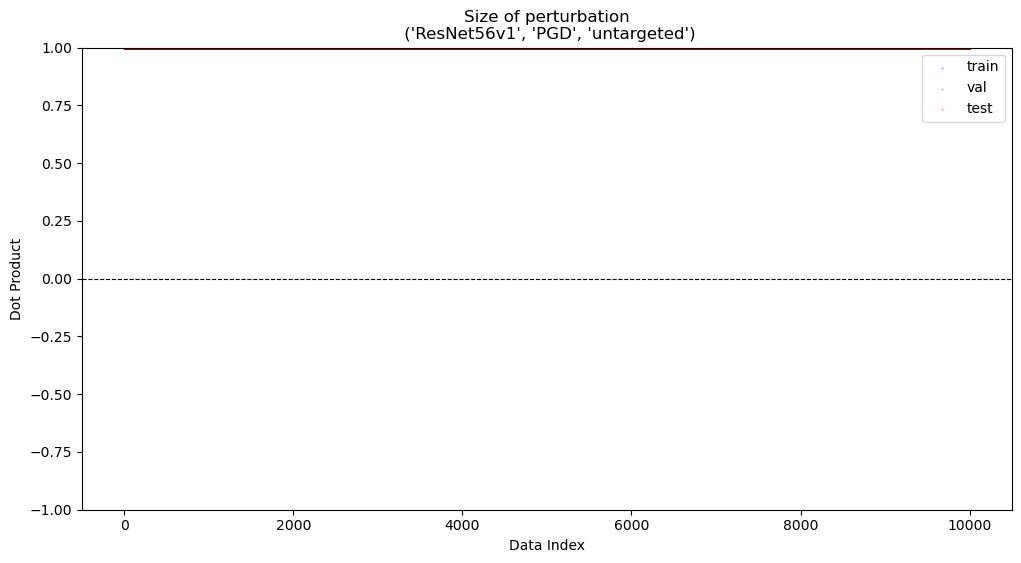

/var/folders/gt/llhq12_57w5fdzbm5g__rpj00000gn/T/ipykernel_8695/3467870831.py:10: RuntimeWarning: invalid value encountered in divide
  return np.dot(pert_x/size_of_pert_x,pert_y/size_of_pert_y)


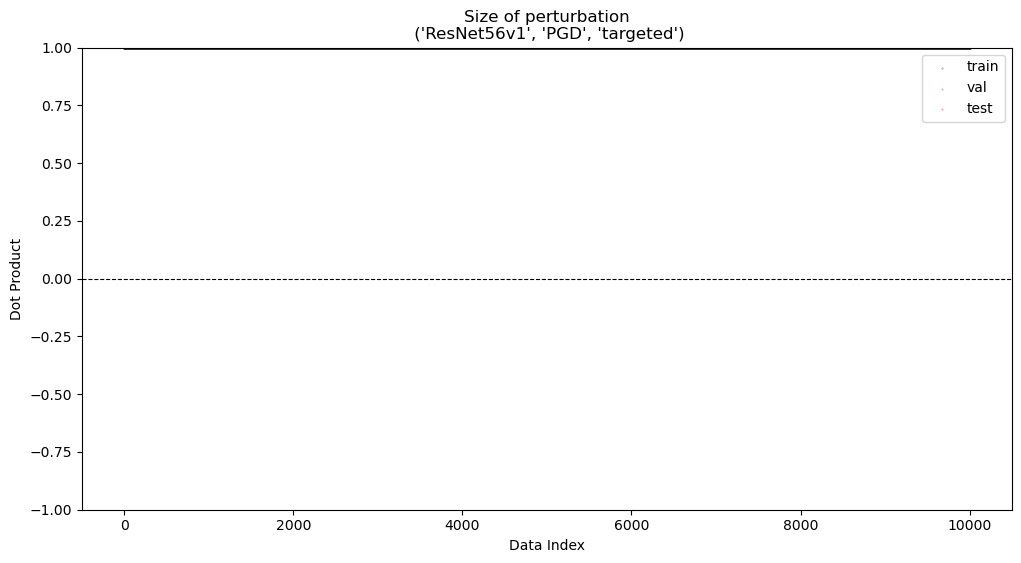

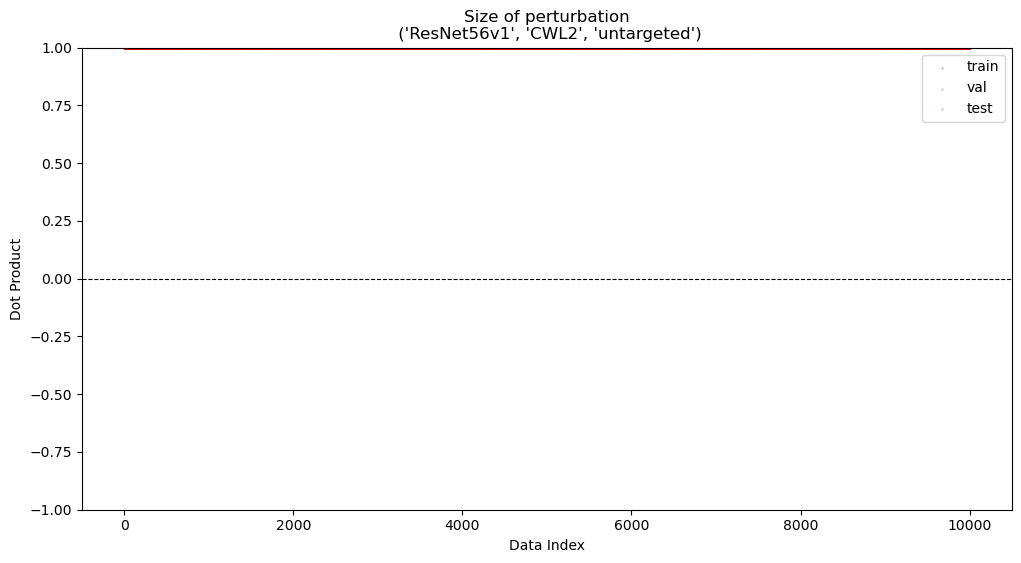

/var/folders/gt/llhq12_57w5fdzbm5g__rpj00000gn/T/ipykernel_8695/3467870831.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.dot(pert_x/size_of_pert_x,pert_y/size_of_pert_y)


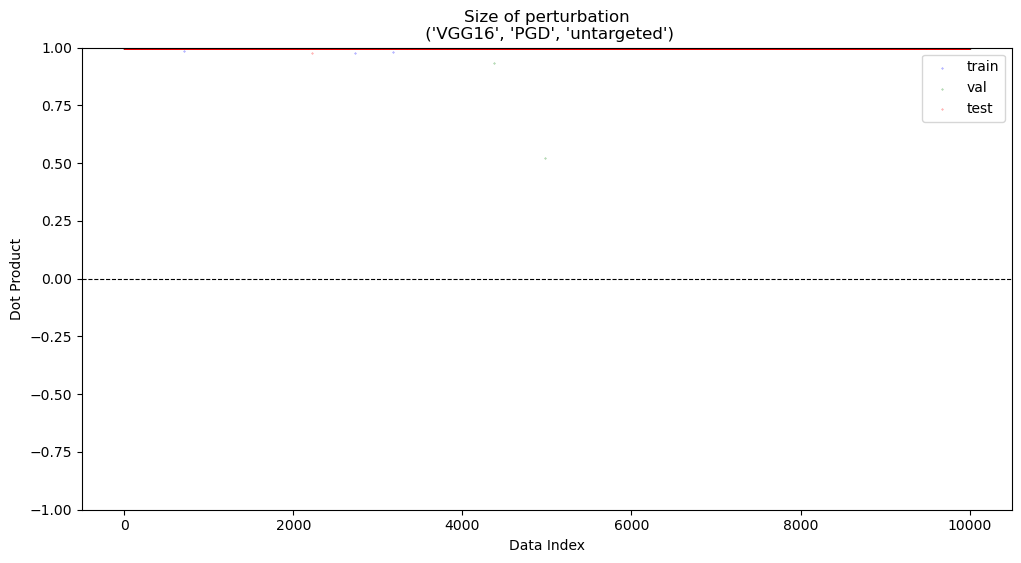

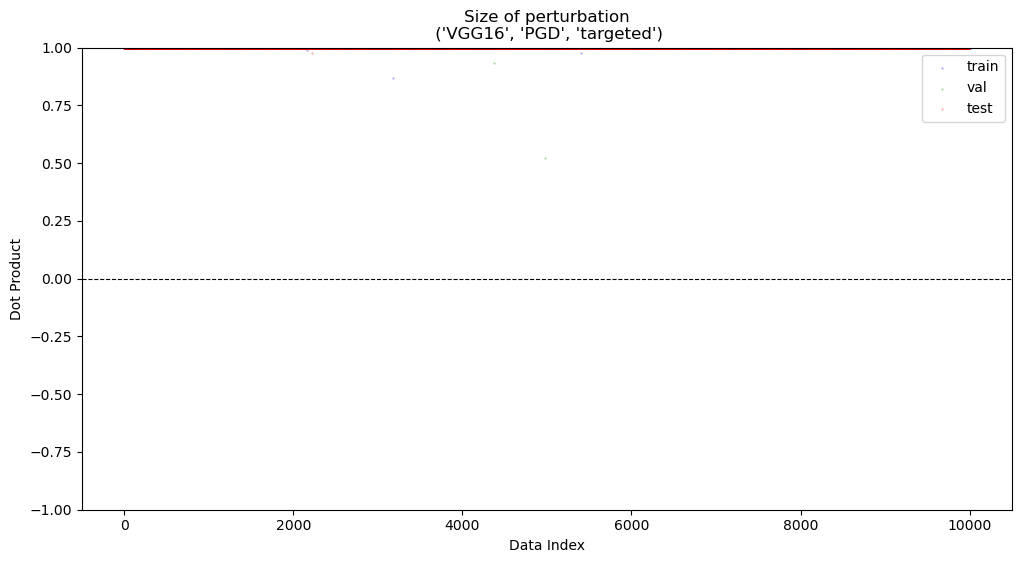

In [134]:
for model_type, adv_type, adv_direction in [('ResNet56v1', 'PGD', 'untargeted'),
                                            ('ResNet56v1', 'PGD', 'targeted'),
                                            ('ResNet56v1', 'CWL2', 'untargeted'),
                                            ('VGG16', 'PGD', 'untargeted'),
                                            ('VGG16', 'PGD', 'targeted'),]:
    dot_products = {
        "train": [],
        "val": [],
        "test": [],
        "average_train" : [],
        "average_val" : [],
        "average_test" : [],
        
    }


    for dataset in dot_products.keys():
        if dataset[:2] == 'av':
            continue
        for i in range(num_samples):
            app_pt = original_dataset_table[dataset][0][i] 
            
            dot_products[dataset].append(
                dot_product(adv_dataset_table[model_type][adv_type][adv_direction][dataset][i], 
                            adv_dataset_table[model_type][adv_type][adv_direction][dataset][i], app_pt))
    average_train = np.sum(dot_products['train'])/10000 
    average_val = np.sum(dot_products['val'])/10000 
    average_test = np.sum(dot_products['test'])/10000 
    dot_products['average_train'] = [average_train for _ in range(num_samples)]
    dot_products['average_val'] = [average_val for _ in range(num_samples)]
    dot_products['average_test'] = [average_test for _ in range(num_samples)]

    # Plot the results
    plt.figure(figsize=(12, 6))
    for label, values in dot_products.items():
        if label[-2:] == 'in':
            color = 'blue'
        elif label[-2:] == 'al':
            color = 'green'
        else:
            color = 'red'
        if label[:2] == 'av':
            plt.scatter(indices, values, alpha=0.2, s=0.01, color = color)
        else:
            plt.scatter(indices, values, label=label, alpha=0.6, s=0.1,color = color)

    plt.xlabel("Data Index")
    plt.ylabel("Dot Product")
    plt.title(f"Size of perturbation\n {model_type, adv_type, adv_direction}")
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0
    plt.legend()
    plt.ylim(-1, 1)  # Restrict y-axis to [-1,1]
    plt.grid(False)

    # Show the plot
    plt.show()



## VGG vs ResNet

different model (Resnet and VGG)
different model of the same structure (Resnet20, Resnet56)
same model with different hyperparameter (Resnet56, epsilon = 0.3 or 0.1)

same strucutre, two models. Resnet 56v1 Resnet 56v1


/var/folders/gt/llhq12_57w5fdzbm5g__rpj00000gn/T/ipykernel_8695/3467870831.py:10: RuntimeWarning: invalid value encountered in divide
  return np.dot(pert_x/size_of_pert_x,pert_y/size_of_pert_y)
/var/folders/gt/llhq12_57w5fdzbm5g__rpj00000gn/T/ipykernel_8695/3467870831.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.dot(pert_x/size_of_pert_x,pert_y/size_of_pert_y)


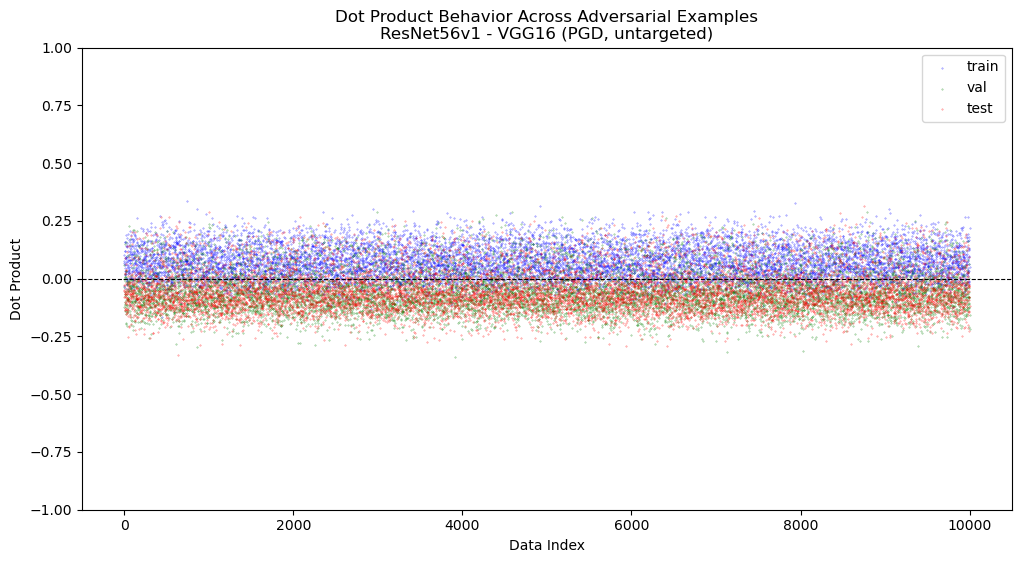

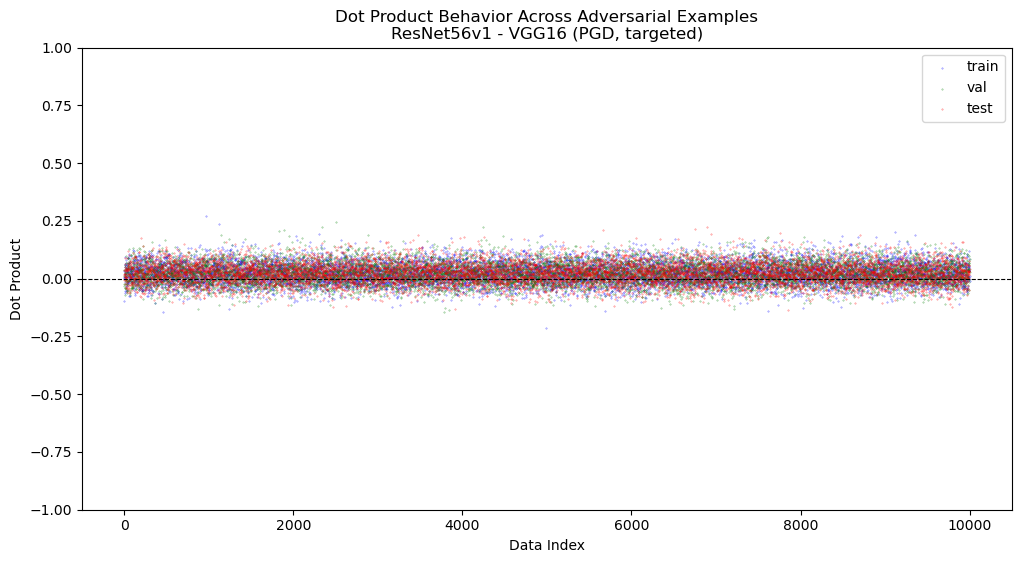

In [138]:
dot_products = {
    "train": [],
    "val": [],
    "test": [],
    "average_train" : [],
    "average_val" : [],
    "average_test" : [],
    
}
for dataset in dot_products.keys():
    if dataset[:2] == 'av':
        continue
    for i in range(num_samples):
        app_pt = original_dataset_table[dataset][0][i] 
        
        dot_products[dataset].append(
            dot_product(adv_dataset_table['ResNet56v1']['PGD']['untargeted'][dataset][i], 
                        adv_dataset_table['VGG16']['PGD']['untargeted'][dataset][i], app_pt))
average_train = np.sum(dot_products['train'])/10000 
average_val = np.sum(dot_products['val'])/10000 
average_test = np.sum(dot_products['test'])/10000 
dot_products['average_train'] = [average_train for _ in range(num_samples)]
dot_products['average_val'] = [average_val for _ in range(num_samples)]
dot_products['average_test'] = [average_test for _ in range(num_samples)]

# Plot the results
plt.figure(figsize=(12, 6))
for label, values in dot_products.items():
    if label[-2:] == 'in':
        color = 'blue'
    elif label[-2:] == 'al':
        color = 'green'
    else:
        color = 'red'
    if label[:2] == 'av':
        plt.scatter(indices, values, alpha=1, s=0.01, color = color)
    else:
        plt.scatter(indices, values, label=label, alpha=0.6, s=0.1,color = color)

plt.xlabel("Data Index")
plt.ylabel("Dot Product")
plt.title("Dot Product Behavior Across Adversarial Examples\nResNet56v1 - VGG16 (PGD, untargeted)")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0
plt.legend()
plt.ylim(-1, 1)  # Restrict y-axis to [-1,1]
plt.grid(False)

# Show the plot
plt.show()


dot_products = {
    "train": [],
    "val": [],
    "test": [],
    "average_train" : [],
    "average_val" : [],
    "average_test" : [],
    
}
for dataset in dot_products.keys():
    if dataset[:2] == 'av':
        continue
    for i in range(num_samples):
        app_pt = original_dataset_table[dataset][0][i] 
        
        dot_products[dataset].append(
            dot_product(adv_dataset_table['ResNet56v1']['PGD']['targeted'][dataset][i], 
                        adv_dataset_table['VGG16']['PGD']['targeted'][dataset][i], app_pt))
average_train = np.sum(dot_products['train'])/10000 
average_val = np.sum(dot_products['val'])/10000 
average_test = np.sum(dot_products['test'])/10000 
dot_products['average_train'] = [average_train for _ in range(num_samples)]
dot_products['average_val'] = [average_val for _ in range(num_samples)]
dot_products['average_test'] = [average_test for _ in range(num_samples)]

# Plot the results
plt.figure(figsize=(12, 6))
for label, values in dot_products.items():
    if label[-2:] == 'in':
        color = 'blue'
    elif label[-2:] == 'al':
        color = 'green'
    else:
        color = 'red'
    if label[:2] == 'av':
        plt.scatter(indices, values, alpha=1, s=0.01, color = color)
    else:
        plt.scatter(indices, values, label=label, alpha=0.6, s=0.1,color = color)

plt.xlabel("Data Index")
plt.ylabel("Dot Product")
plt.title("Dot Product Behavior Across Adversarial Examples\nResNet56v1 - VGG16 (PGD, targeted)")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0
plt.legend()
plt.ylim(-1, 1)  # Restrict y-axis to [-1,1]
plt.grid(False)

# Show the plot
plt.show()

## Targeted vs Untargeted

/var/folders/gt/llhq12_57w5fdzbm5g__rpj00000gn/T/ipykernel_8695/3467870831.py:10: RuntimeWarning: invalid value encountered in divide
  return np.dot(pert_x/size_of_pert_x,pert_y/size_of_pert_y)
/var/folders/gt/llhq12_57w5fdzbm5g__rpj00000gn/T/ipykernel_8695/3467870831.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.dot(pert_x/size_of_pert_x,pert_y/size_of_pert_y)


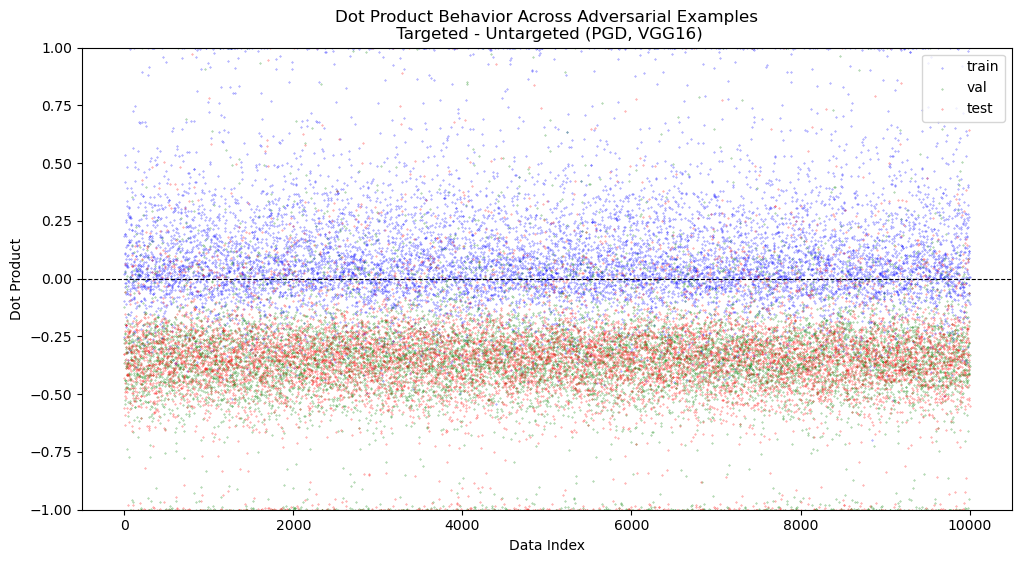

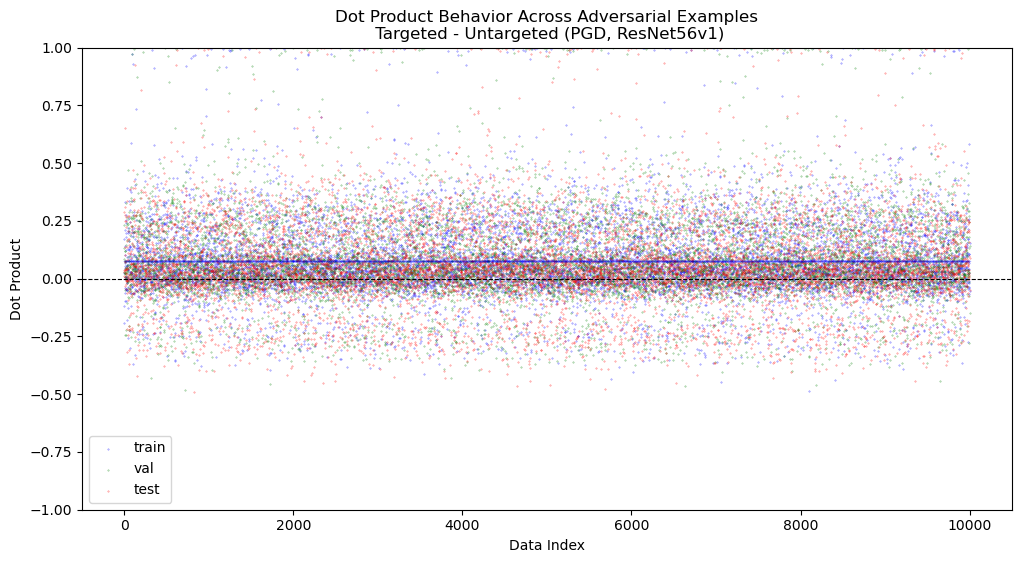

In [139]:
dot_products = {
    "train": [],
    "val": [],
    "test": [],
    "average_train" : [],
    "average_val" : [],
    "average_test" : [],
    
}
for dataset in dot_products.keys():
    if dataset[:2] == 'av':
        continue
    for i in range(num_samples):
        app_pt = original_dataset_table[dataset][0][i] 
        
        dot_products[dataset].append(
            dot_product(adv_dataset_table['VGG16']['PGD']['targeted'][dataset][i], 
                        adv_dataset_table['VGG16']['PGD']['untargeted'][dataset][i], app_pt))
average_train = np.sum(dot_products['train'])/10000 
average_val = np.sum(dot_products['val'])/10000 
average_test = np.sum(dot_products['test'])/10000 
dot_products['average_train'] = [average_train for _ in range(num_samples)]
dot_products['average_val'] = [average_val for _ in range(num_samples)]
dot_products['average_test'] = [average_test for _ in range(num_samples)]

# Plot the results
plt.figure(figsize=(12, 6))
for label, values in dot_products.items():
    if label[-2:] == 'in':
        color = 'blue'
    elif label[-2:] == 'al':
        color = 'green'
    else:
        color = 'red'
    if label[:2] == 'av':
        plt.scatter(indices, values, alpha=0.5, s=0.01, color = color)
    else:
        plt.scatter(indices, values, label=label, alpha=0.6, s=0.1,color = color)

plt.xlabel("Data Index")
plt.ylabel("Dot Product")
plt.title("Dot Product Behavior Across Adversarial Examples\n Targeted - Untargeted (PGD, VGG16)")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0
plt.legend()
plt.ylim(-1, 1)  # Restrict y-axis to [-1,1]
plt.grid(False)

# Show the plot
plt.show()


dot_products = {
    "train": [],
    "val": [],
    "test": [],
    "average_train" : [],
    "average_val" : [],
    "average_test" : [],
    
}
for dataset in dot_products.keys():
    if dataset[:2] == 'av':
        continue
    for i in range(num_samples):
        app_pt = original_dataset_table[dataset][0][i] 
        
        dot_products[dataset].append(
            dot_product(adv_dataset_table['ResNet56v1']['PGD']['targeted'][dataset][i], 
                        adv_dataset_table['ResNet56v1']['PGD']['untargeted'][dataset][i], app_pt))
average_train = np.sum(dot_products['train'])/10000 
average_val = np.sum(dot_products['val'])/10000 
average_test = np.sum(dot_products['test'])/10000 
dot_products['average_train'] = [average_train for _ in range(num_samples)]
dot_products['average_val'] = [average_val for _ in range(num_samples)]
dot_products['average_test'] = [average_test for _ in range(num_samples)]

# Plot the results
plt.figure(figsize=(12, 6))
for label, values in dot_products.items():
    if label[-2:] == 'in':
        color = 'blue'
    elif label[-2:] == 'al':
        color = 'green'
    else:
        color = 'red'
    if label[:2] == 'av':
        plt.scatter(indices, values, alpha=0.2, s=0.01, color = color)
    else:
        plt.scatter(indices, values, label=label, alpha=0.6, s=0.1,color = color)

plt.xlabel("Data Index")
plt.ylabel("Dot Product")
plt.title("Dot Product Behavior Across Adversarial Examples\n Targeted - Untargeted (PGD, ResNet56v1)")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0
plt.legend()
plt.ylim(-1, 1)  # Restrict y-axis to [-1,1]
plt.grid(False)

# Show the plot
plt.show()



## PGD vs CWL2

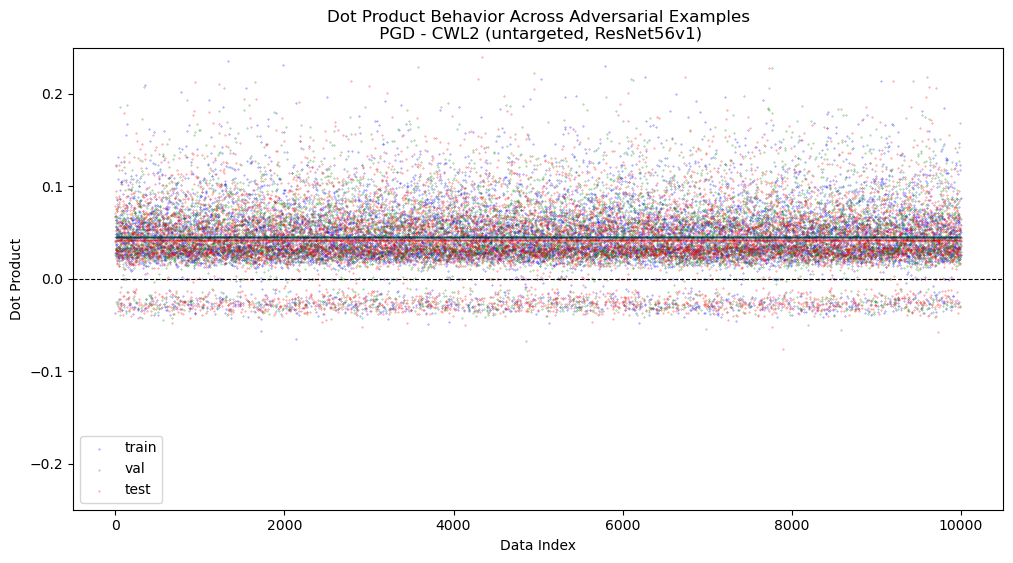

In [128]:


dot_products = {
    "train": [],
    "val": [],
    "test": [],
    "average_train" : [],
    "average_val" : [],
    "average_test" : [],
    
}
for dataset in dot_products.keys():
    if dataset[:2] == 'av':
        continue
    for i in range(num_samples):
        app_pt = original_dataset_table[dataset][0][i] 
        
        dot_products[dataset].append(
            dot_product(adv_dataset_table['ResNet56v1']['PGD']['untargeted'][dataset][i], 
                        adv_dataset_table['ResNet56v1']['CWL2']['untargeted'][dataset][i], app_pt))
average_train = np.sum(dot_products['train'])/10000 
average_val = np.sum(dot_products['val'])/10000 
average_test = np.sum(dot_products['test'])/10000 
dot_products['average_train'] = [average_train for _ in range(num_samples)]
dot_products['average_val'] = [average_val for _ in range(num_samples)]
dot_products['average_test'] = [average_test for _ in range(num_samples)]

# Plot the results
plt.figure(figsize=(12, 6))
for label, values in dot_products.items():
    if label[-2:] == 'in':
        color = 'blue'
    elif label[-2:] == 'al':
        color = 'green'
    else:
        color = 'red'
    if label[:2] == 'av':
        plt.scatter(indices, values, alpha=0.2, s=0.01, color = color)
    else:
        plt.scatter(indices, values, label=label, alpha=0.6, s=0.1,color = color)

plt.xlabel("Data Index")
plt.ylabel("Dot Product")
plt.title("Dot Product Behavior Across Adversarial Examples\n PGD - CWL2 (untargeted, ResNet56v1)")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0
plt.legend()
plt.ylim(-0.25, 0.25)  # Restrict y-axis to [-1,1]
plt.grid(False)

# Show the plot
plt.show()
